## **Resolução do problema das N rainhas através do Algoritmo Genético** 👑

---

#### Inteligência Artificial - 2022.2 - UFRJ

#### **Dupla:** 
- Gabriele Jandres Cavalcanti (119159948)
- Victor Cardoso (119157174)

### **Importação de bibliotecas**


---



In [ ]:
import random
import numpy
from matplotlib import pyplot

### **1. Modelagem**


---



**a)** Um tabuleiro N x N será representado no programa através de um **array de N elementos**, onde em cada posição i do array (onde cada posição i corresponde a uma coluna)
será armazenado o número correspondente à linha j em que a rainha está presente naquela coluna. Os índices irão variar de 0 ate N - 1.


Por exemplo, no tabuleiro 8 X 8 abaixo, temos a representação em forma de array como **[2, 1, 6, 4, 1, 3, 0, 0]**.

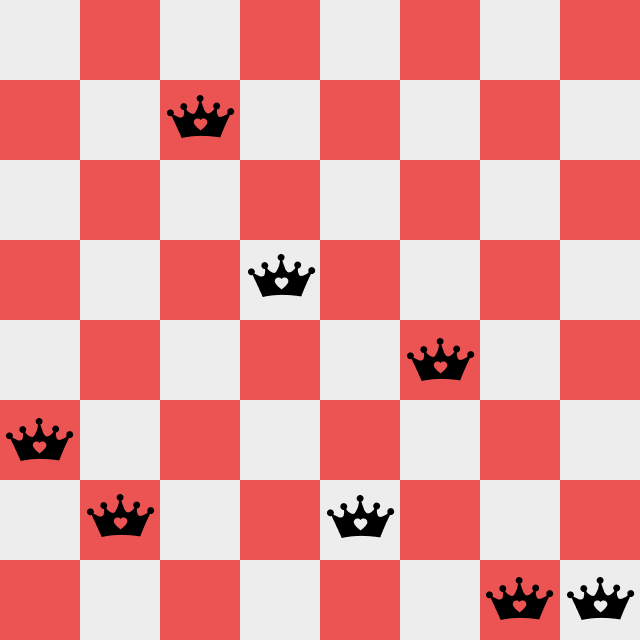

Outro exemplo seria o array [1, 3, 0, 2] que representa o tabuleiro 4 X 4 onde a primeira rainha (coluna 0) está na segunda linha, a segunda rainha (coluna 1) está na quarta linha, a terceira rainha (coluna 2) está na primeira linha e a quarta rainha (coluna 3) está na terceira linha.

### **2. Implementação Base**


---



##### **a)** Função tabuleiro:

In [ ]:
'''
  Objetivo: Gerar um ou mais tabuleiros
  @param tamTabuleiro, o tamanho N de um tabuleiro
  @param qntTabuleiros, a quantidade de tabuleiros a serem gerados
  @return tabuleiros, todos os tabuleiros gerados
'''
def tabuleiro(tamTabuleiro, qntTabuleiros):
    tabuleiros = []
    for _ in range(qntTabuleiros):
        tab = []

        # Cria um tabuleiro
        for _ in range(tamTabuleiro):
            tab.append(random.randint(0, tamTabuleiro - 1))
            
        # Adiciona o novo tabuleiro a lista geral de tabuleiros
        tabuleiros.append(tab)

    return tabuleiros

##### **b)** Função para todos os vizinhos:

In [ ]:
'''
  Objetivo: Retornar todos os tabuleiros vizinhos a T
  @param tabuleiro, array com as posições das rainhas
  @return vizinhos, todos os tabuleiros vizinhos a T
'''
def todosVizinhos(tabuleiro):
    vizinhos = []
    
    for indice in range(len(tabuleiro)):
        novoTabuleiro = tabuleiro   # todos os vizinhos devem ser obtidos a partir da configuracao atual
        rainha = novoTabuleiro[indice] # obtem a linha da rainha no indice indice

        # Obtem todas as opcoes de novas linhas para a rainha e substitui a posicao atual pelas novas para gerar todos os vizinhos possiveis
        for novaRainha in range(0, len(tabuleiro)):
            if rainha != novaRainha: # descarta a configuracao atual do tabuleiro
                novoTabuleiro[indice] = novaRainha
                vizinhos.append(novoTabuleiro)
            
    return vizinhos

##### **c)** Função para um vizinho:

In [ ]:
'''
  Objetivo: Retorna um dos vizinhos de T
  @param tabuleiro, array com as posições das rainhas
  @return vizinhos[vizinhoAleatorio], um tabuleiro aleatorio vizinho a T
'''
def umVizinho(tabuleiro):
    vizinhos = todosVizinhos(tabuleiro)
    vizinhoAleatorio = random.randint(0, len(vizinhos) - 1)

    return vizinhos[vizinhoAleatorio]

##### **d)** Função para o número de Ataques:

In [ ]:
'''
  Objetivo: Calcular o número de ataques entre as rainhas dispostas em T
  @param tabuleiro, array com as posições das rainhas
  @return ataques, a quantidade de ataques entre rainhas
'''
def numeroAtaques(tabuleiro):
    ataques = 0
    dimensao = len(tabuleiro)
    
    for i in range(dimensao):
        for j in range(i + 1, dimensao):
            # Se as rainhas estao na mesma linha, elas se atacam
            if tabuleiro[i] == tabuleiro[j]:       
                ataques += 1
            # Se as rainhas estao na mesma diagonal, elas se atacam
            elif abs(tabuleiro[i] - tabuleiro[j]) == abs(i - j):
                ataques += 1
                
    return ataques

### **5. Algoritmo Genético**


---



Nessa seção se dará a implementação do **algoritmo genético básico** apresentado em aula, usando a modelagem definida na **seção 1** e as funções tabuleiro e numeroAtaques construídas na **seção 2**.


##### **b)** Função para a geração da população:

In [ ]:
'''
  Objetivo: Gerar a população de tabuleiros
  @param qtdIndividuos, o tamanho da população
  @return uma população de tabuleiros
'''
def geraPopulacao(qtdIndividuos): # dimensao sera o numero de rainhas (4, 8, 16, 32...)
    return tabuleiro(tamanhoIndividuo, qtdIndividuos)

##### **c)** Operadores:

- Função para calcular a função de adaptação:

In [ ]:
'''
  Objetivo: Calcular o valor da função adaptação de um indivíduo
  @param individuo, array com as posições das rainhas
  @return fitness, o valor da função adaptação de um indivíduo
'''
def calculaFitness(individuo):
    return 1 / (numeroAtaques(individuo) + 1) # o valor maximo da funcao vai ser 1 que eh quando o valor dos ataques for 0

- Função auxiliar para a seleção da população:

In [ ]:
'''
  Objetivo: Calcular a propabilidade de cada indivíduo ser selecionado
  @param populacao, array com os indivíduos da população
  @return proporcaoPorIndividuo, array com a propabilidade de cada indivíduo ser selecionado
'''
def roletaViciada(populacao):
    proporcaoPorIndividuo = []
    totalAdaptacao = 0

    # calcula a soma total dos valores da funcao objetivo
    for individuo in populacao:
        totalAdaptacao += calculaFitness(individuo)

    # calcula a proporcao por individuo
    for individuo in populacao:
        proporcaoPorIndividuo.append(calculaFitness(individuo) / totalAdaptacao)

    return proporcaoPorIndividuo 

- Função para a a seleção da população:

In [ ]:
'''
  Objetivo: Selecionar um indivíduo da população
  @param populacao, array com os indivíduos da população
  @return populacaoIntermediaria, array com os indivíduos selecionados
'''
def selecao(populacao):
    proporcaoPorIndividuo = roletaViciada(populacao)
    tamanhoPopulacao = len(populacao)
    populacaoIntermediaria = []
    indices = [i for i in range(tamanhoPopulacao)]

    for _ in range(tamanhoPopulacao):
        individuoSorteado = numpy.random.choice(indices, p = proporcaoPorIndividuo)  
        populacaoIntermediaria.append(populacao[individuoSorteado])

    return populacaoIntermediaria

- Função para a realizar o crossover:

In [ ]:
'''
   Objetivo: Realizar o cruzamento entre dois indivíduos
   @param individuo1, array com as posições das rainhas
   @param individuo2, array com as posições das rainhas
   @return filho1 e filho2, os dois filhos gerados a partir do crossover
'''
def crossover(individuo1, individuo2):
    pontoCorte = random.randint(0, len(individuo1) - 1)
    filho1 = individuo1[0:pontoCorte] + individuo2[pontoCorte:]
    filho2 = individuo2[0:pontoCorte] + individuo1[pontoCorte:]

    return filho1, filho2

- Função para a realizar a mutação:


In [ ]:
'''
   Objetivo: Realizar a mutação em um indivíduo
   @param individuo, array com as posições das rainhas
   @return individuo, o individuo mutado
'''
def mutacao(individuo):
  posicao = random.randint(0, len(individuo) - 1)
  individuo = individuo[:posicao] + [random.randint(0, len(individuo) - 1)] + individuo[posicao + 1:]
  return individuo

##### **d)** Algoritmo Genético Básico:

- Função auxiliar para obter o melhor indivíduo de uma população. O melhor indivíduo é aquele cuja avaliação da função de adaptação é maior:

In [ ]:
'''
    Objetivo: Obter o melhor indivíduo da população
    @param populacao, array com os indivíduos da população
    @return populacao[0], o melhor indivíduo da população
'''
def obtemMelhorIndividuo(populacao):
    populacao.sort(key = calculaFitness, reverse = True) # ordena a populacao de acordo com a funcao objetivo
    return populacao[0]

- Função principal para executar o algortimo genético básico:

**Observação:** Para que essa função seja executada é necessário que a variável *tamanhoIndividuo* já tenha sido inicializada.

In [ ]:
'''
    Objetivo: através do algoritmo genético, encontrar a solução do problema das N rainhas
    @param tamanhoPopulacao, o tamanho da população
    @param numeroGeracoes, o número de gerações
    @param probCrossover, a probabilidade de crossover entre dois indivíduos
    @param probMutacao, a probabilidade de mutação em um indivíduo
    @param elitismo, se o elitismo será utilizado ou não
    @return melhoresIndividuos, mediasFitness, array com melhores indivíduos e com as medias da função de adaptação
'''
def AG(tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo):
    populacaoInicial = geraPopulacao(tamanhoPopulacao) # gera populacao inicial
    populacaoIntermediaria = [] # array para mating pool
    geracao = 0 # contador do numero de geracoes
    melhoresIndividuos = [] # array para armazenar os melhores individuos de cada geracao
    mediasFitness = [] # array para armazenar as medias dos valores da funcao de adaptacao

    while geracao < numeroGeracoes:
        melhorIndividuo = obtemMelhorIndividuo(populacaoInicial) # obtem o melhor individuo da populacao
        melhoresIndividuos.append(melhorIndividuo) # adiciona o melhor individuo da geracao atual ao array de melhores individuos  

        populacaoIntermediaria = selecao(populacaoInicial) # seleciona os individuos para mating pool

        media = 0
        for individuo in populacaoIntermediaria:
          media += calculaFitness(individuo) 
        mediasFitness.append((media/len(populacaoIntermediaria)))  

        paresIndividuos = zip(populacaoIntermediaria[0::2], populacaoIntermediaria[1::2]) # agrupa os individuos da populacao intermediaria em pares

        # gera a populacao inicial da próxima geracao
        populacaoInicial = populacaoIntermediaria[:]
        # realiza o crossover
        for individuo1, individuo2 in paresIndividuos:
            if random.random() < probCrossover: # verifica se vai realizar o crossover
                filho1, filho2 = crossover(individuo1, individuo2)
                populacaoInicial[populacaoIntermediaria.index(individuo1)] = filho1
                populacaoInicial[populacaoIntermediaria.index(individuo2)] = filho2

        # realiza a mutacao
        for individuo in populacaoIntermediaria:
            if random.random() < probMutacao: # para cada individuo, verifica se vai realizar a mutacao
                populacaoInicial[populacaoIntermediaria.index(individuo)] = mutacao(individuo)
                
        # caso utilizarmos elitismo, o melhor individuo eh passado para a proxima geracao
        if elitismo:
            populacaoInicial.pop() # remove o ultimo individuo da populacao intermediaria
            populacaoInicial.append(melhoresIndividuos[geracao]) # adiciona o melhor individuo da geracao anterior na populacao intermediaria
            
        geracao += 1 # atualiza a geracao

    return melhoresIndividuos, mediasFitness


In [ ]:
'''
   Objetivo: Função auxiliar para imprimir um gráfico
   @param x, array com os valores do eixo x do gráfico
   @param y, array com os valores do eixo y do gráfico
   @param cor, cor da linha do gráfico
   @param xlabel, rótulo do eixo x
   @param ylabel, rótulo do eixo y
   @return void
'''
def imprime_grafico(x, y, cor, xlabel, ylabel):
  pyplot.plot(x, y, color=cor) 
  pyplot.rcParams["figure.figsize"] = (15, 5)
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

In [ ]:
'''
    Objetivo: Imprimir os gráficos "geração x fitness do melhor indivíduo" e "geração x média do fitness", além de imprimir a ultima geração, o melhor indíviduo e sua
    respectiva função de fitness
    @param melhoresIndividuos, array com os melhores indivíduos de cada geração
    @param mediasFitness, array com as médias do fitness de cada geração
    @return void
'''
def imprime_informacoes(melhoresIndividuos, mediasFitness):
  geracaoArray = [i for i in range(0, len(melhoresIndividuos))] # array para armazenar o numero da geracao
  fitnessArray = [calculaFitness(individuo) for individuo in melhoresIndividuos] # array para armazenar o fitness de cada individuo

  pyplot.subplot(1, 2, 1) 
  imprime_grafico(geracaoArray, fitnessArray, '#EC5454', 'Geração', 'Fitness do melhor indivíduo')
  pyplot.subplot(1, 2, 2) 
  imprime_grafico(geracaoArray, mediasFitness, '#00A663', 'Geração', 'Média de fitness dos indivíduos')
  pyplot.show()

  print('Melhor indivíduo da geração {}: '.format(len(geracaoArray)), melhoresIndividuos[len(geracaoArray) - 1])
  print('Fitness desse indivíduo:  ', fitnessArray[len(geracaoArray) - 1])

In [ ]:
'''
   Objetivo: Testar diferentes valores para os parâmetros
   @param repeticoes, número de repetições
   @param tamanhoPopulacao, o tamanho da população
   @param numeroGeracoes, o número de gerações
   @param probCrossover, a probabilidade de crossover entre dois indivíduos
   @param probMutacao, a probabilidade de mutação em um indivíduo
   @param elitismo, se o elitismo será utilizado ou não
   @return void

'''
def testaParametros(repeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo):
  for _ in range(repeticoes):
    melhoresIndividuos, mediasFitness = AG(tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)
    imprime_informacoes(melhoresIndividuos, mediasFitness)

In [ ]:
# Exemplo de execução do programa
tamanhoIndividuo = 8
numeroRepeticoes = 1
tamanhoPopulacao = 50
numeroGeracoes = 300
probCrossover = 0.7
probMutacao = 0.1
elitismo = False
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

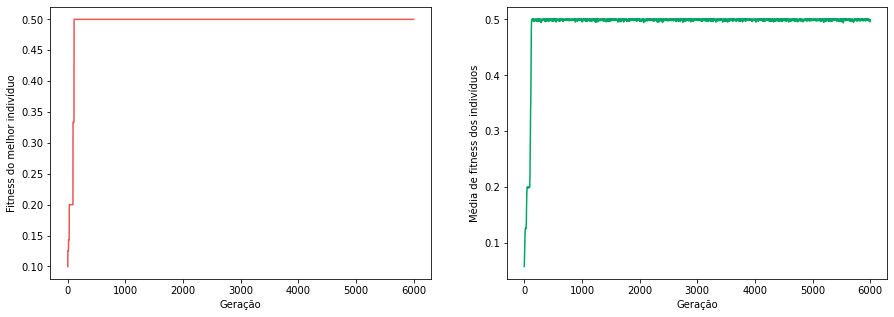

Melhor indivíduo da geração 6000:  [4, 15, 0, 5, 10, 1, 3, 14, 9, 2, 13, 11, 7, 12, 6, 3]
Fitness desse indivíduo:   0.5


In [ ]:
# Exemplo de execução do programa
tamanhoIndividuo = 16
numeroRepeticoes = 1
tamanhoPopulacao = 256
numeroGeracoes = 6000
probCrossover = 0.75
probMutacao = 0.03
elitismo = True
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

##### **e)** Problema das 4 rainhas:

- Definição de conjunto de valores inicial:

-- Com elitismo --


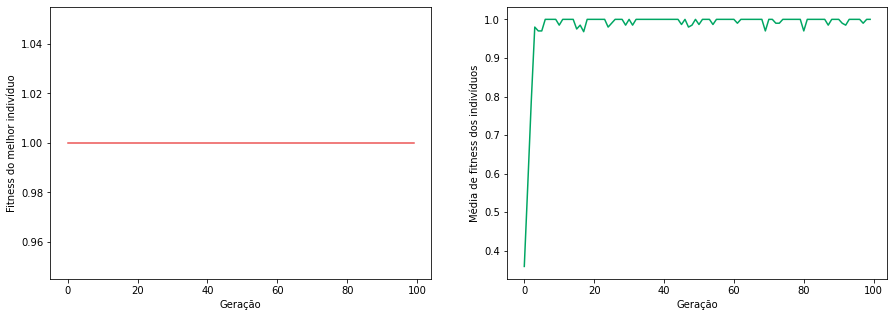

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


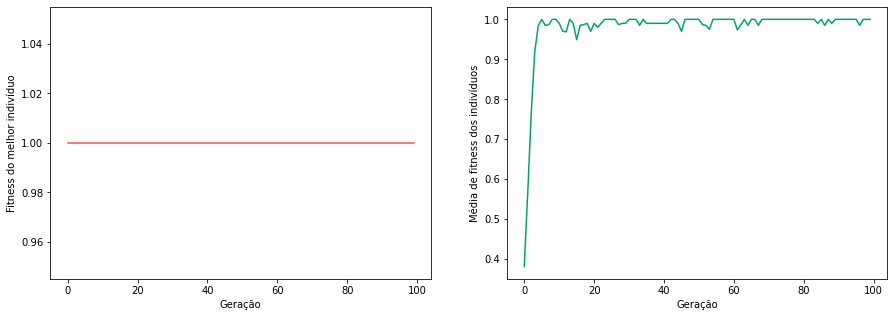

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


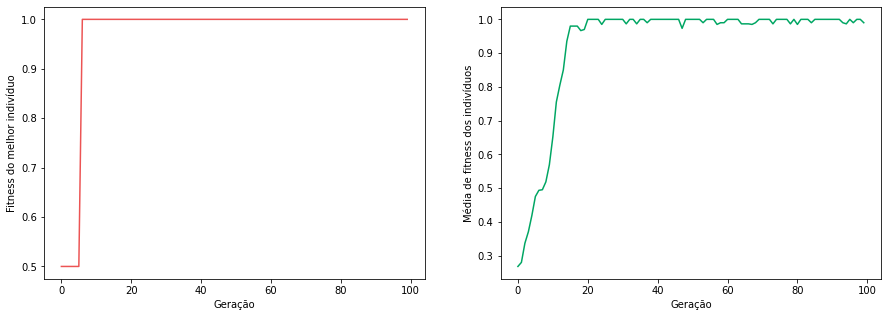

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


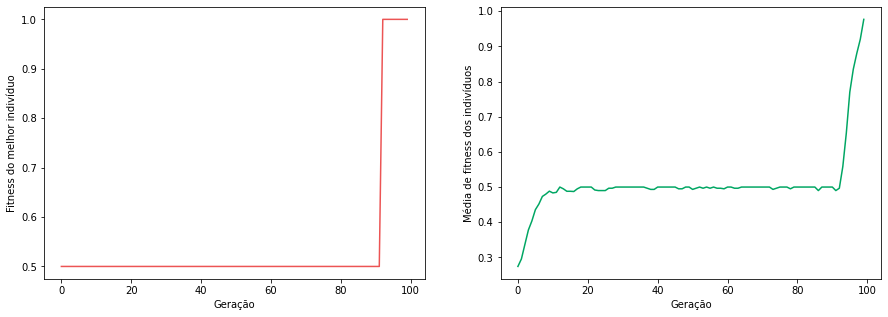

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


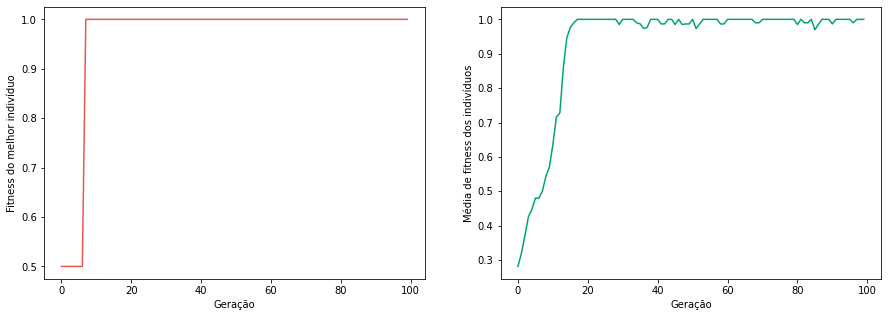

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


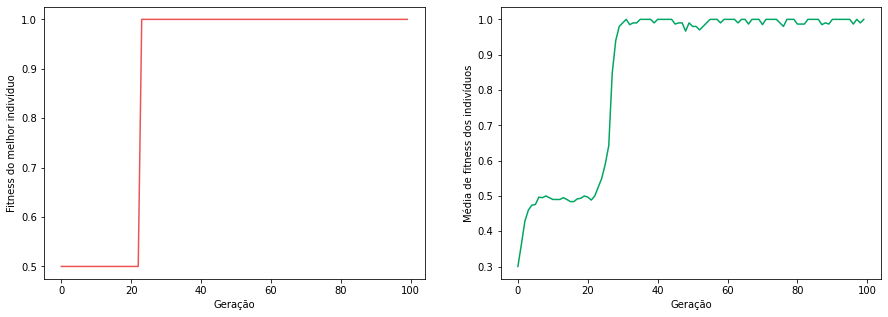

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


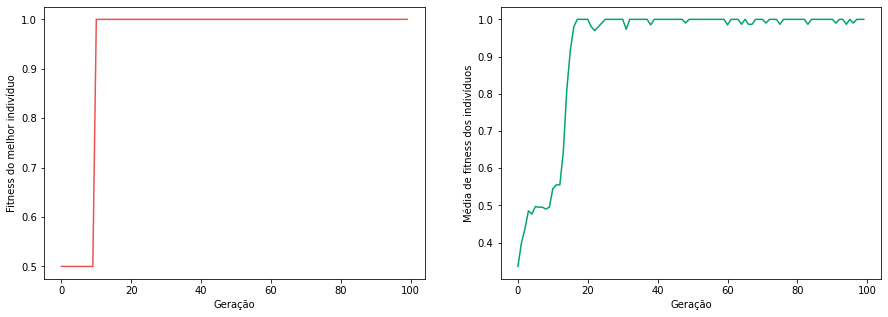

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


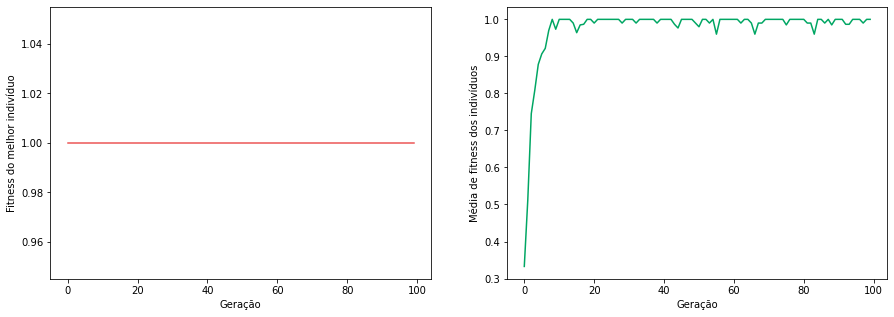

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


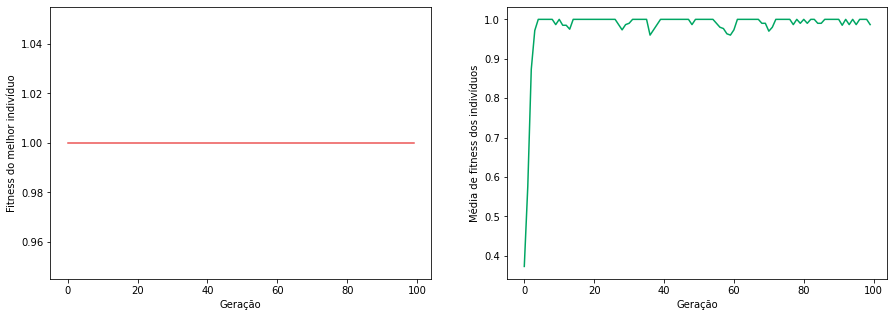

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


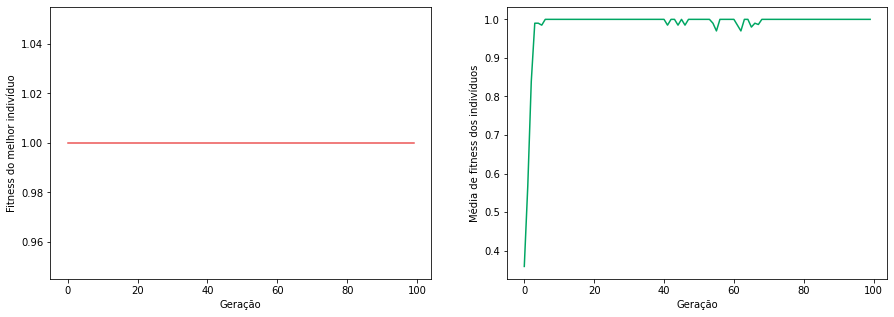

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0
-------------------------------------------------------------------------------------
-- Sem elitismo --


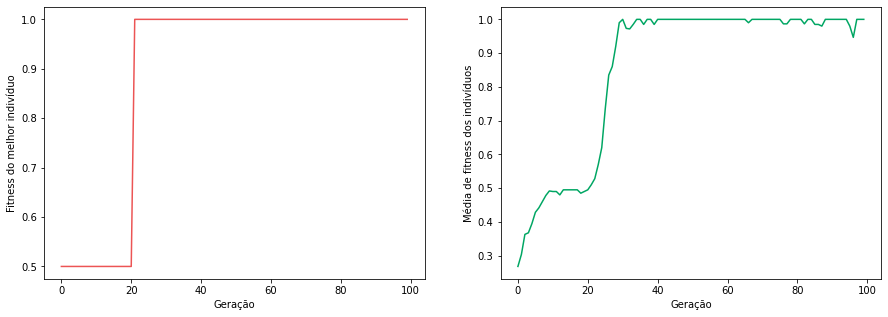

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


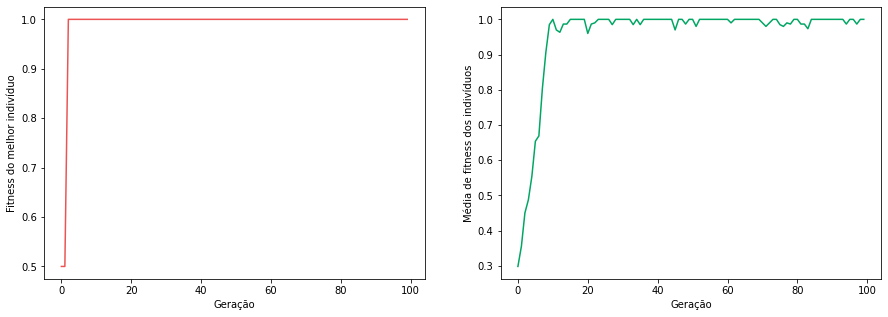

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


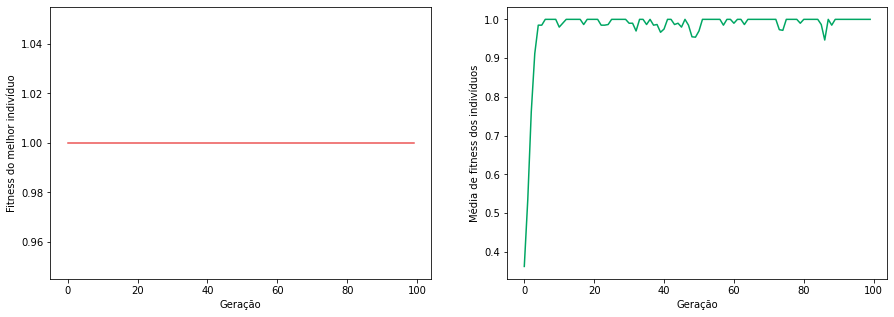

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


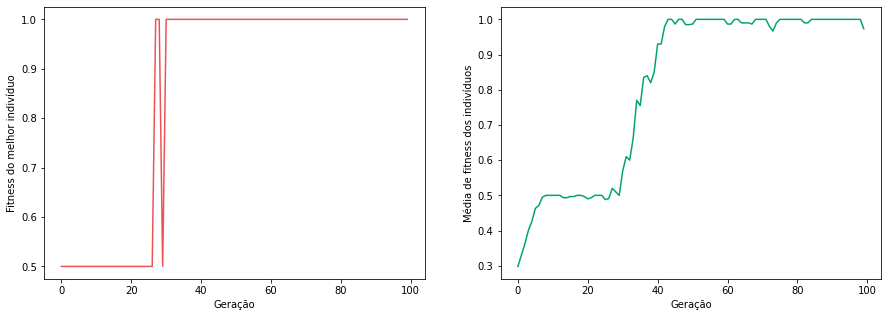

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


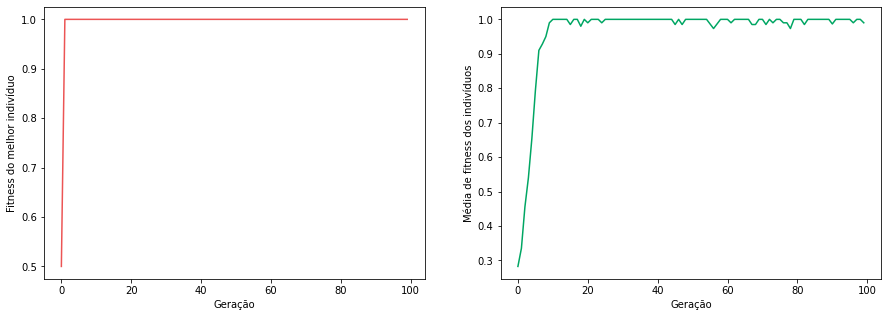

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


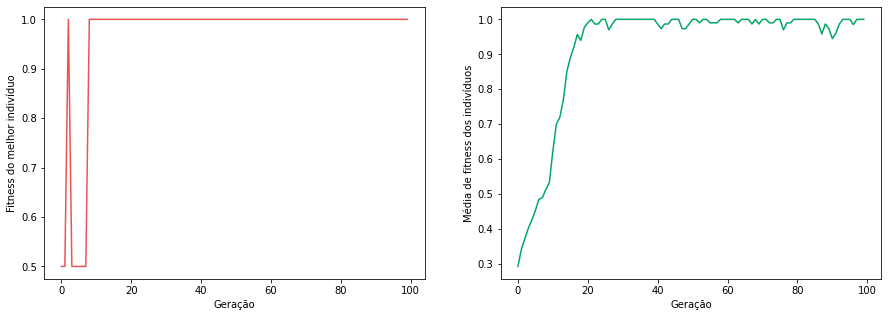

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


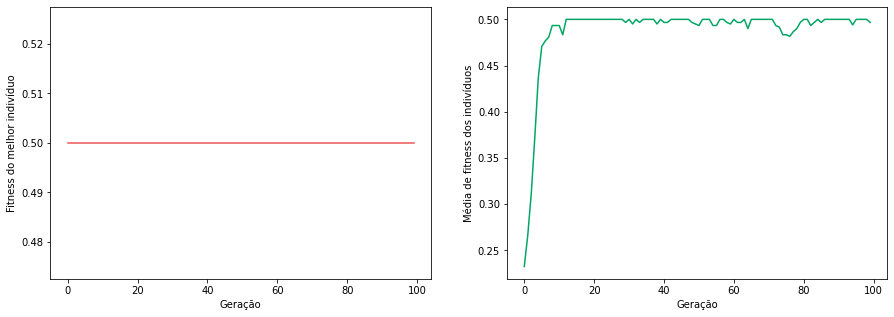

Melhor indivíduo da geração 100:  [3, 1, 0, 2]
Fitness desse indivíduo:   0.5


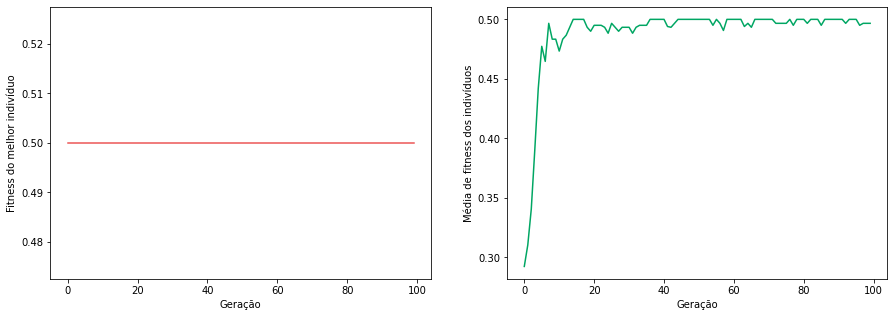

Melhor indivíduo da geração 100:  [2, 1, 3, 0]
Fitness desse indivíduo:   0.5


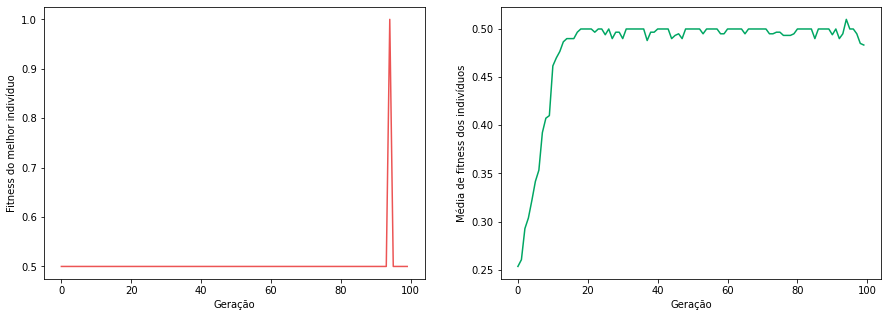

Melhor indivíduo da geração 100:  [1, 3, 2, 0]
Fitness desse indivíduo:   0.5


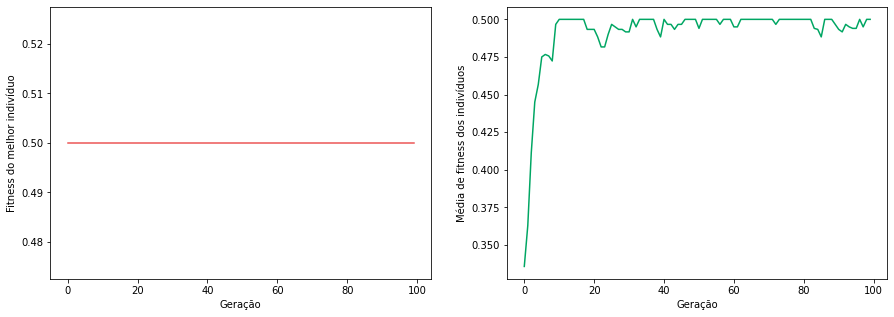

Melhor indivíduo da geração 100:  [1, 2, 0, 3]
Fitness desse indivíduo:   0.5


In [ ]:
tamanhoIndividuo = 4
numeroRepeticoes = 10
tamanhoPopulacao = 50
numeroGeracoes = 100
probCrossover = 0.7
probMutacao = 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

- Mudando o valor do tamanho da população

-- Com elitismo --


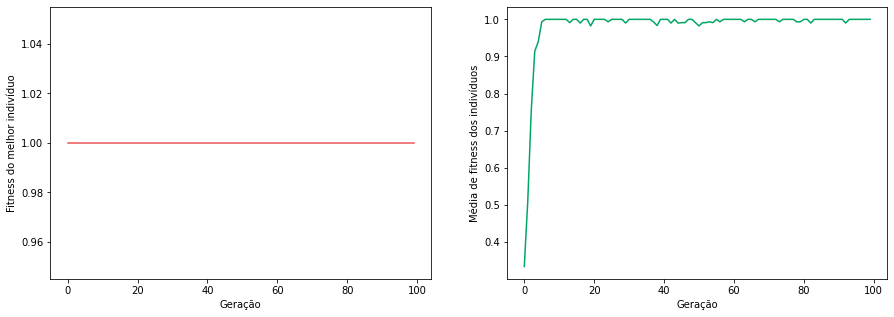

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


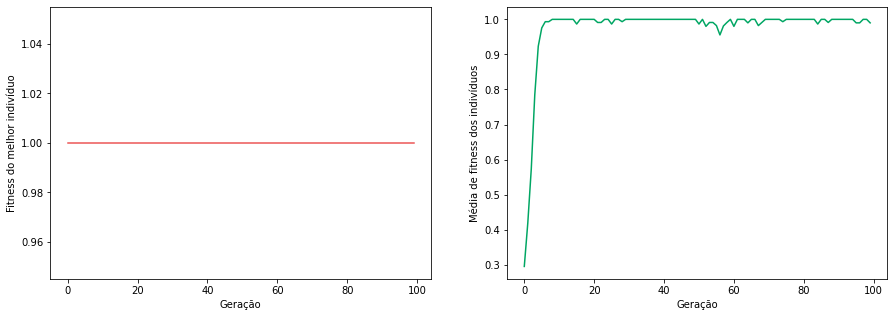

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


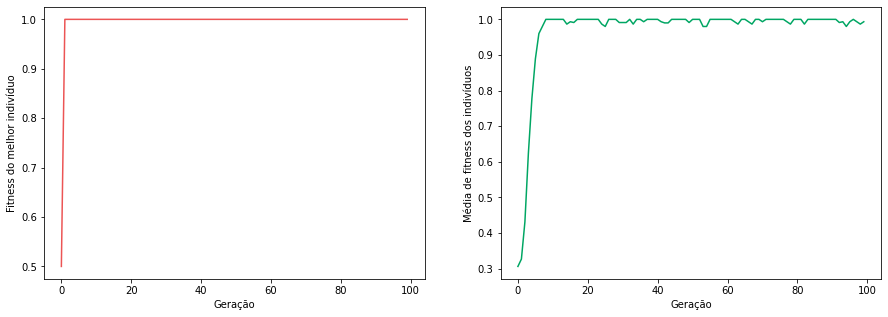

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


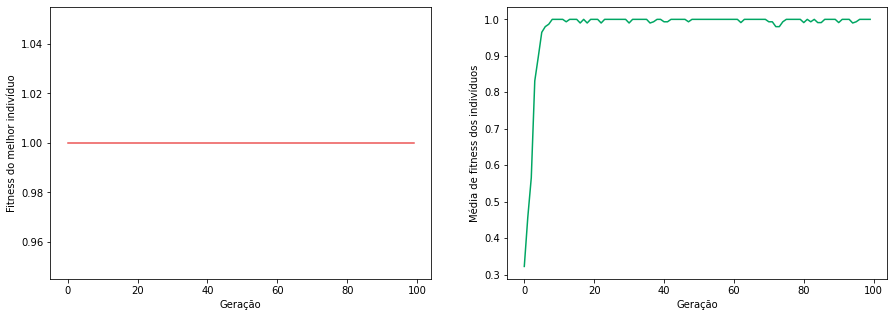

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


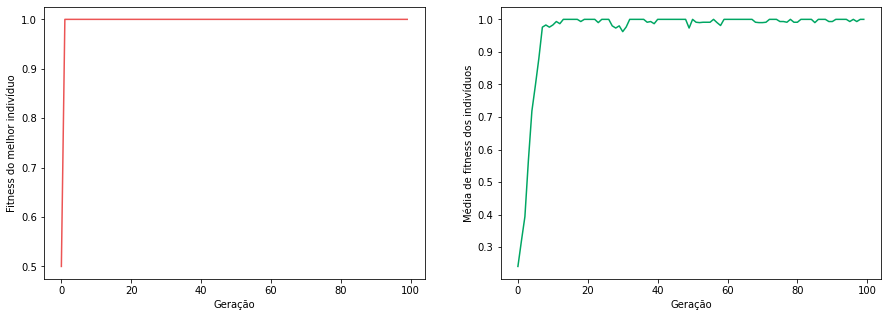

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


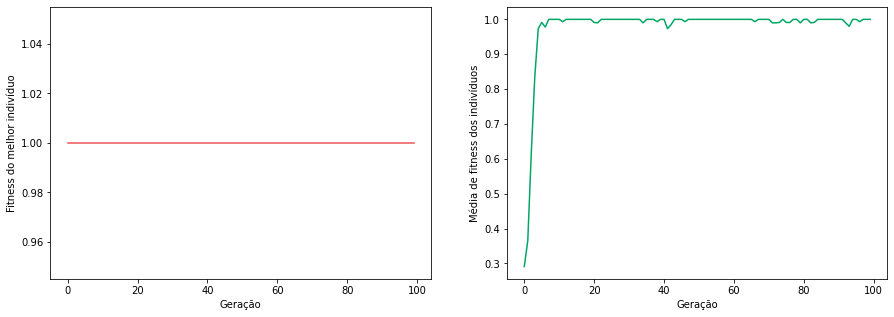

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


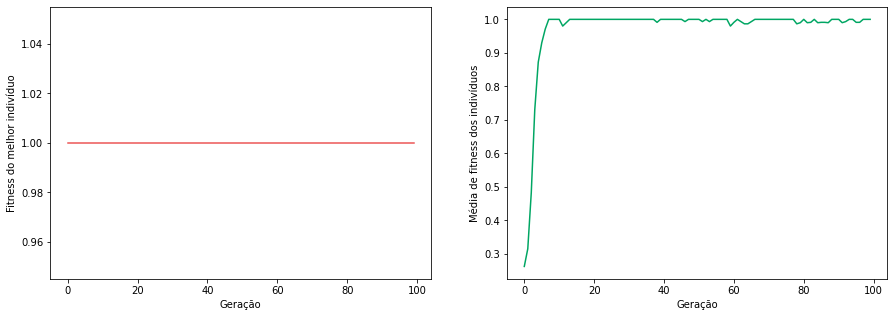

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


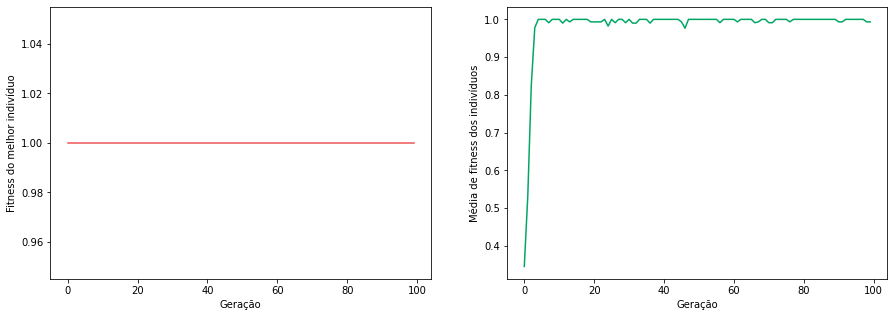

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


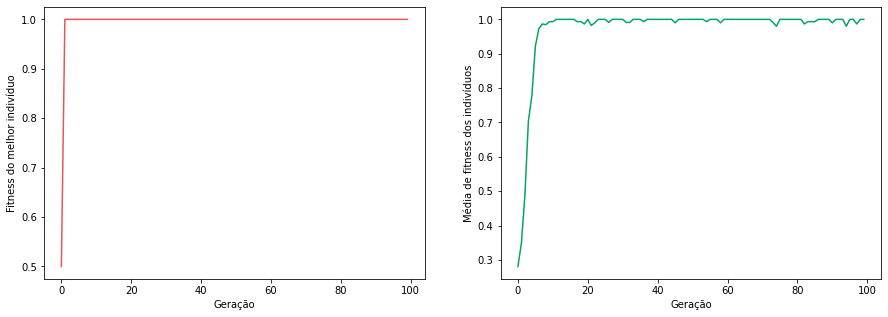

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


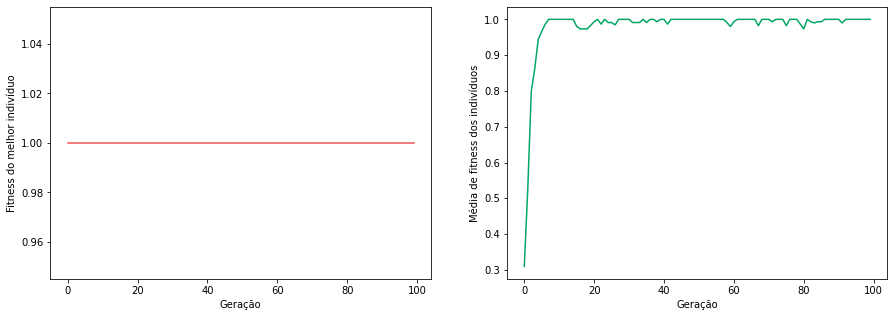

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0
-------------------------------------------------------------------------------------
-- Sem elitismo --


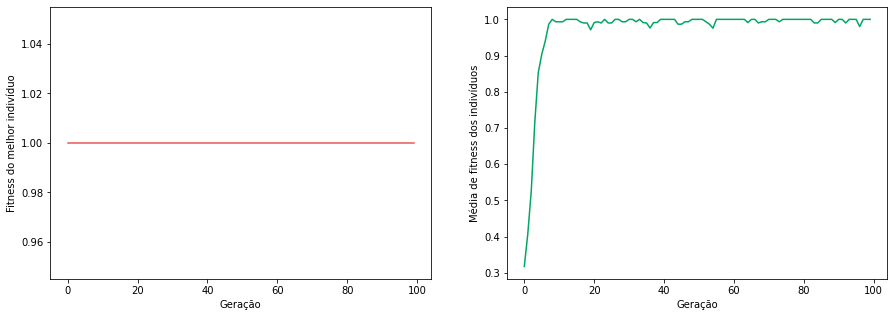

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


In [ ]:
tamanhoIndividuo = 4
numeroRepeticoes = 10
tamanhoPopulacao = 75 # antigo valor era 50
numeroGeracoes = 100
probCrossover = 0.7
probMutacao = 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

numeroRepeticoes = 1
elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

- Mudando o valor do número de gerações

-- Com elitismo --


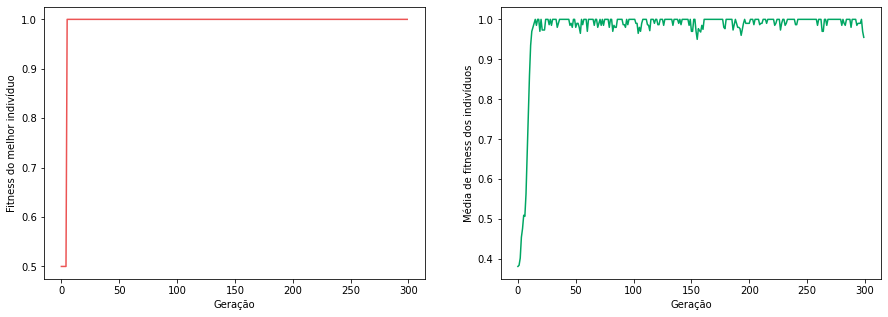

Melhor indivíduo da geração 300:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


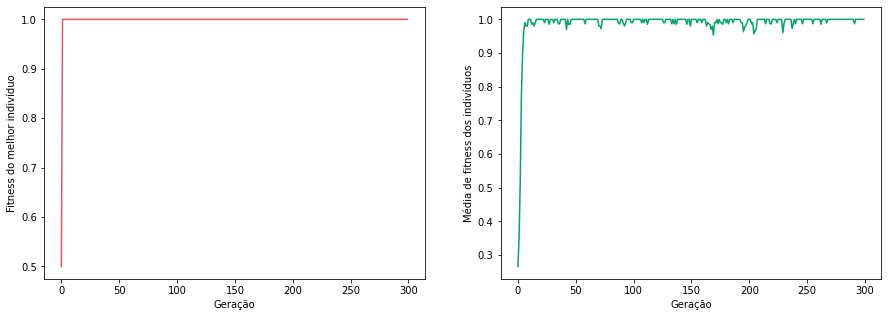

Melhor indivíduo da geração 300:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


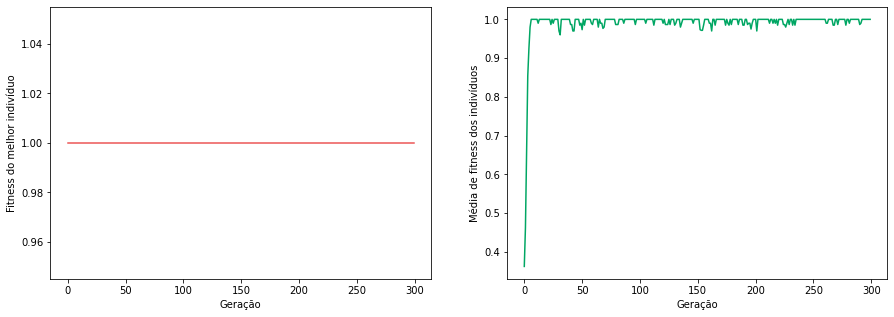

Melhor indivíduo da geração 300:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


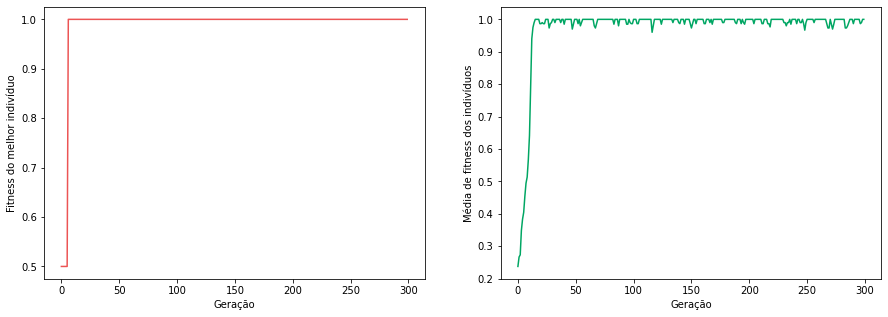

Melhor indivíduo da geração 300:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


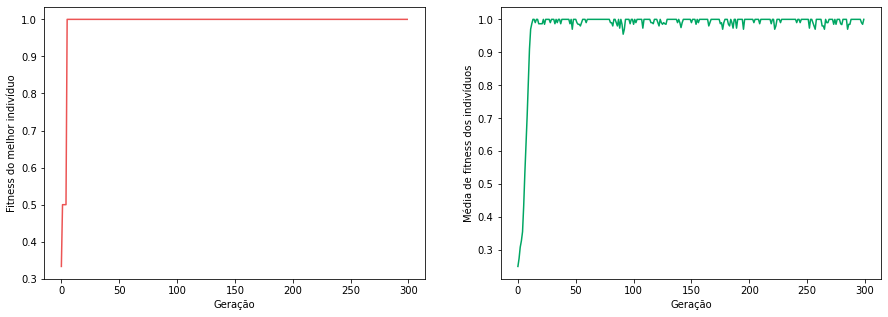

Melhor indivíduo da geração 300:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


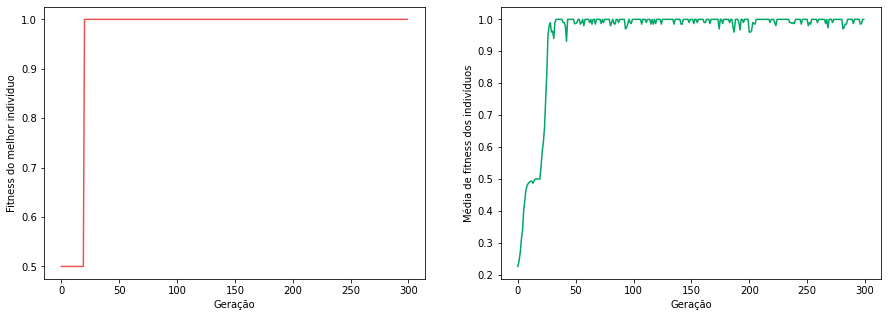

Melhor indivíduo da geração 300:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


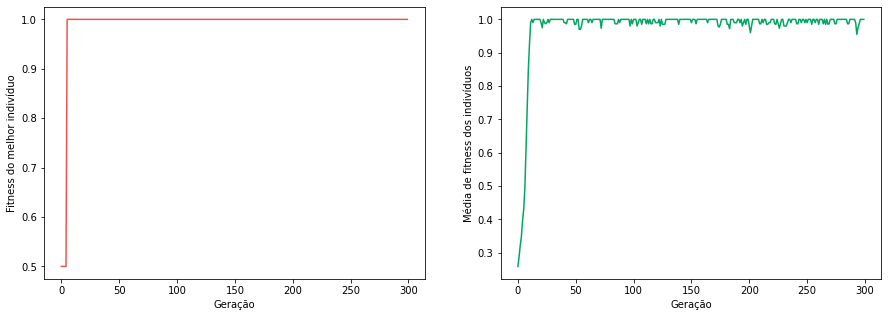

Melhor indivíduo da geração 300:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


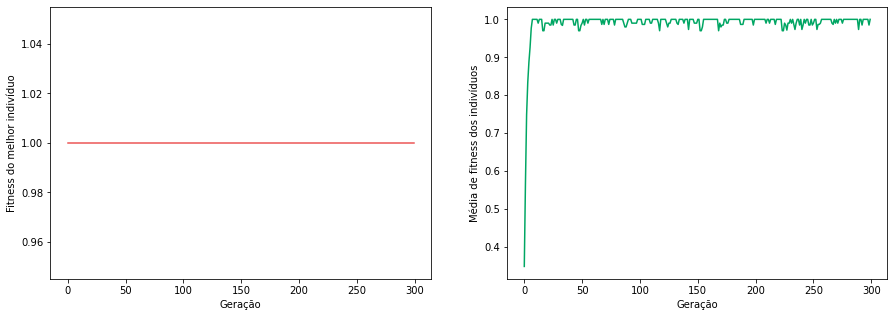

Melhor indivíduo da geração 300:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


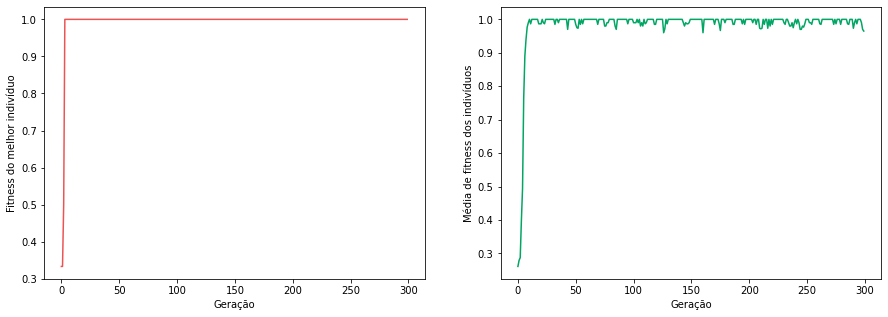

Melhor indivíduo da geração 300:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


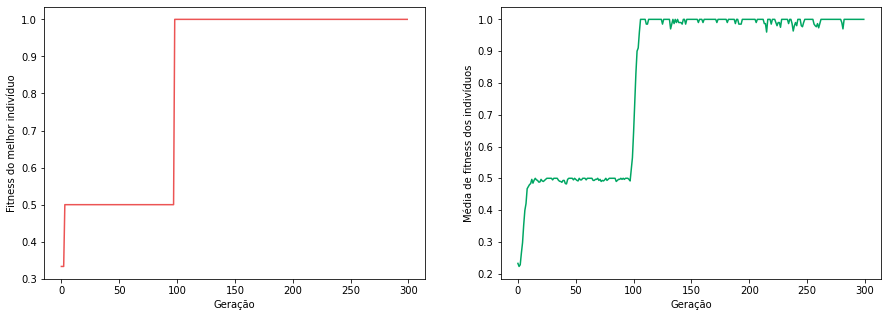

Melhor indivíduo da geração 300:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0
-------------------------------------------------------------------------------------
-- Sem elitismo --


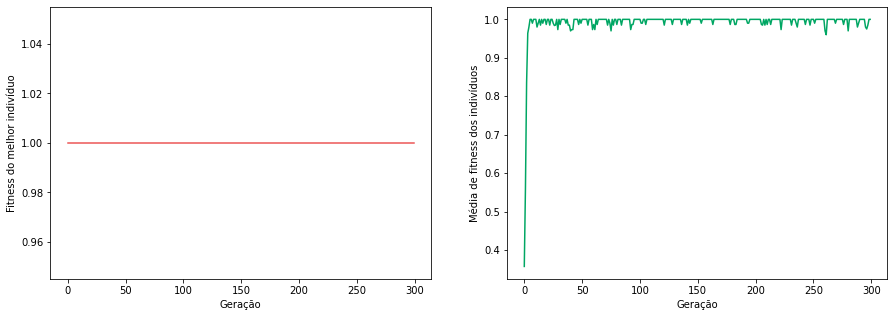

Melhor indivíduo da geração 300:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


In [ ]:
tamanhoIndividuo = 4
numeroRepeticoes = 10
tamanhoPopulacao = 50
numeroGeracoes = 300 # antigo valor era 100
probCrossover = 0.7
probMutacao = 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

numeroRepeticoes = 1
elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

- Mudando o valor da probabilidade de crossover

-- Com elitismo --


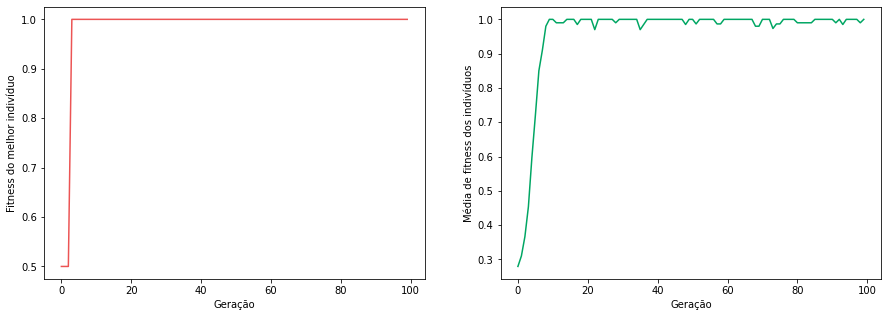

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


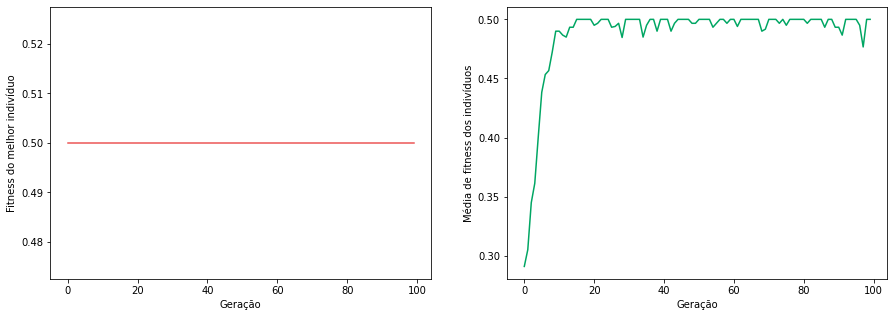

Melhor indivíduo da geração 100:  [3, 0, 2, 1]
Fitness desse indivíduo:   0.5


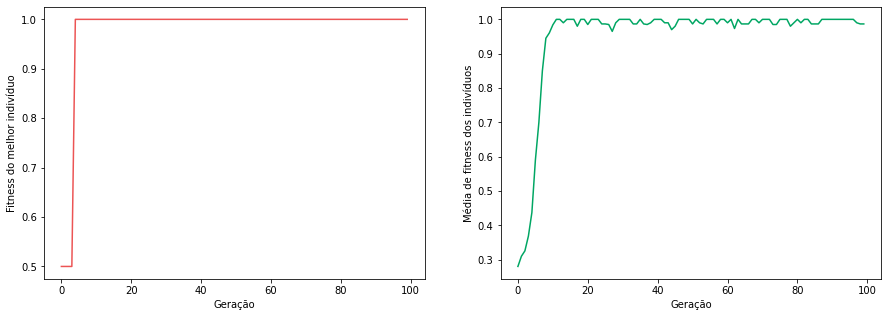

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


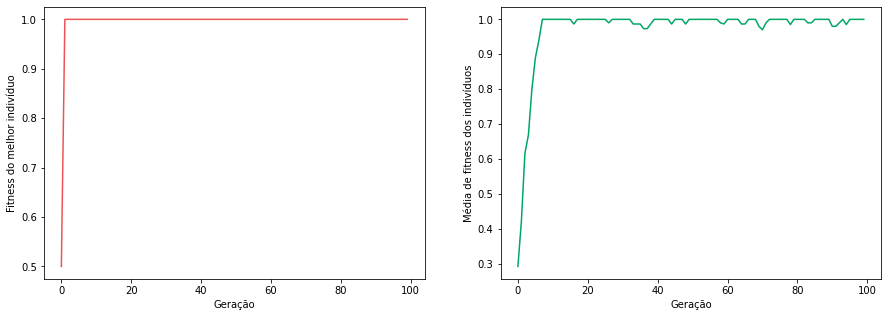

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


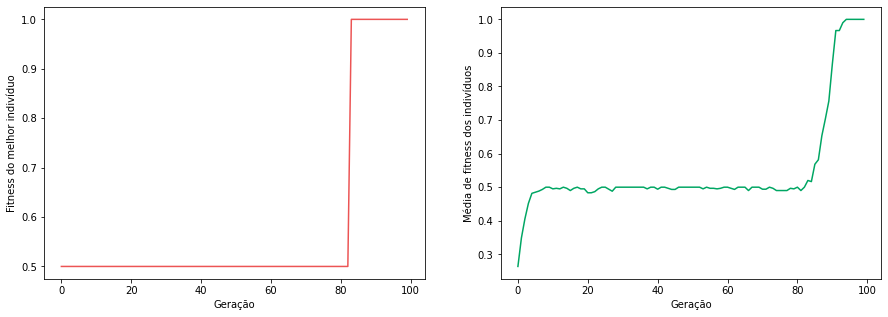

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


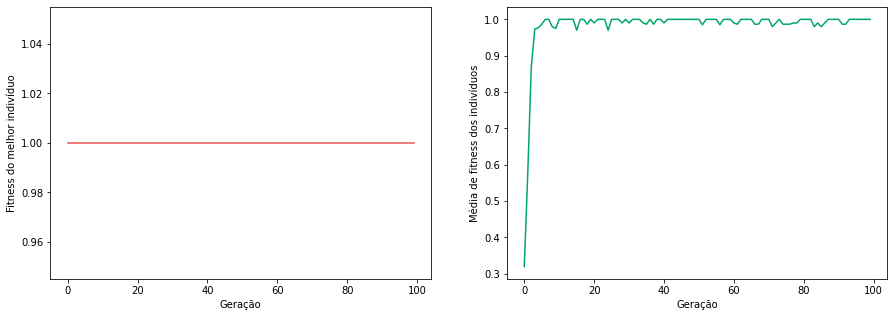

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


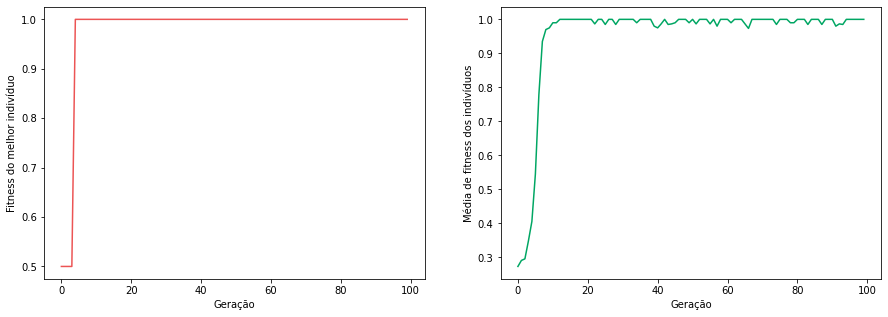

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


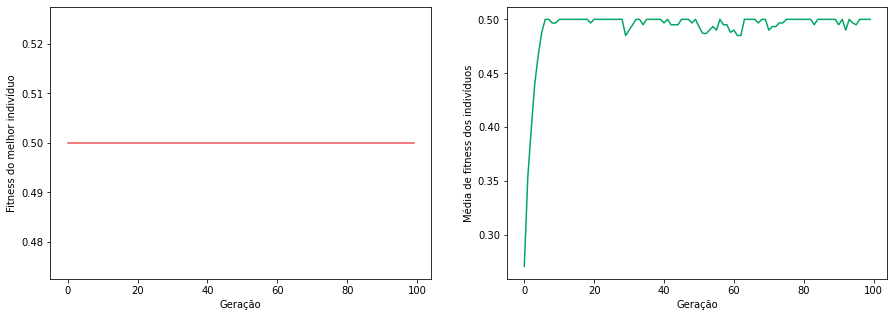

Melhor indivíduo da geração 100:  [0, 3, 1, 2]
Fitness desse indivíduo:   0.5


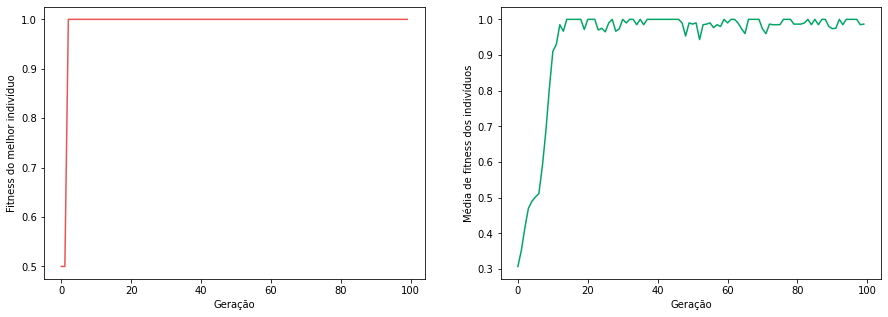

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


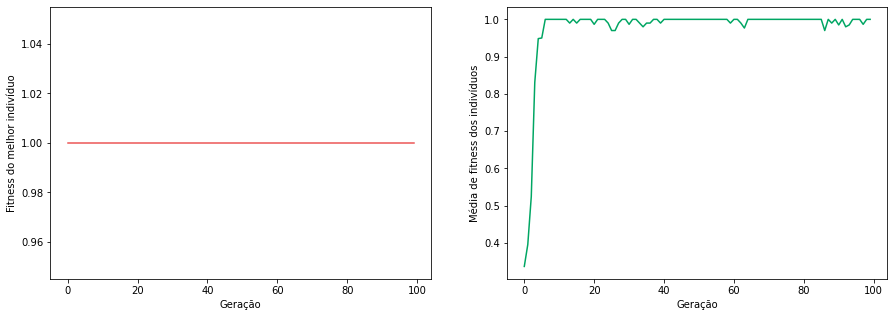

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0
-------------------------------------------------------------------------------------
-- Sem elitismo --


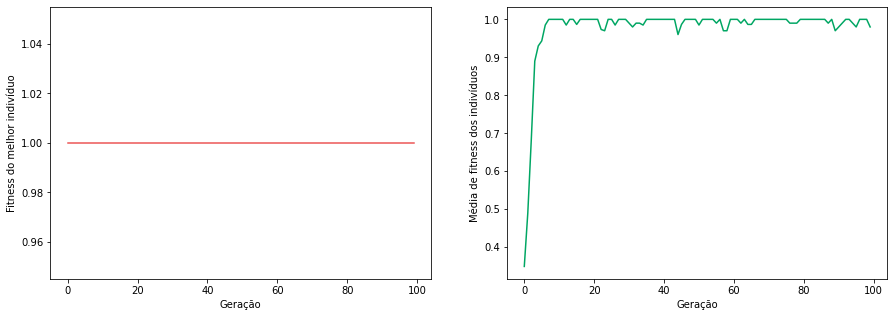

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


In [ ]:
tamanhoIndividuo = 4
numeroRepeticoes = 10
tamanhoPopulacao = 50
numeroGeracoes = 100
probCrossover = 0.8 # antigo valor era 0.7
probMutacao = 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

numeroRepeticoes = 1
elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

- Não é correto termos uma probabilidade de crossover baixa, porque isso significa que a população demorará a se estabilizar. No entanto, para efeitos de teste, podemos simular esse comportamento e analisar os gráficos obtidos:

-- Com elitismo --


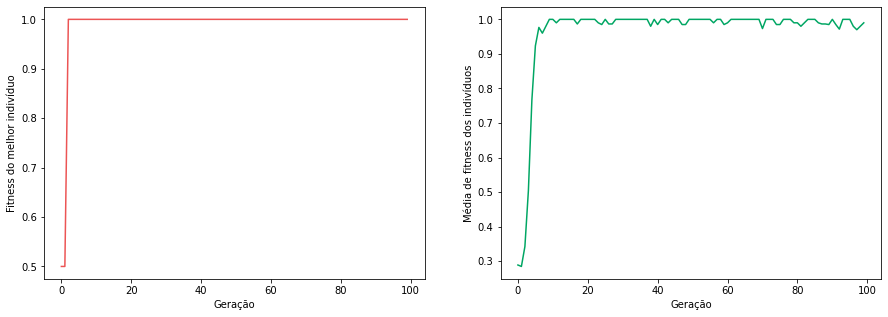

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


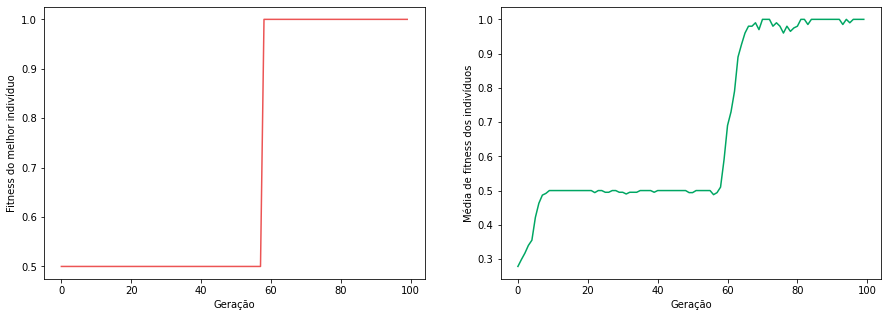

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


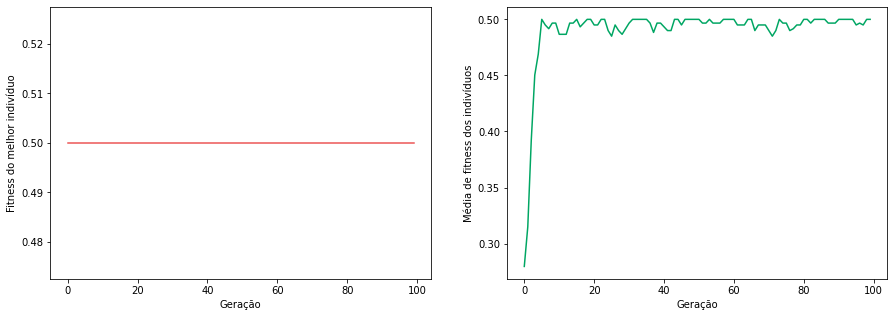

Melhor indivíduo da geração 100:  [1, 3, 2, 0]
Fitness desse indivíduo:   0.5


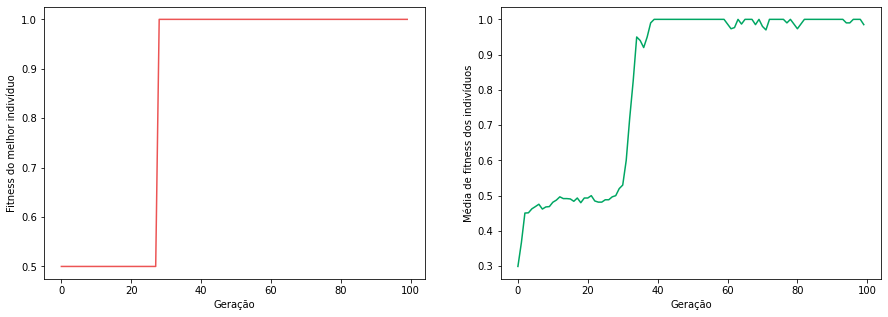

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


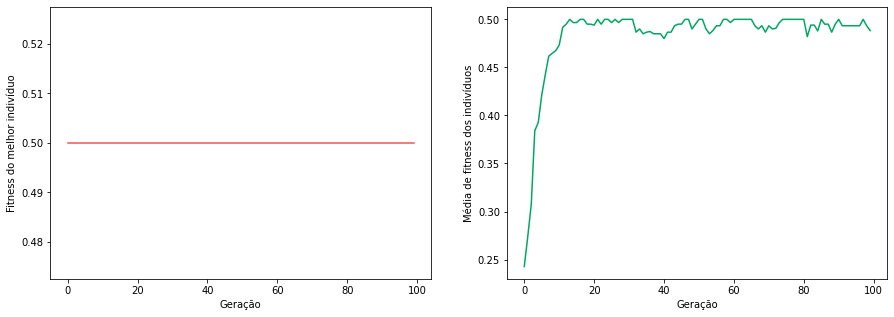

Melhor indivíduo da geração 100:  [0, 3, 1, 2]
Fitness desse indivíduo:   0.5


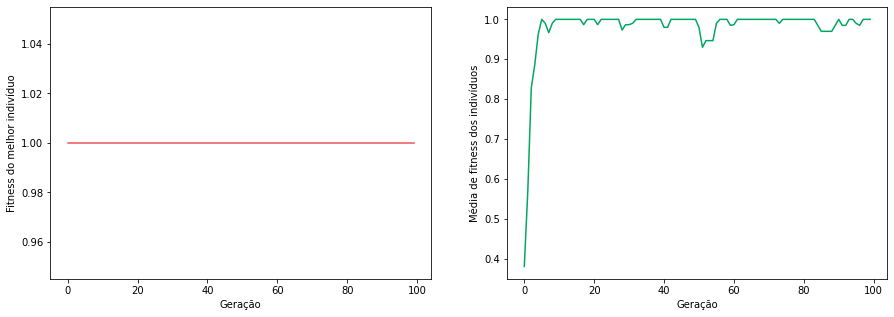

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


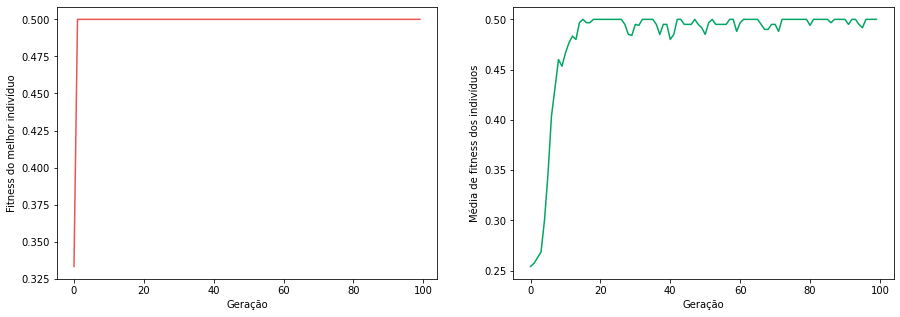

Melhor indivíduo da geração 100:  [3, 1, 0, 2]
Fitness desse indivíduo:   0.5


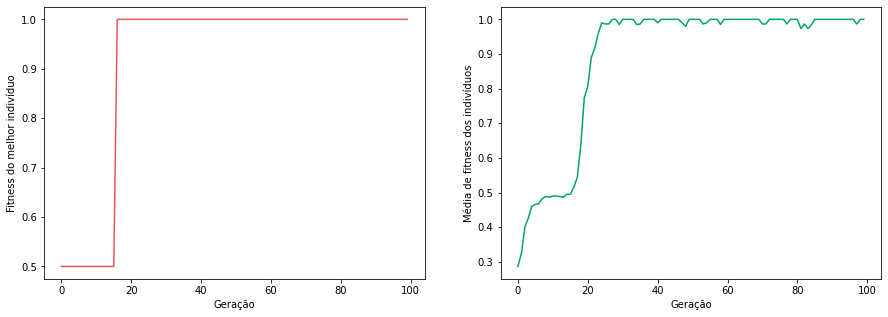

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


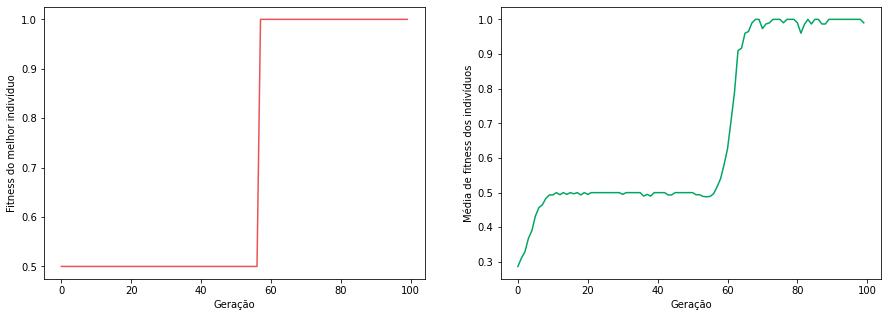

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


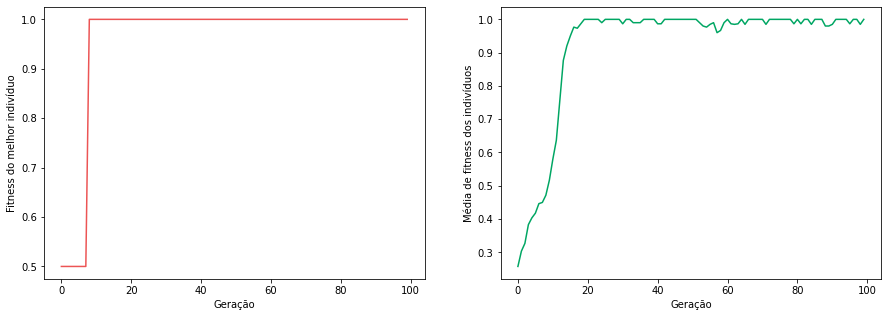

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0
-------------------------------------------------------------------------------------
-- Sem elitismo --


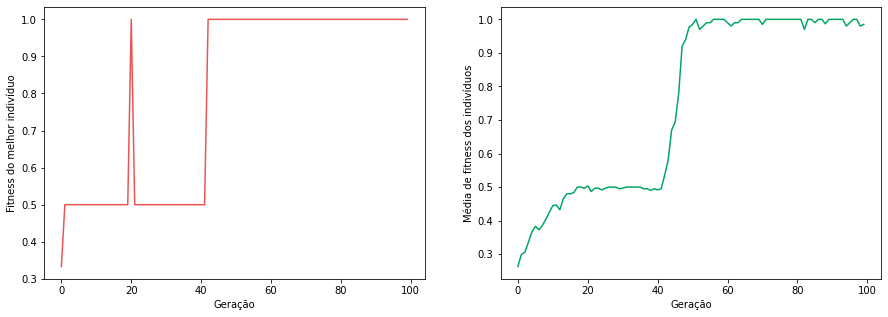

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


In [ ]:
tamanhoIndividuo = 4
numeroRepeticoes = 10
tamanhoPopulacao = 50
numeroGeracoes = 100
probCrossover = 0.1 # antigo valor era 0.7
probMutacao = 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

numeroRepeticoes = 1
elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

- Mudando o valor da probabilidade de mutação

-- Com elitismo --


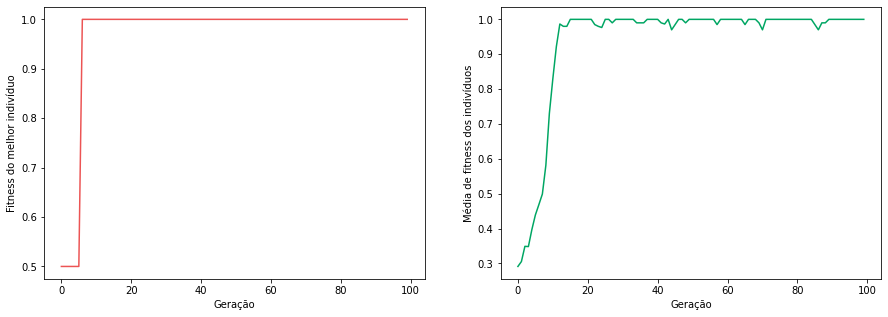

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


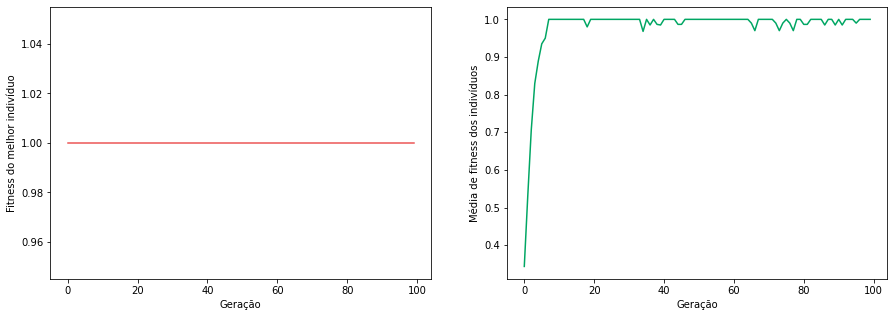

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


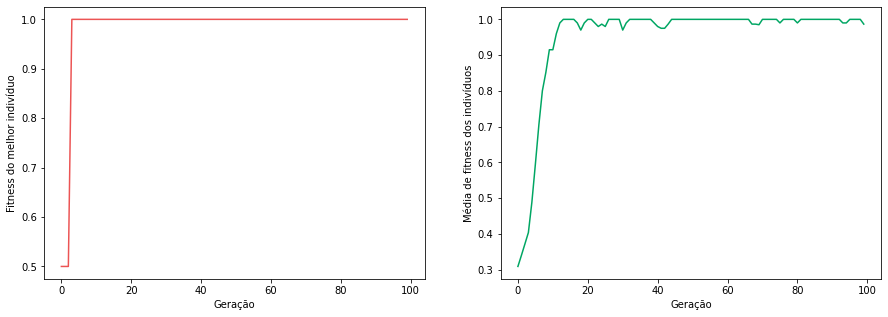

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


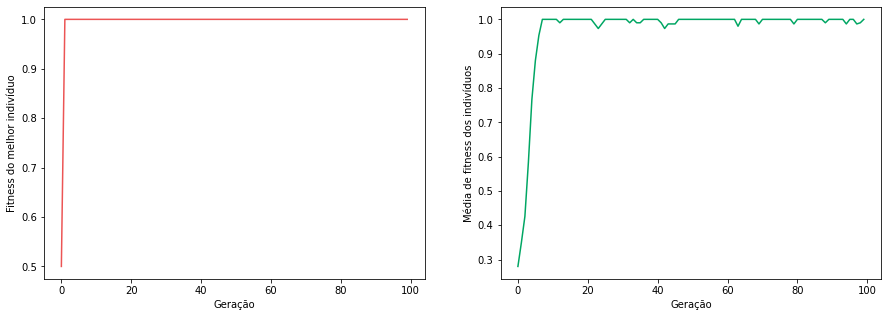

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


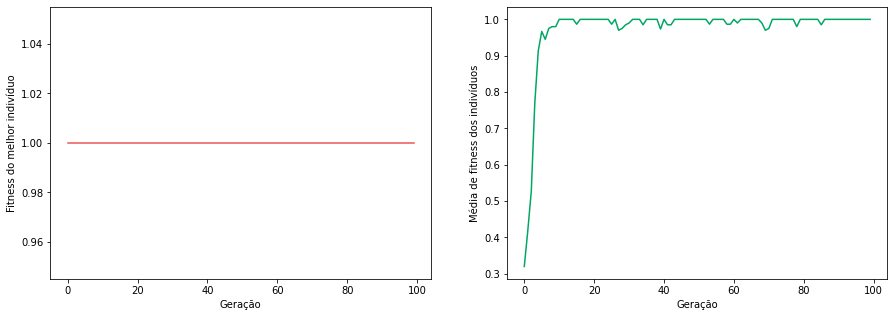

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


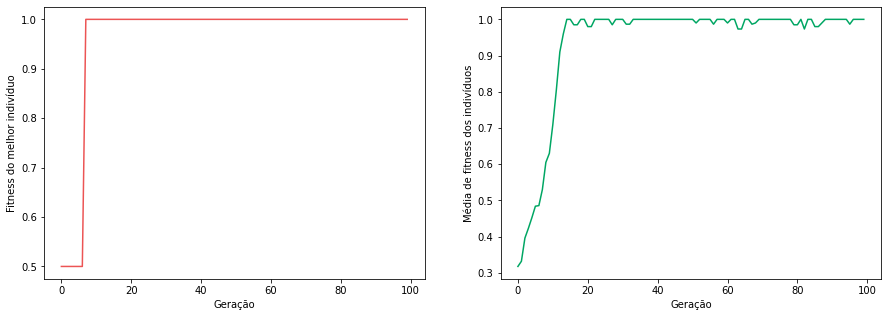

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


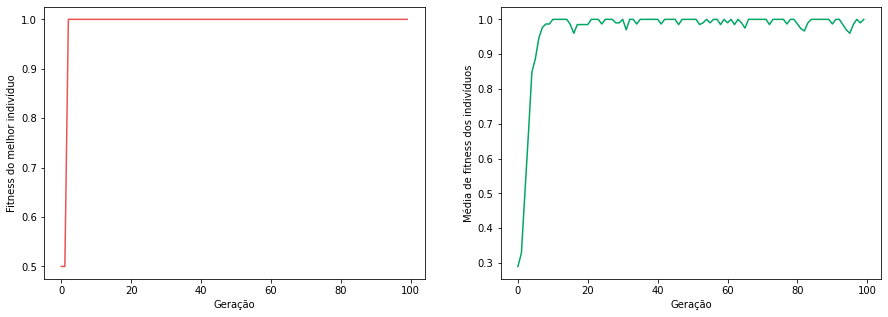

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


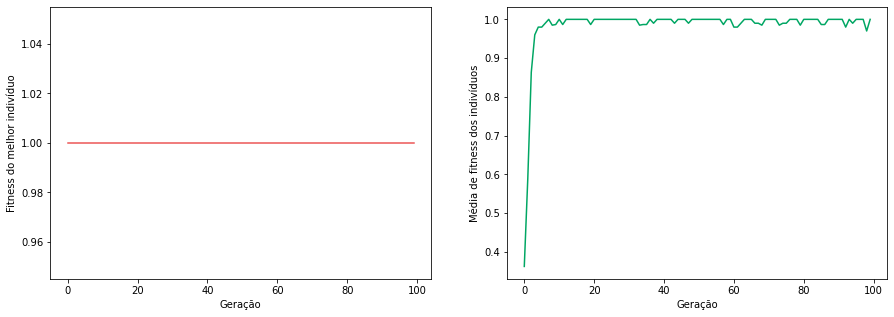

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


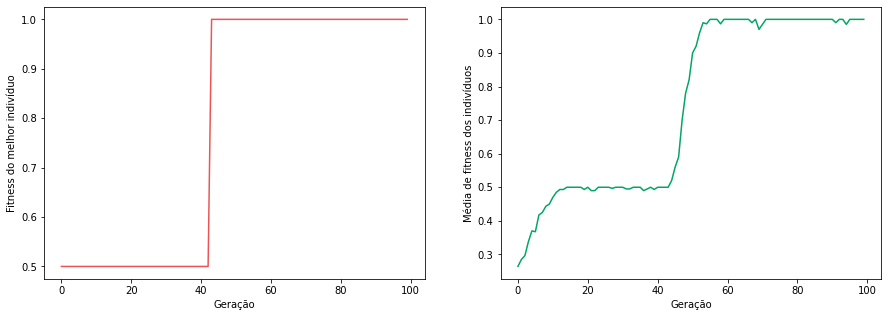

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


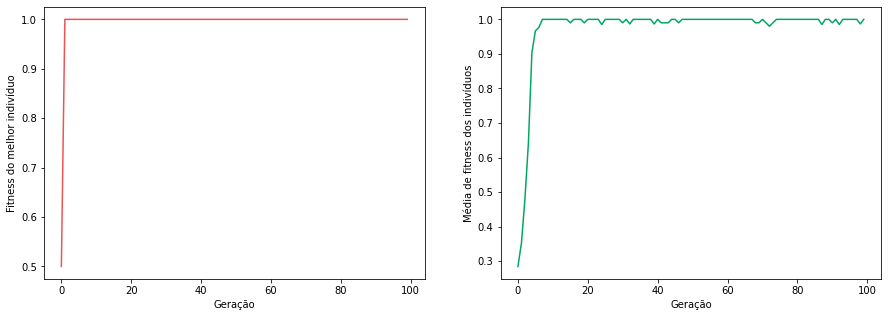

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0
-------------------------------------------------------------------------------------
-- Sem elitismo --


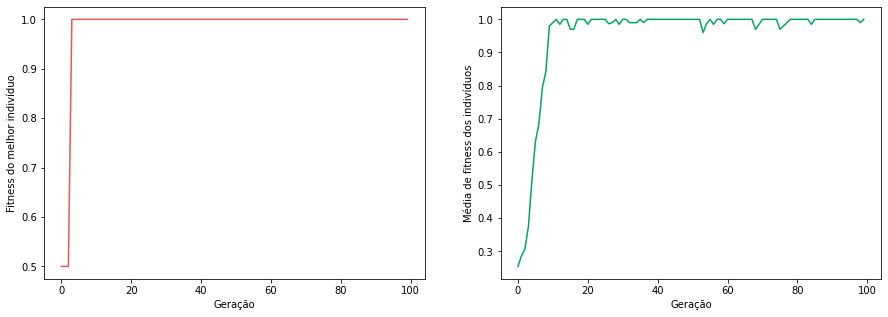

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


In [ ]:
tamanhoIndividuo = 4
numeroRepeticoes = 10
tamanhoPopulacao = 50
numeroGeracoes = 100
probCrossover = 0.7
probMutacao = 0.04 # antigo valor era 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

numeroRepeticoes = 1
elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

- Da mesma maneira, não é correto termos uma probabilidade de mutação alta, porque isso significa que a população será muito diversa, o que tornará a busca aleatória. Novamente, para efeitos de teste, podemos simular esse comportamento e analisar os gráficos obtidos:

-- Com elitismo --


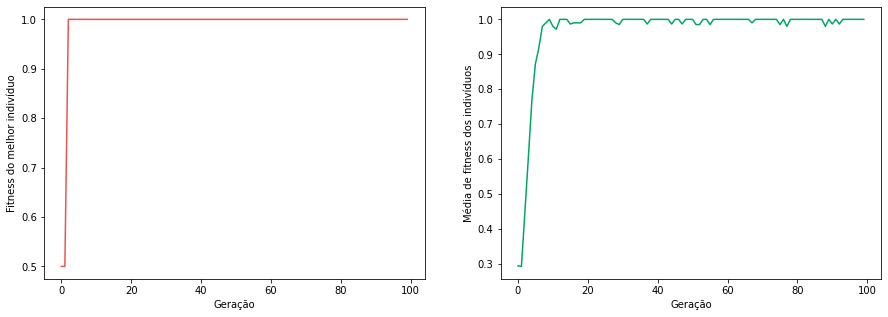

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


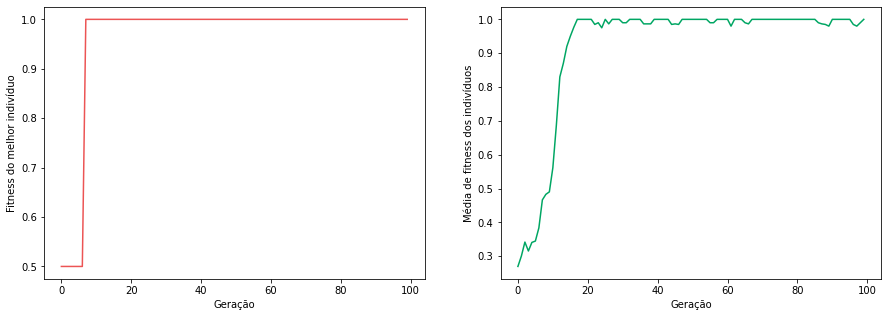

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


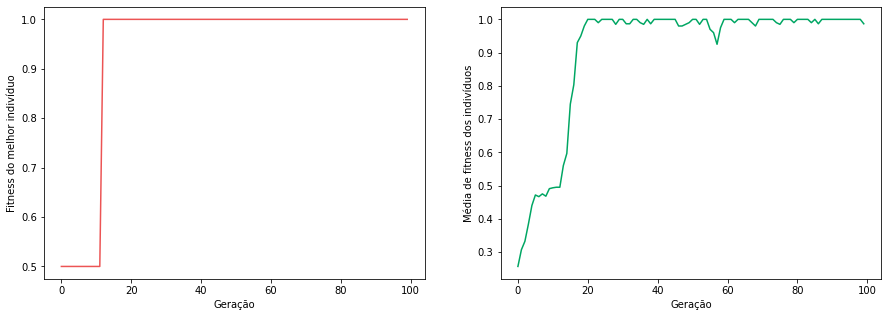

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


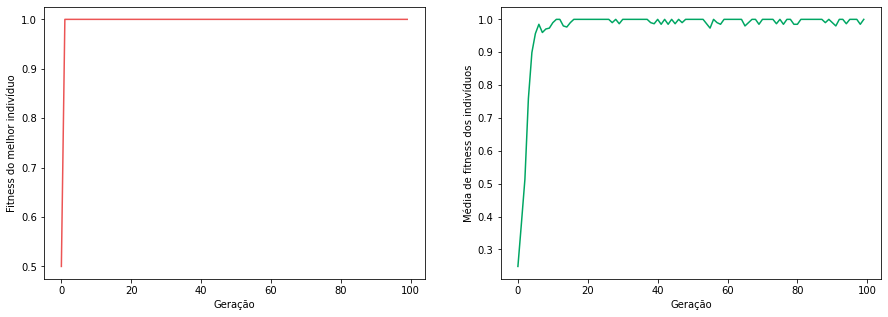

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


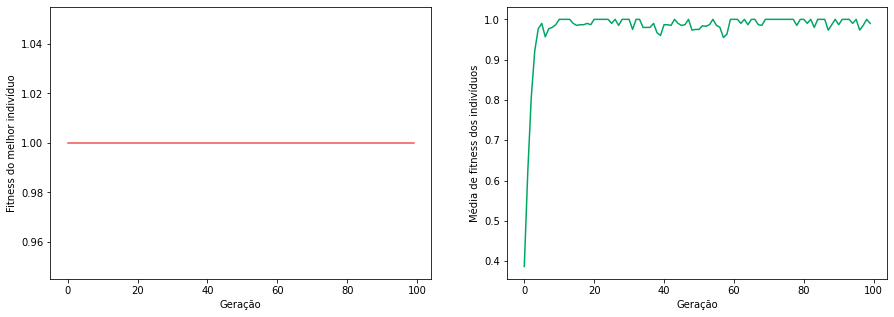

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


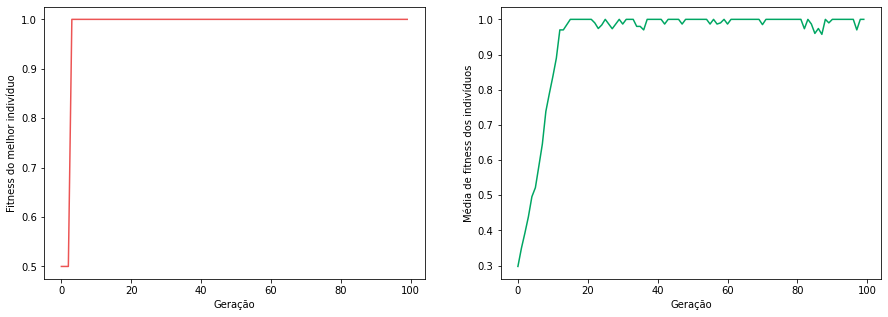

Melhor indivíduo da geração 100:  [2, 0, 3, 1]
Fitness desse indivíduo:   1.0


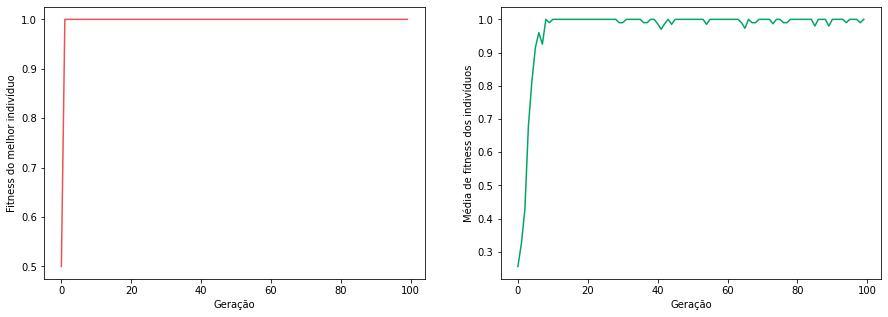

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


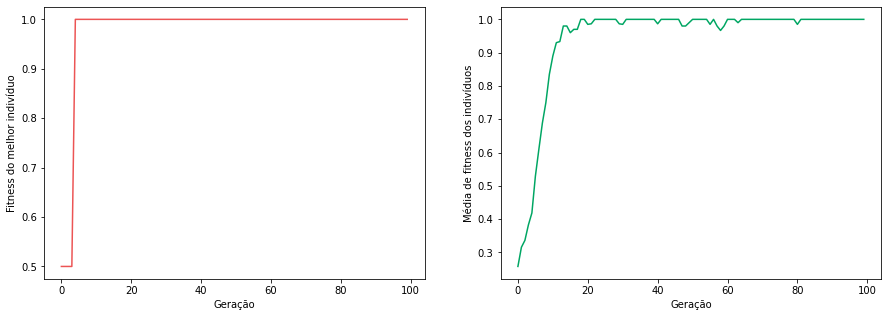

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


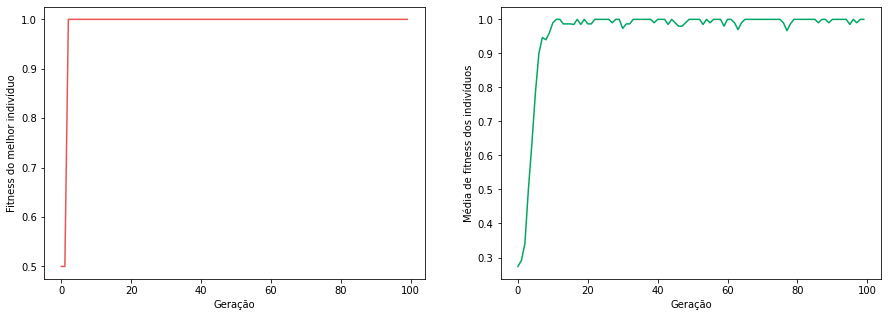

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


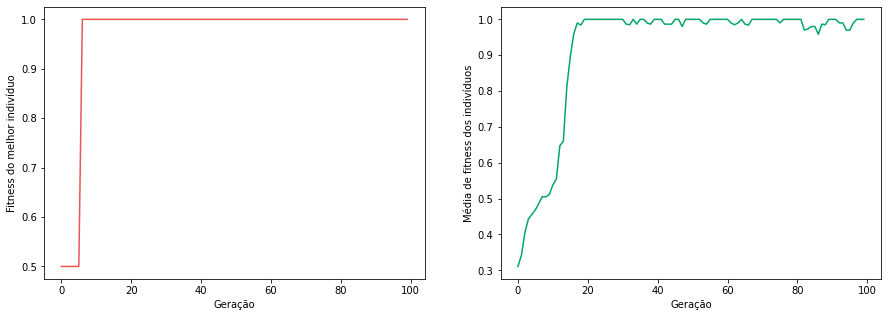

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0
-------------------------------------------------------------------------------------
-- Sem elitismo --


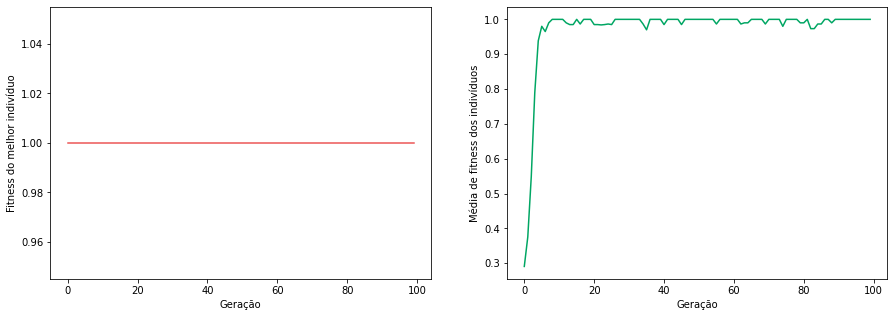

Melhor indivíduo da geração 100:  [1, 3, 0, 2]
Fitness desse indivíduo:   1.0


In [ ]:
tamanhoIndividuo = 4
numeroRepeticoes = 10
tamanhoPopulacao = 50
numeroGeracoes = 100
probCrossover = 0.7
probMutacao = 0.8 # antigo valor era 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

numeroRepeticoes = 1
elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

##### **f.** 1) Problema das 8 rainhas:

- Definição de conjunto de valores inicial:

-- Com elitismo --


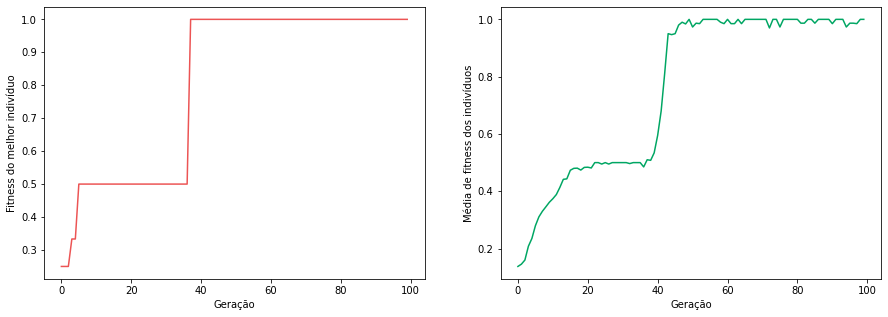

Melhor indivíduo da geração 100:  [5, 7, 1, 3, 0, 6, 4, 2]
Fitness desse indivíduo:   1.0


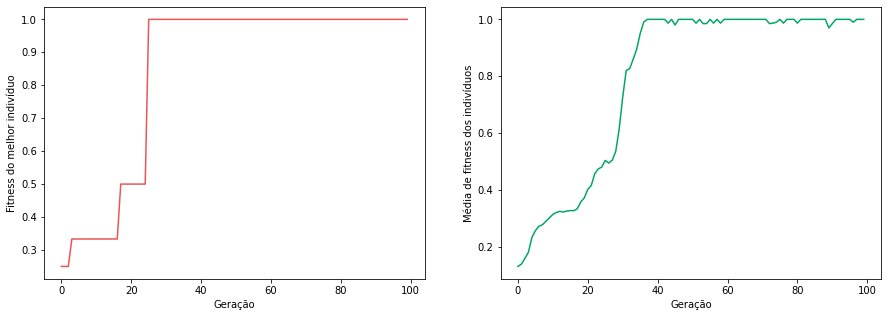

Melhor indivíduo da geração 100:  [2, 5, 3, 0, 7, 4, 6, 1]
Fitness desse indivíduo:   1.0


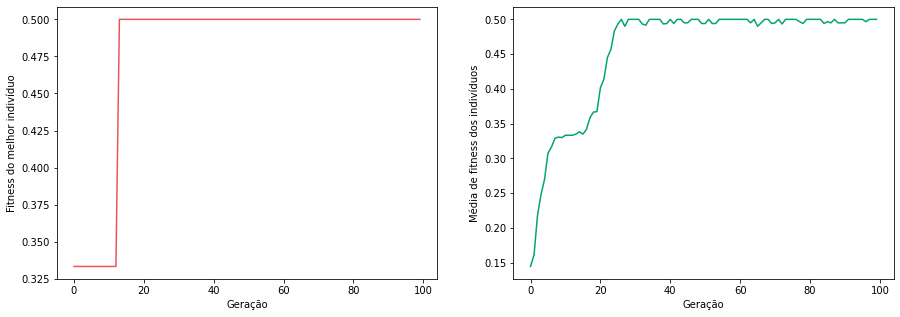

Melhor indivíduo da geração 100:  [6, 4, 7, 0, 3, 5, 2, 1]
Fitness desse indivíduo:   0.5


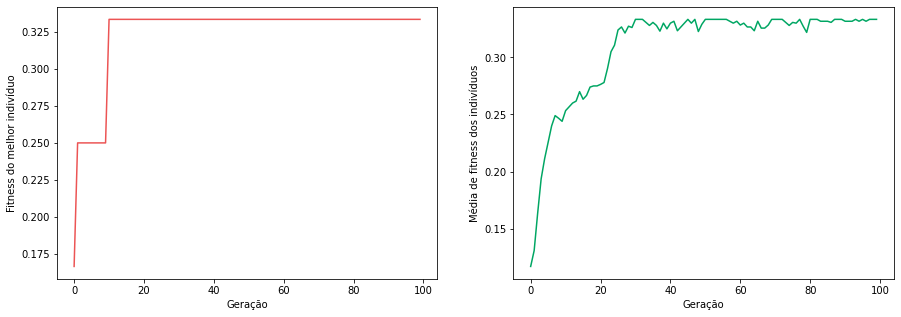

Melhor indivíduo da geração 100:  [2, 0, 6, 4, 1, 7, 0, 3]
Fitness desse indivíduo:   0.3333333333333333


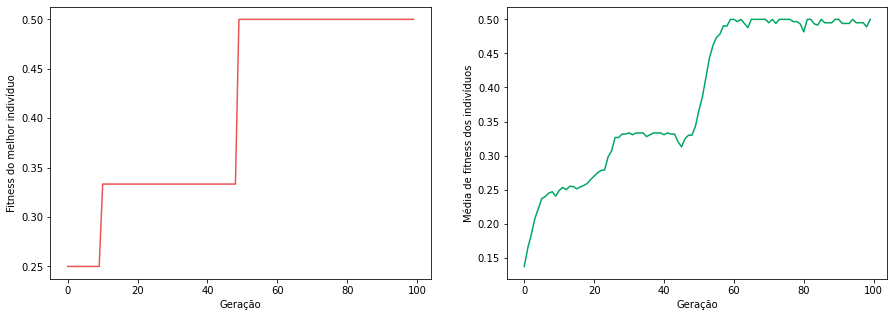

Melhor indivíduo da geração 100:  [5, 2, 5, 1, 6, 4, 0, 7]
Fitness desse indivíduo:   0.5


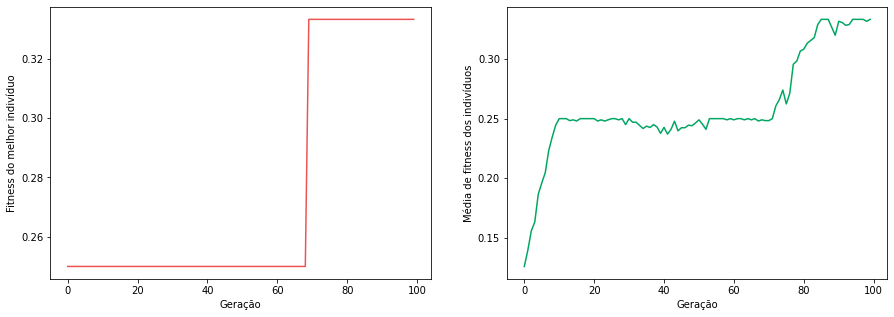

Melhor indivíduo da geração 100:  [3, 6, 3, 7, 0, 7, 5, 2]
Fitness desse indivíduo:   0.3333333333333333


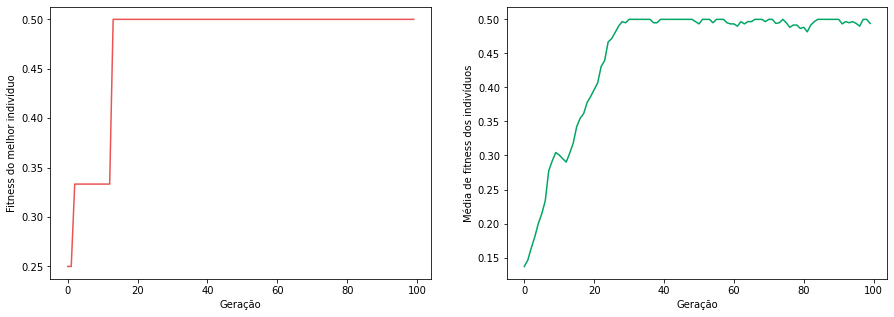

Melhor indivíduo da geração 100:  [1, 6, 2, 0, 7, 4, 0, 3]
Fitness desse indivíduo:   0.5


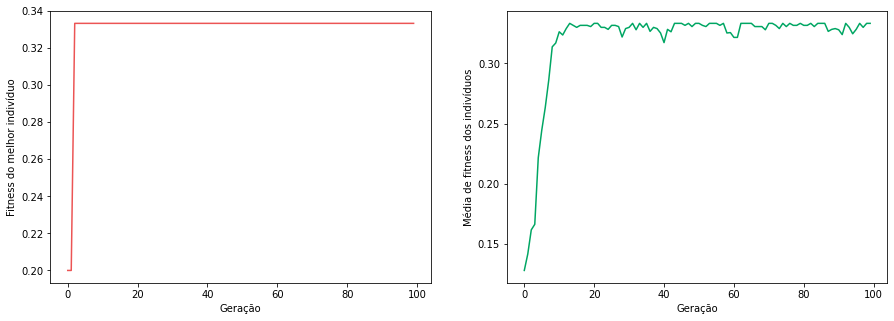

Melhor indivíduo da geração 100:  [4, 1, 7, 3, 5, 0, 2, 6]
Fitness desse indivíduo:   0.3333333333333333


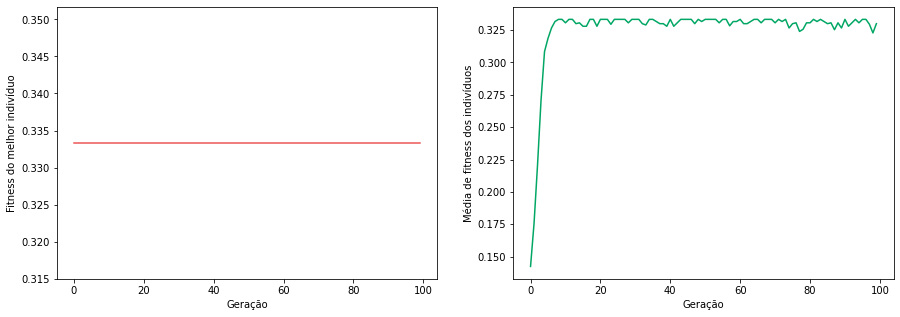

Melhor indivíduo da geração 100:  [3, 5, 2, 4, 0, 7, 3, 1]
Fitness desse indivíduo:   0.3333333333333333


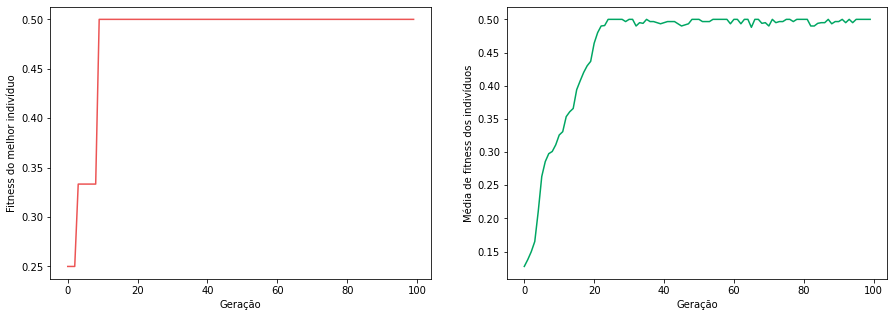

Melhor indivíduo da geração 100:  [3, 1, 7, 2, 0, 6, 4, 5]
Fitness desse indivíduo:   0.5
-------------------------------------------------------------------------------------
-- Sem elitismo --


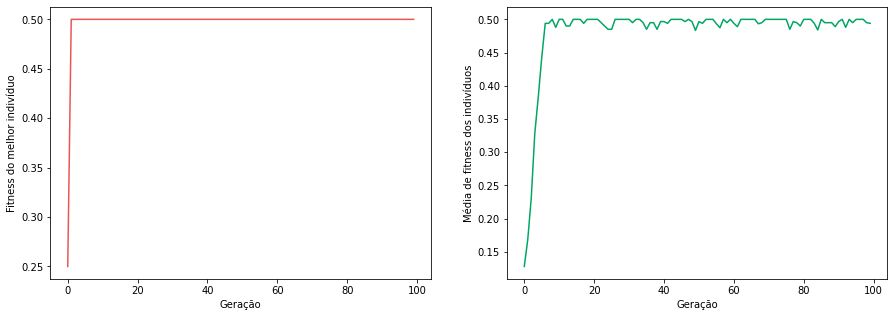

Melhor indivíduo da geração 100:  [5, 1, 6, 4, 0, 7, 0, 2]
Fitness desse indivíduo:   0.5


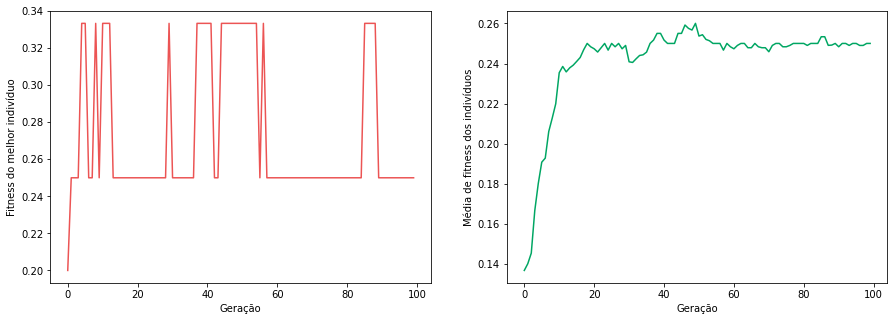

Melhor indivíduo da geração 100:  [1, 4, 5, 1, 2, 7, 3, 6]
Fitness desse indivíduo:   0.25


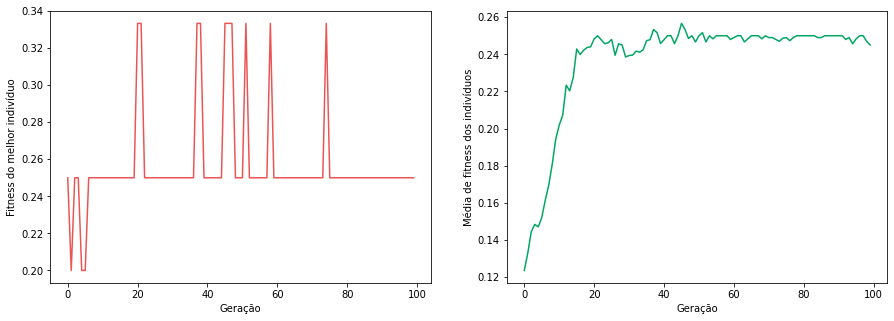

Melhor indivíduo da geração 100:  [2, 7, 5, 1, 6, 4, 7, 3]
Fitness desse indivíduo:   0.25


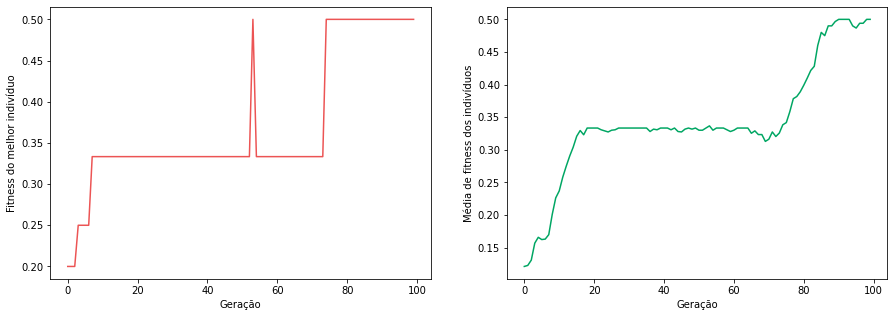

Melhor indivíduo da geração 100:  [2, 6, 3, 0, 7, 4, 0, 5]
Fitness desse indivíduo:   0.5


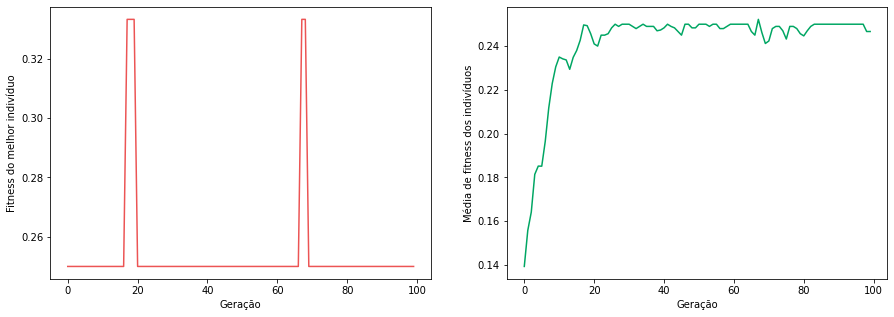

Melhor indivíduo da geração 100:  [4, 0, 2, 6, 1, 7, 5, 1]
Fitness desse indivíduo:   0.25


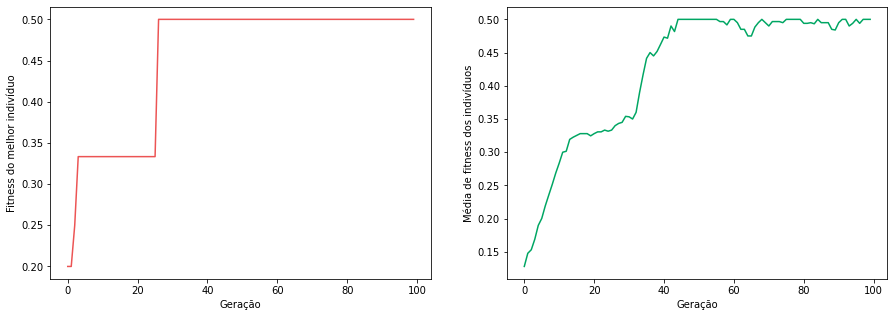

Melhor indivíduo da geração 100:  [3, 6, 0, 1, 4, 7, 5, 2]
Fitness desse indivíduo:   0.5


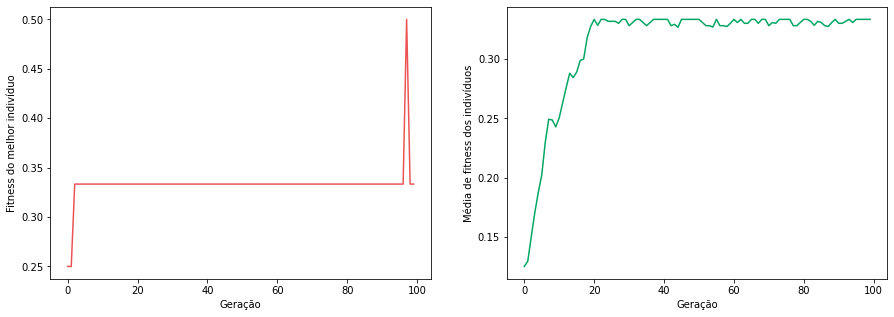

Melhor indivíduo da geração 100:  [3, 1, 7, 7, 2, 0, 5, 0]
Fitness desse indivíduo:   0.3333333333333333


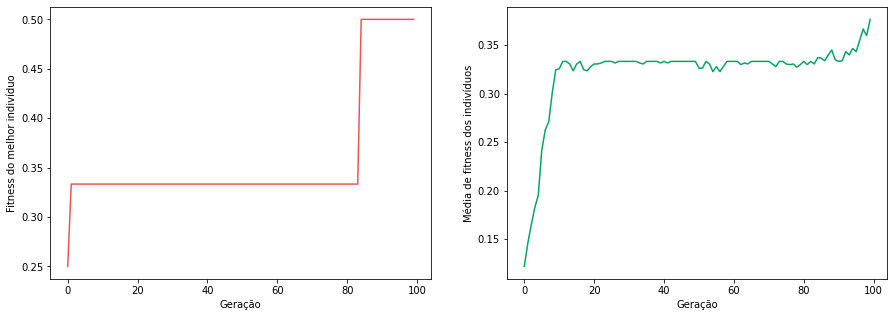

Melhor indivíduo da geração 100:  [6, 4, 1, 5, 0, 2, 3, 7]
Fitness desse indivíduo:   0.5


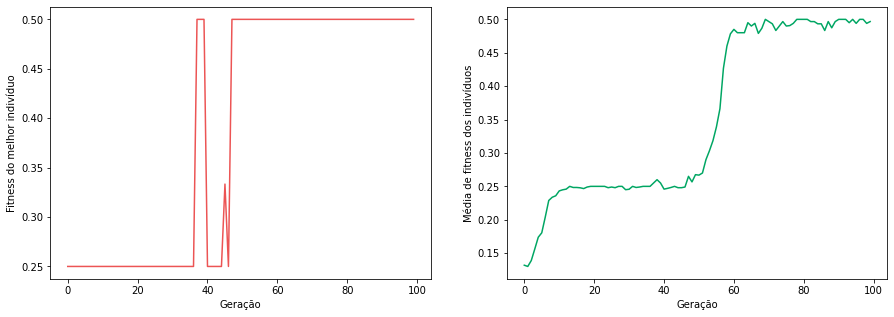

Melhor indivíduo da geração 100:  [4, 1, 7, 2, 6, 3, 5, 0]
Fitness desse indivíduo:   0.5


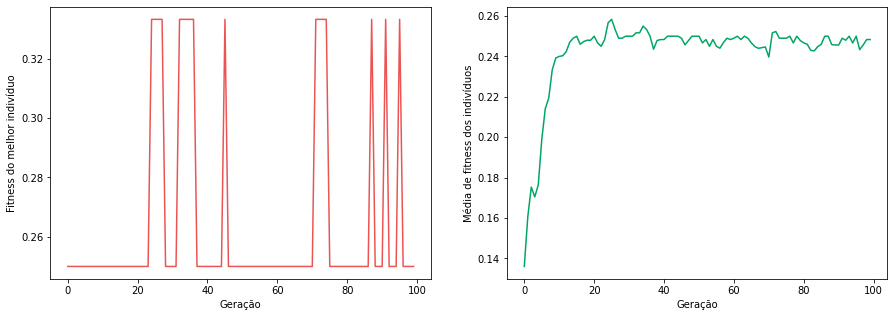

Melhor indivíduo da geração 100:  [4, 0, 2, 6, 2, 6, 1, 3]
Fitness desse indivíduo:   0.25


In [ ]:
tamanhoIndividuo = 8
numeroRepeticoes = 10
tamanhoPopulacao = 50
numeroGeracoes = 100
probCrossover = 0.7
probMutacao = 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

- Mudando o valor do tamanho da população

-- Com elitismo --


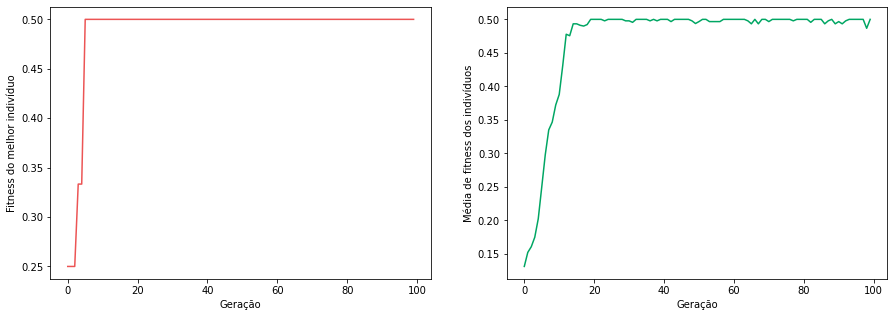

Melhor indivíduo da geração 100:  [3, 5, 7, 1, 6, 0, 7, 4]
Fitness desse indivíduo:   0.5


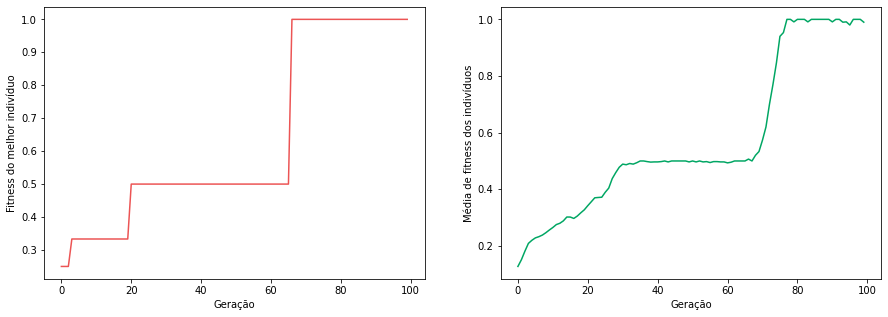

Melhor indivíduo da geração 100:  [2, 5, 7, 1, 3, 0, 6, 4]
Fitness desse indivíduo:   1.0


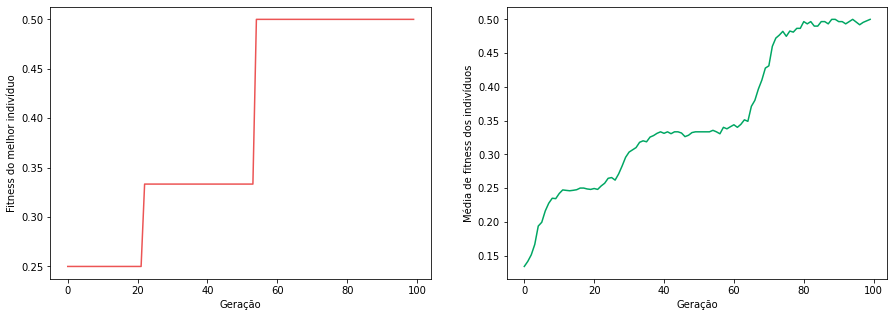

Melhor indivíduo da geração 100:  [0, 4, 6, 5, 3, 1, 7, 2]
Fitness desse indivíduo:   0.5


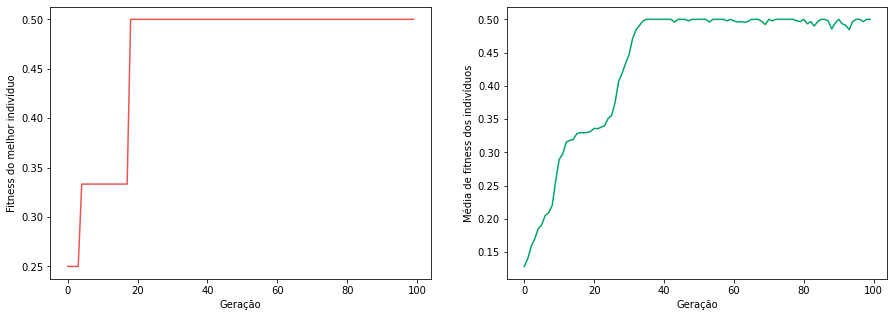

Melhor indivíduo da geração 100:  [5, 3, 1, 7, 2, 4, 6, 0]
Fitness desse indivíduo:   0.5


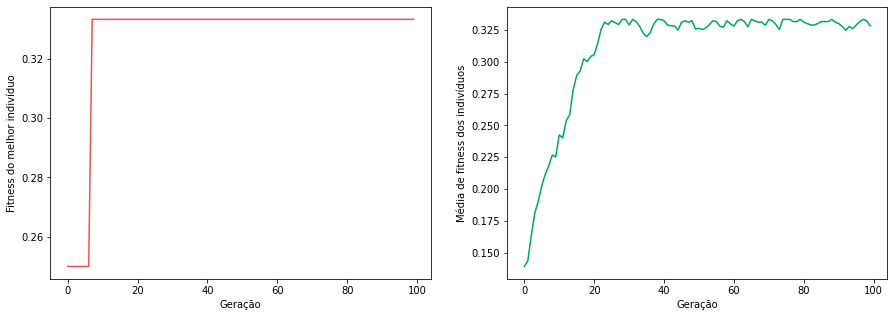

Melhor indivíduo da geração 100:  [4, 1, 7, 0, 5, 3, 1, 6]
Fitness desse indivíduo:   0.3333333333333333


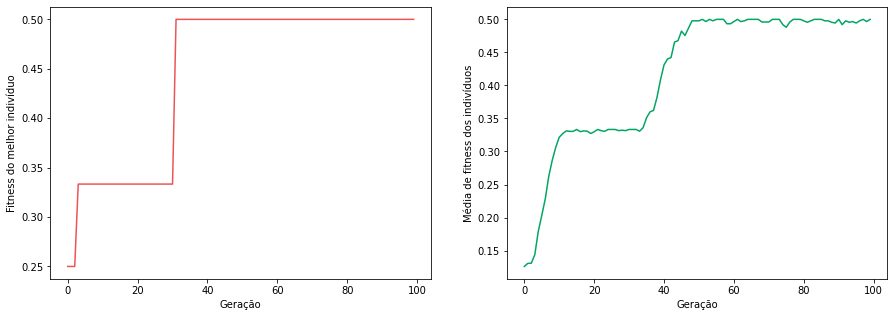

Melhor indivíduo da geração 100:  [5, 7, 0, 3, 6, 4, 1, 4]
Fitness desse indivíduo:   0.5


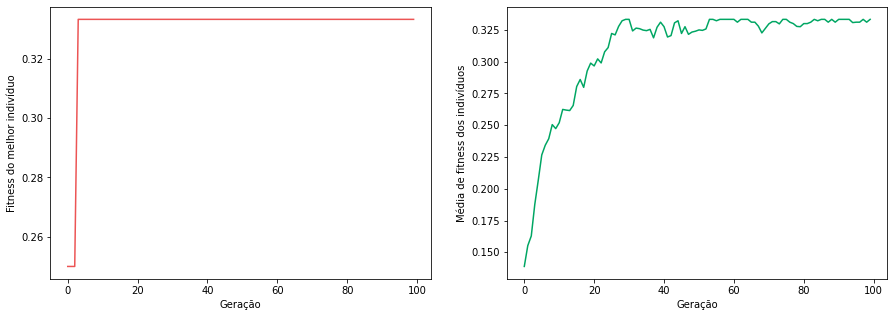

Melhor indivíduo da geração 100:  [4, 2, 0, 5, 1, 6, 3, 7]
Fitness desse indivíduo:   0.3333333333333333


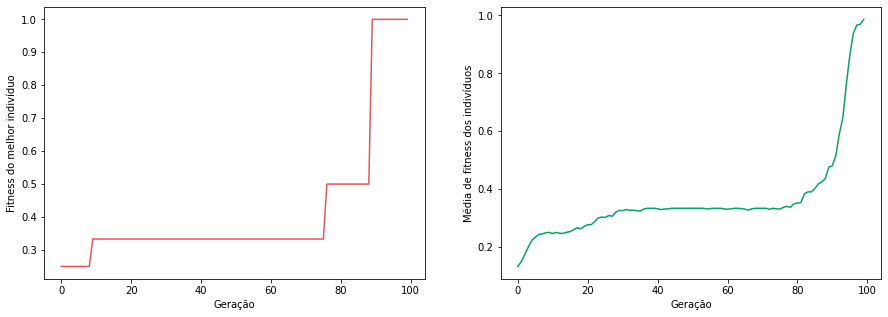

Melhor indivíduo da geração 100:  [4, 6, 3, 0, 2, 7, 5, 1]
Fitness desse indivíduo:   1.0


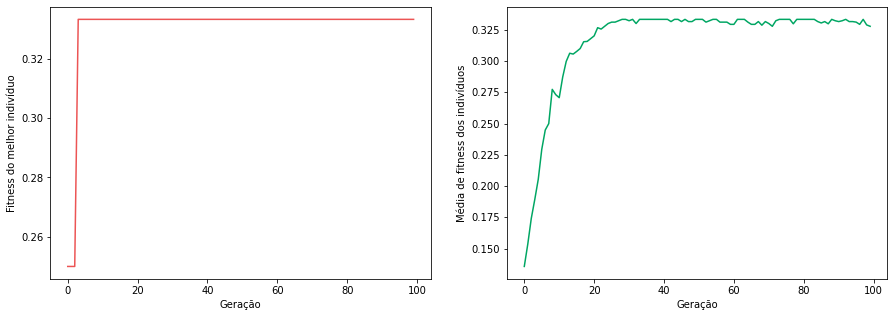

Melhor indivíduo da geração 100:  [7, 1, 3, 6, 6, 0, 2, 4]
Fitness desse indivíduo:   0.3333333333333333


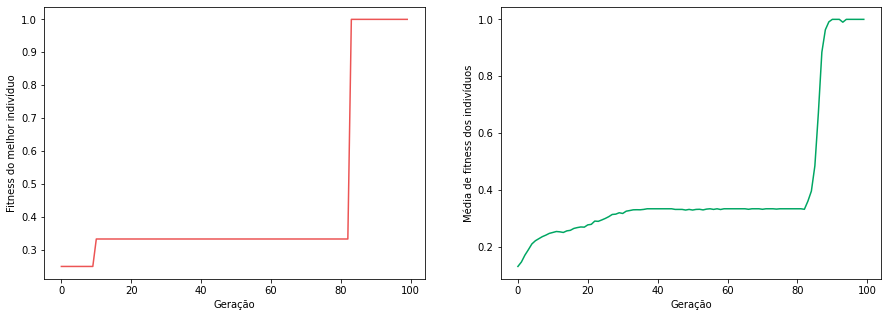

Melhor indivíduo da geração 100:  [6, 4, 2, 0, 5, 7, 1, 3]
Fitness desse indivíduo:   1.0
-------------------------------------------------------------------------------------
-- Sem elitismo --


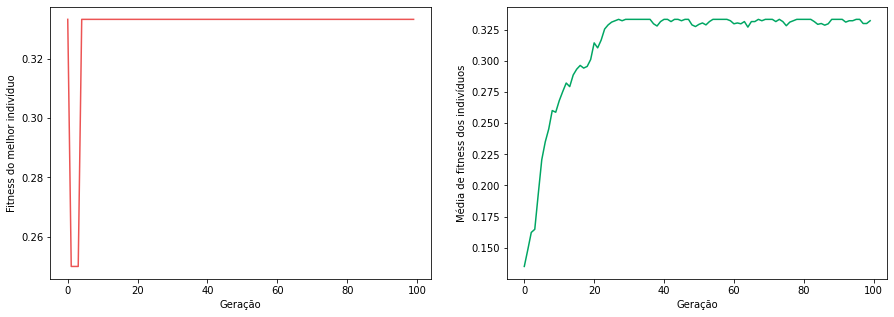

Melhor indivíduo da geração 100:  [6, 0, 3, 1, 4, 2, 7, 5]
Fitness desse indivíduo:   0.3333333333333333


In [ ]:
tamanhoIndividuo = 8
numeroRepeticoes = 10
tamanhoPopulacao = 75 # antigo valor era 50
numeroGeracoes = 100
probCrossover = 0.7
probMutacao = 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

numeroRepeticoes = 1
elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

- Mudando o valor do número de gerações

-- Com elitismo --


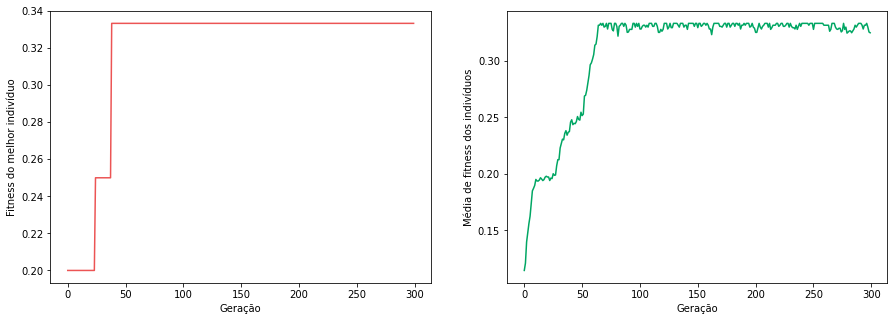

Melhor indivíduo da geração 300:  [6, 1, 7, 2, 0, 2, 4, 5]
Fitness desse indivíduo:   0.3333333333333333


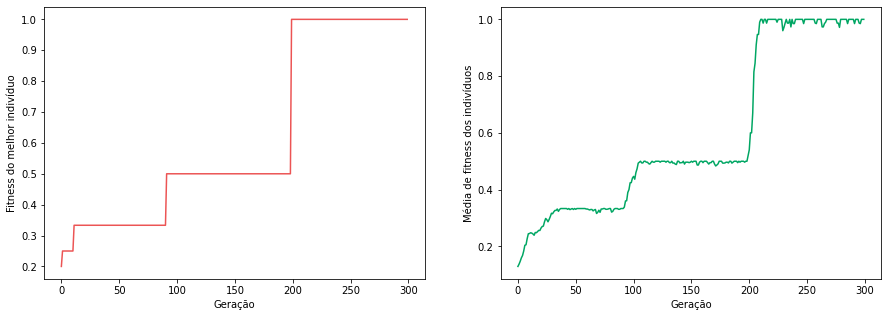

Melhor indivíduo da geração 300:  [5, 2, 4, 7, 0, 3, 1, 6]
Fitness desse indivíduo:   1.0


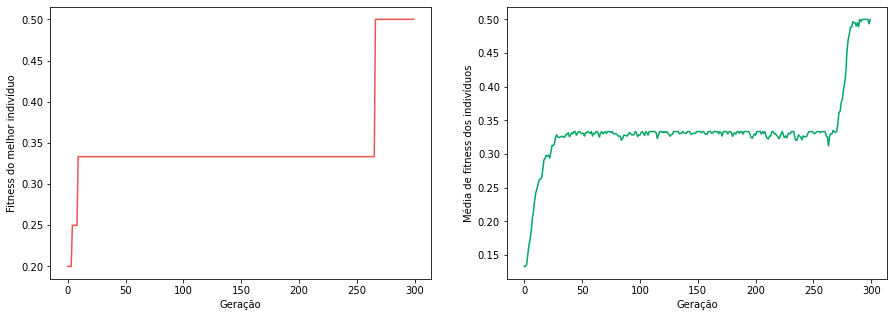

Melhor indivíduo da geração 300:  [1, 6, 5, 3, 0, 7, 4, 2]
Fitness desse indivíduo:   0.5


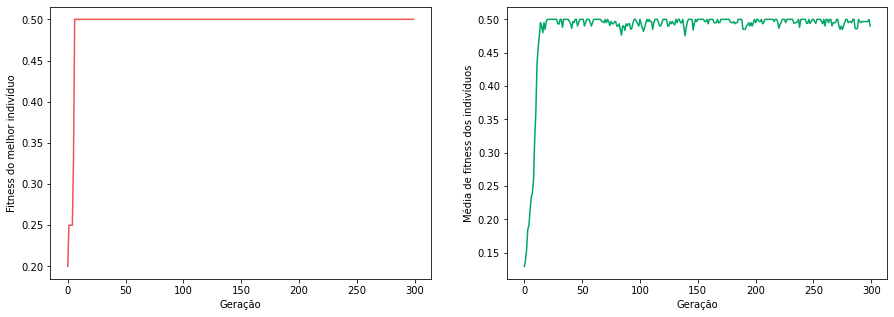

Melhor indivíduo da geração 300:  [3, 7, 4, 1, 5, 0, 2, 6]
Fitness desse indivíduo:   0.5


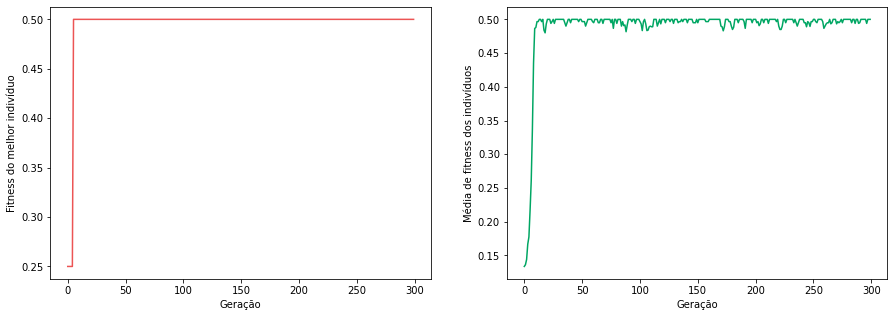

Melhor indivíduo da geração 300:  [2, 5, 3, 0, 6, 4, 1, 7]
Fitness desse indivíduo:   0.5


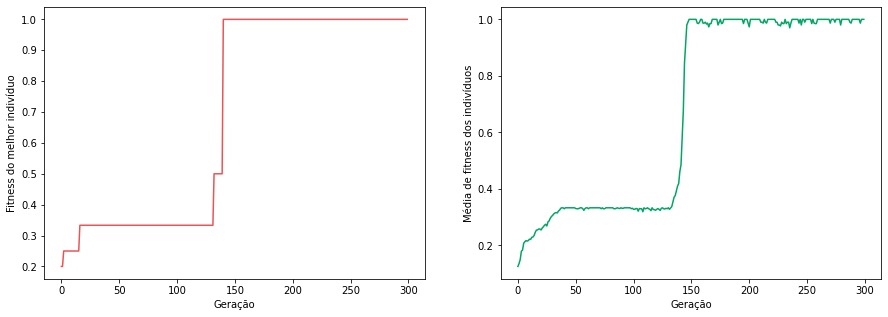

Melhor indivíduo da geração 300:  [5, 2, 6, 1, 7, 4, 0, 3]
Fitness desse indivíduo:   1.0


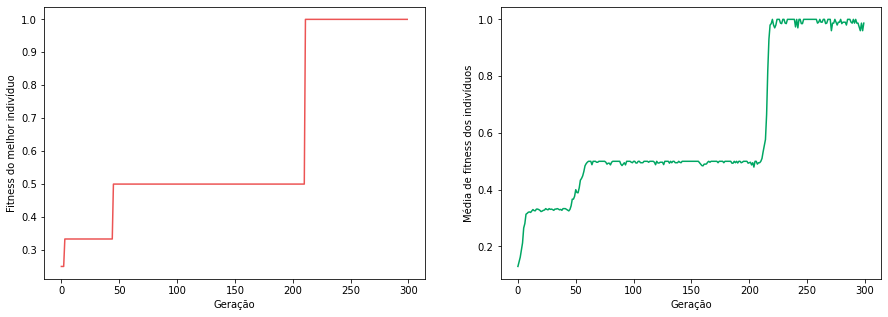

Melhor indivíduo da geração 300:  [3, 5, 7, 1, 6, 0, 2, 4]
Fitness desse indivíduo:   1.0


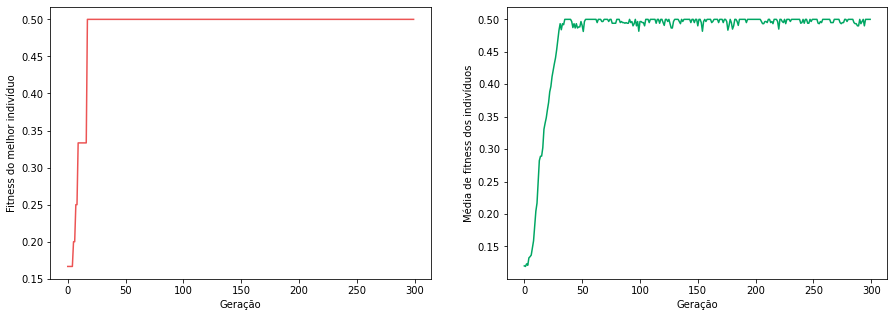

Melhor indivíduo da geração 300:  [0, 5, 3, 6, 0, 7, 1, 4]
Fitness desse indivíduo:   0.5


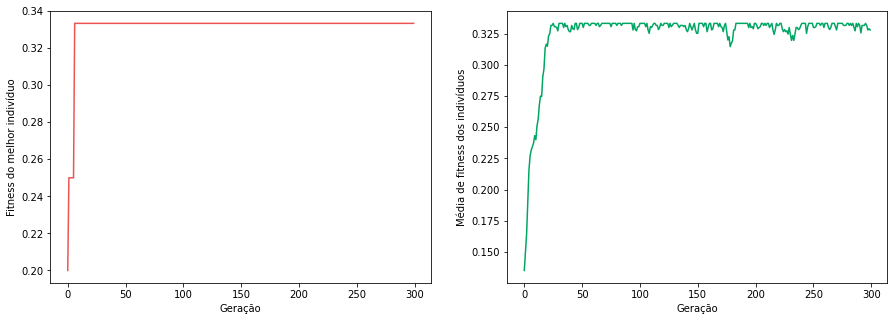

Melhor indivíduo da geração 300:  [2, 7, 3, 1, 6, 4, 0, 7]
Fitness desse indivíduo:   0.3333333333333333


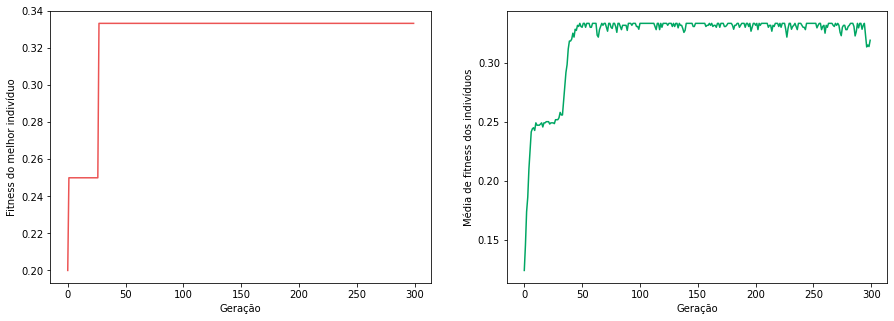

Melhor indivíduo da geração 300:  [0, 2, 5, 1, 6, 4, 7, 3]
Fitness desse indivíduo:   0.3333333333333333
-------------------------------------------------------------------------------------
-- Sem elitismo --


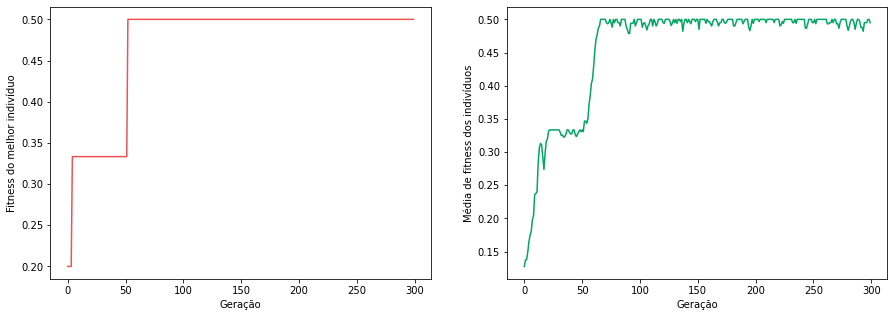

Melhor indivíduo da geração 300:  [6, 3, 0, 4, 1, 5, 2, 7]
Fitness desse indivíduo:   0.5


In [ ]:
tamanhoIndividuo = 8
numeroRepeticoes = 10
tamanhoPopulacao = 50
numeroGeracoes = 300 # antigo valor era 100
probCrossover = 0.7
probMutacao = 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

numeroRepeticoes = 1
elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

- Mudando o valor da probabilidade de crossover

-- Com elitismo --


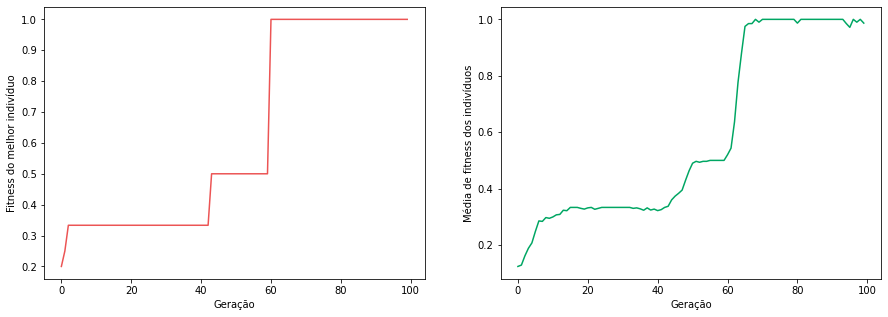

Melhor indivíduo da geração 100:  [4, 7, 3, 0, 6, 1, 5, 2]
Fitness desse indivíduo:   1.0


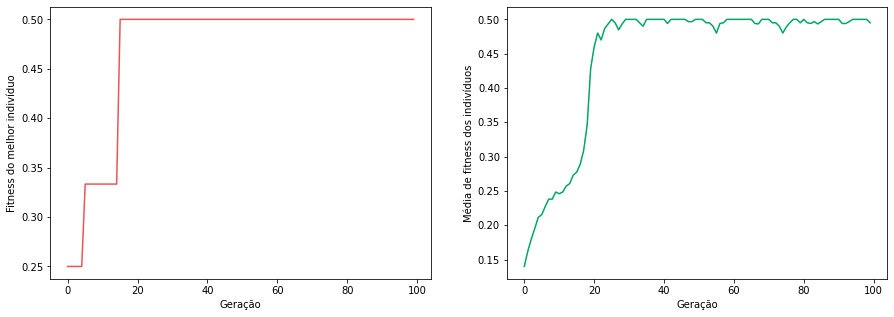

Melhor indivíduo da geração 100:  [1, 7, 4, 6, 0, 2, 5, 3]
Fitness desse indivíduo:   0.5


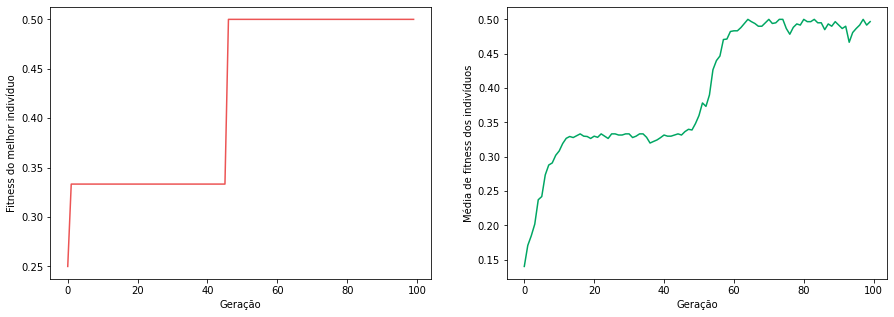

Melhor indivíduo da geração 100:  [1, 6, 2, 7, 7, 0, 3, 5]
Fitness desse indivíduo:   0.5


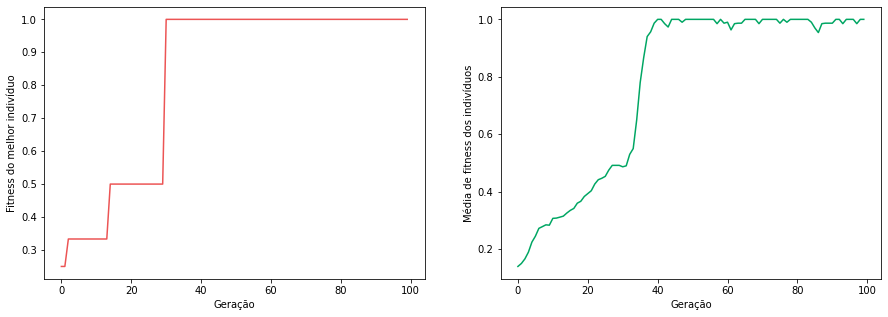

Melhor indivíduo da geração 100:  [1, 5, 0, 6, 3, 7, 2, 4]
Fitness desse indivíduo:   1.0


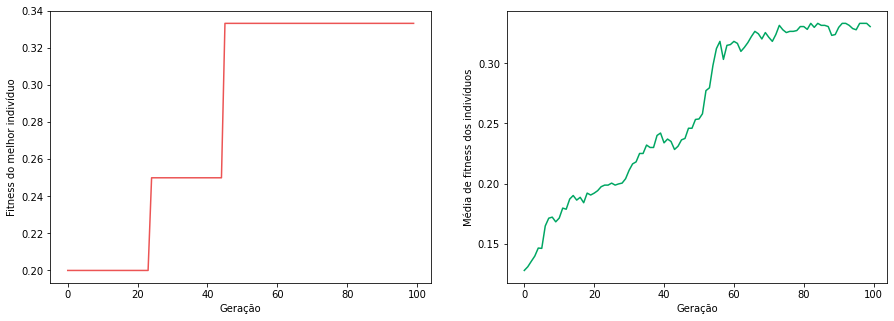

Melhor indivíduo da geração 100:  [3, 6, 0, 7, 5, 1, 2, 7]
Fitness desse indivíduo:   0.3333333333333333


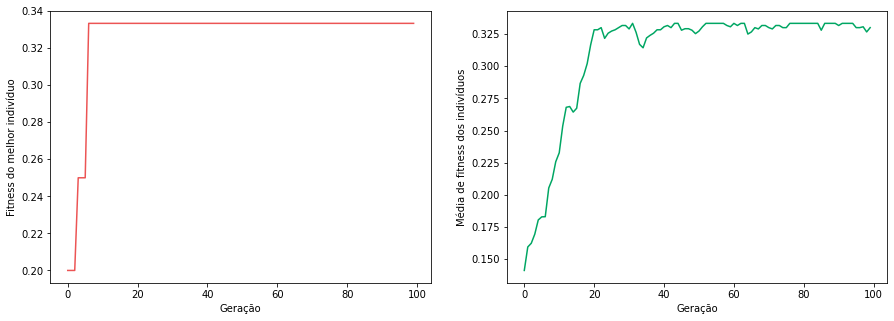

Melhor indivíduo da geração 100:  [2, 2, 7, 3, 0, 5, 1, 6]
Fitness desse indivíduo:   0.3333333333333333


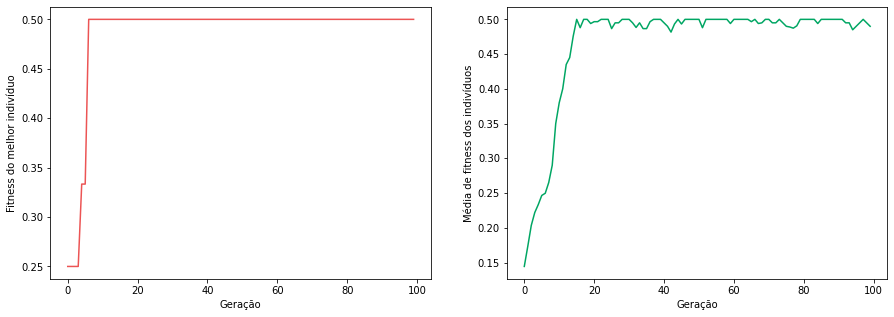

Melhor indivíduo da geração 100:  [5, 3, 0, 7, 3, 1, 6, 2]
Fitness desse indivíduo:   0.5


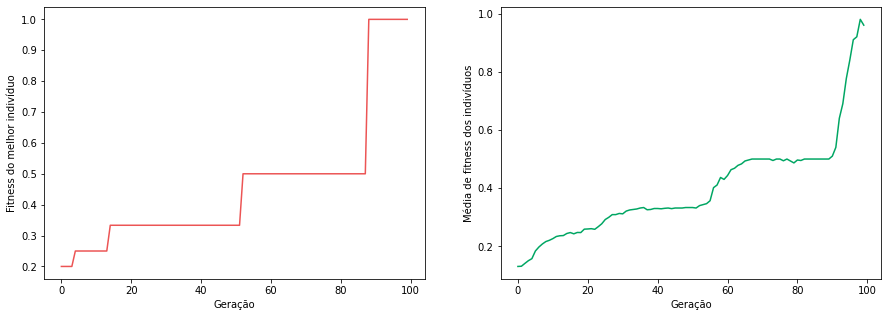

Melhor indivíduo da geração 100:  [4, 0, 7, 3, 1, 6, 2, 5]
Fitness desse indivíduo:   1.0


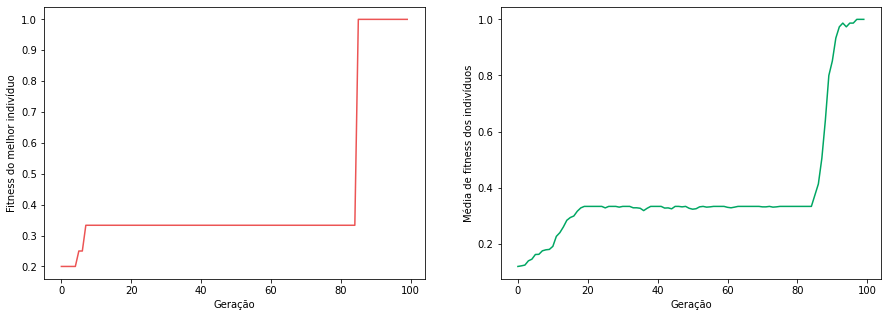

Melhor indivíduo da geração 100:  [4, 2, 7, 3, 6, 0, 5, 1]
Fitness desse indivíduo:   1.0


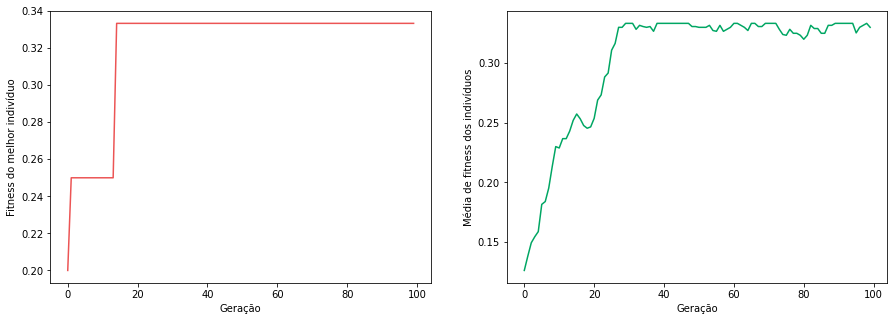

Melhor indivíduo da geração 100:  [7, 0, 4, 1, 1, 5, 2, 6]
Fitness desse indivíduo:   0.3333333333333333
-------------------------------------------------------------------------------------
-- Sem elitismo --


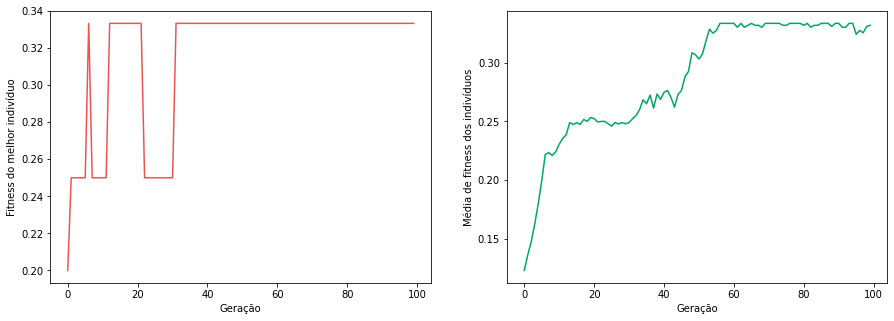

Melhor indivíduo da geração 100:  [1, 5, 7, 0, 4, 7, 1, 3]
Fitness desse indivíduo:   0.3333333333333333


In [ ]:
tamanhoIndividuo = 8
numeroRepeticoes = 10
tamanhoPopulacao = 50
numeroGeracoes = 100
probCrossover = 0.8 # antigo valor era 0.7
probMutacao = 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

numeroRepeticoes = 1
elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

- Mudando o valor da probabilidade de mutação

-- Com elitismo --


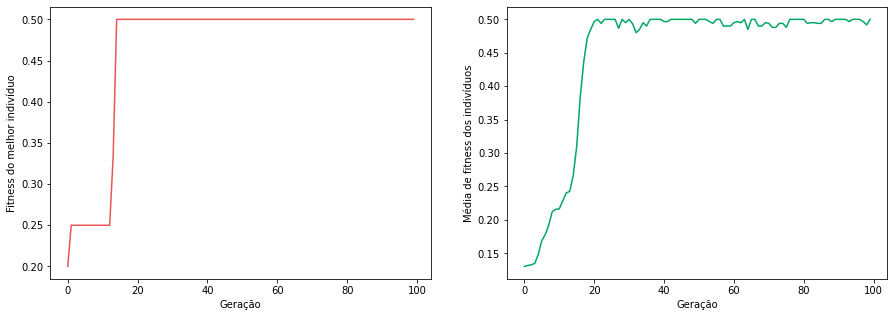

Melhor indivíduo da geração 100:  [5, 7, 2, 0, 3, 6, 4, 1]
Fitness desse indivíduo:   0.5


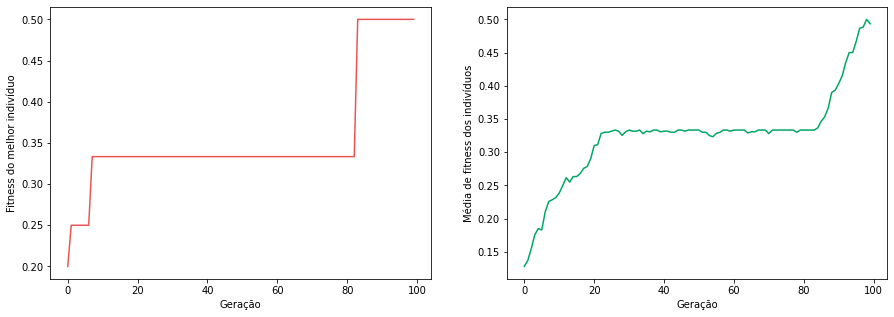

Melhor indivíduo da geração 100:  [3, 0, 7, 7, 4, 6, 1, 5]
Fitness desse indivíduo:   0.5


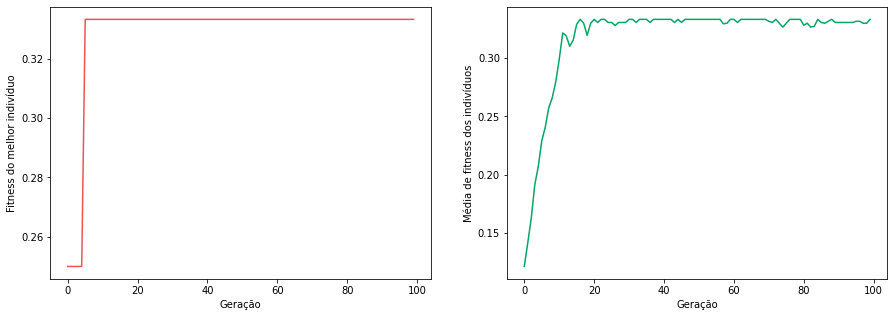

Melhor indivíduo da geração 100:  [3, 6, 3, 7, 4, 4, 0, 5]
Fitness desse indivíduo:   0.3333333333333333


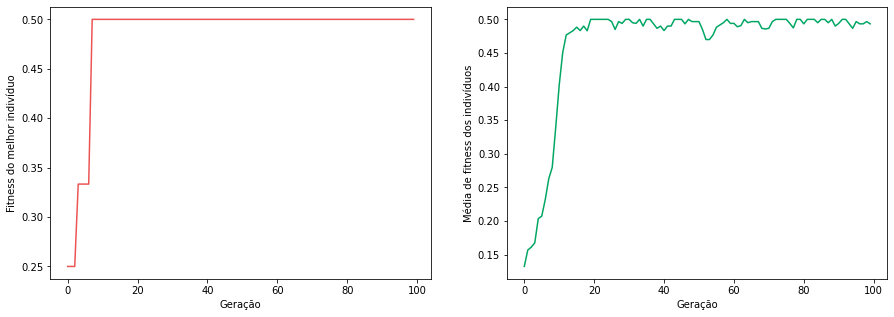

Melhor indivíduo da geração 100:  [2, 2, 5, 7, 0, 3, 6, 4]
Fitness desse indivíduo:   0.5


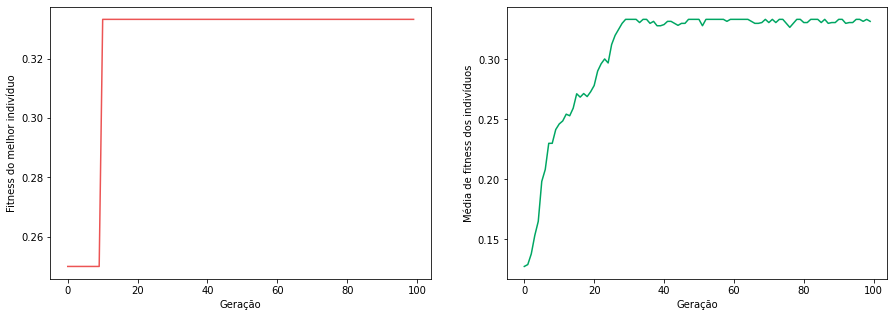

Melhor indivíduo da geração 100:  [2, 0, 6, 4, 7, 5, 1, 3]
Fitness desse indivíduo:   0.3333333333333333


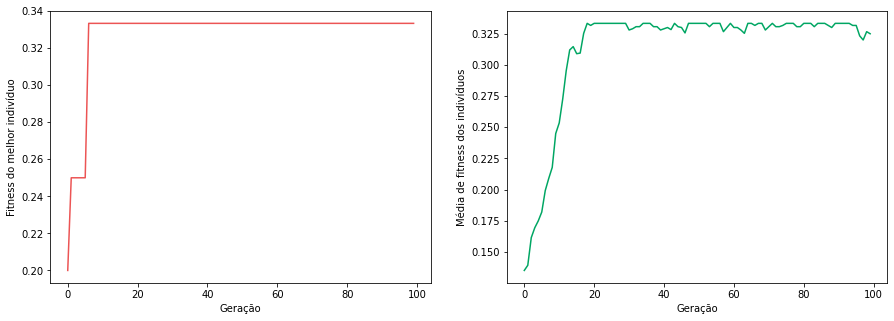

Melhor indivíduo da geração 100:  [3, 0, 7, 5, 2, 2, 6, 1]
Fitness desse indivíduo:   0.3333333333333333


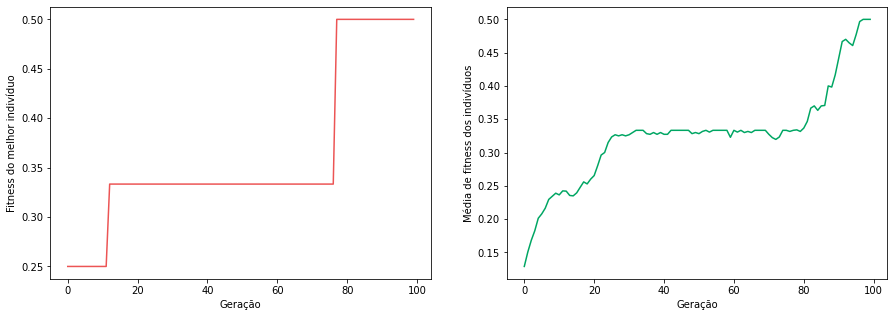

Melhor indivíduo da geração 100:  [3, 1, 4, 7, 0, 2, 5, 6]
Fitness desse indivíduo:   0.5


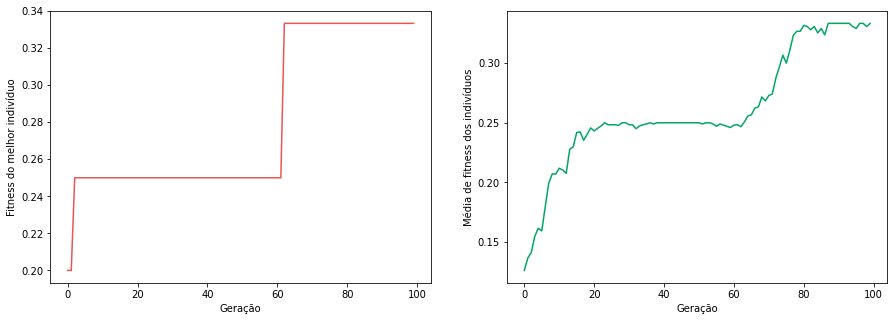

Melhor indivíduo da geração 100:  [6, 2, 5, 5, 1, 0, 4, 7]
Fitness desse indivíduo:   0.3333333333333333


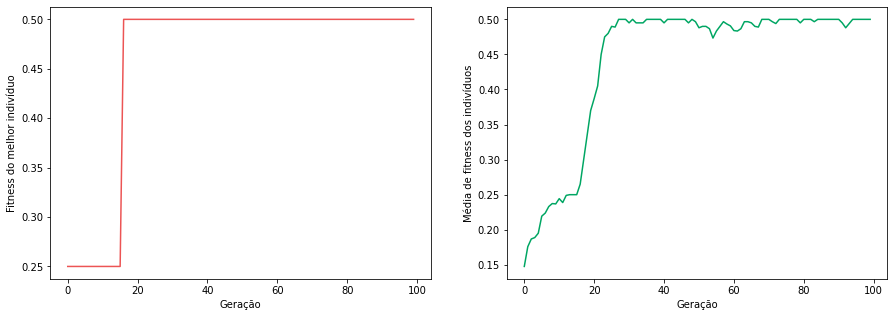

Melhor indivíduo da geração 100:  [4, 6, 3, 0, 7, 5, 2, 2]
Fitness desse indivíduo:   0.5


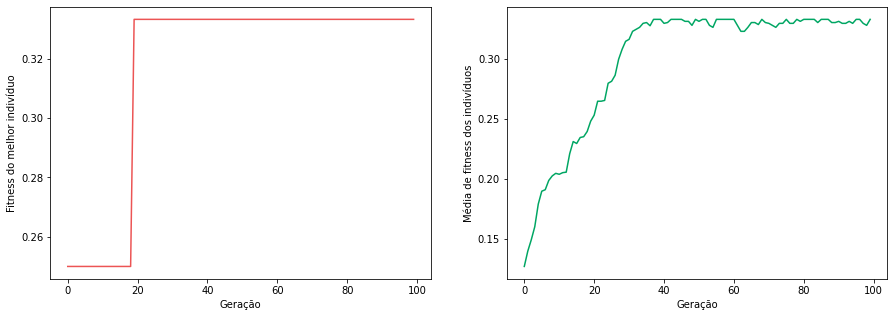

Melhor indivíduo da geração 100:  [2, 4, 1, 7, 5, 0, 6, 0]
Fitness desse indivíduo:   0.3333333333333333
-------------------------------------------------------------------------------------
-- Sem elitismo --


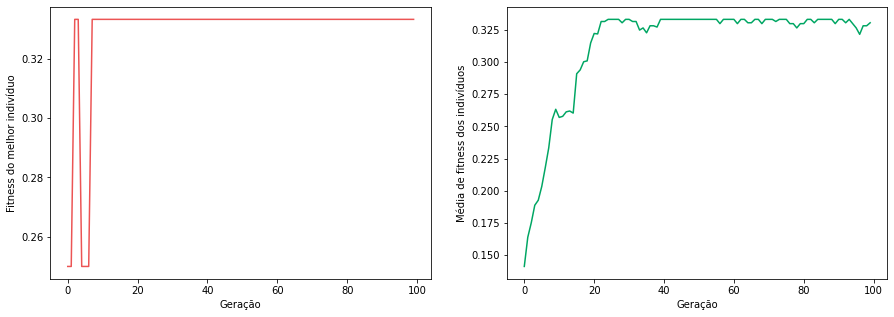

Melhor indivíduo da geração 100:  [3, 6, 0, 5, 2, 1, 7, 4]
Fitness desse indivíduo:   0.3333333333333333


In [ ]:
tamanhoIndividuo = 8
numeroRepeticoes = 10
tamanhoPopulacao = 50
numeroGeracoes = 100
probCrossover = 0.7
probMutacao = 0.04 # antigo valor era 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

numeroRepeticoes = 1
elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

##### **f.** 2) Problema das 16 rainhas:

- Definição de conjunto de valores inicial:

-- Com elitismo --


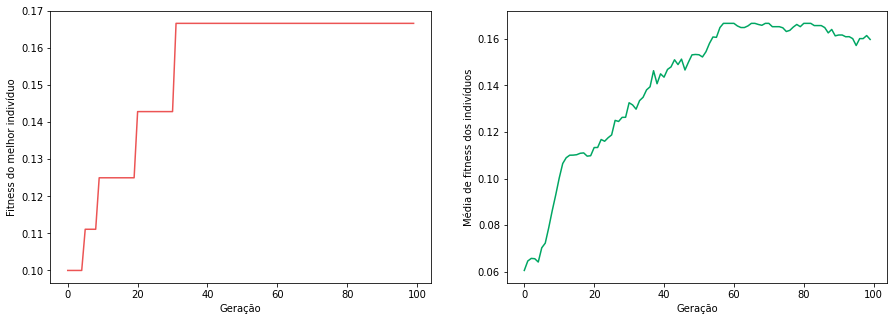

Melhor indivíduo da geração 100:  [1, 3, 6, 9, 2, 14, 13, 10, 15, 4, 0, 7, 12, 13, 11, 1]
Fitness desse indivíduo:   0.16666666666666666


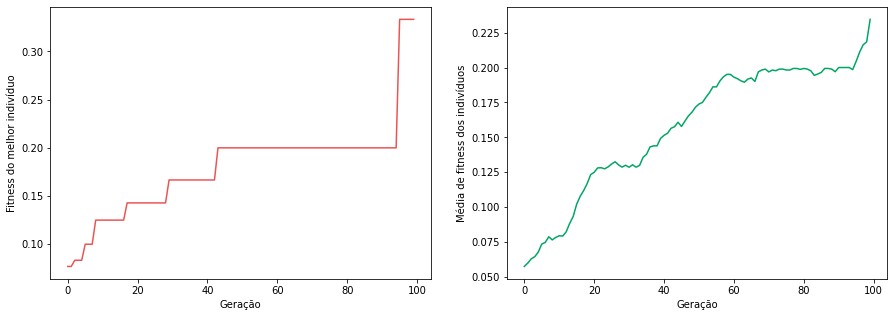

Melhor indivíduo da geração 100:  [11, 13, 10, 2, 0, 12, 15, 8, 1, 14, 12, 5, 7, 11, 6, 3]
Fitness desse indivíduo:   0.3333333333333333


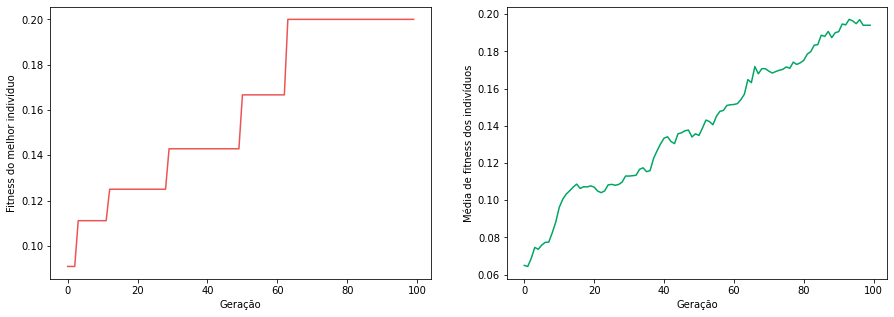

Melhor indivíduo da geração 100:  [9, 12, 3, 8, 11, 13, 2, 5, 12, 15, 0, 6, 15, 13, 1, 14]
Fitness desse indivíduo:   0.2


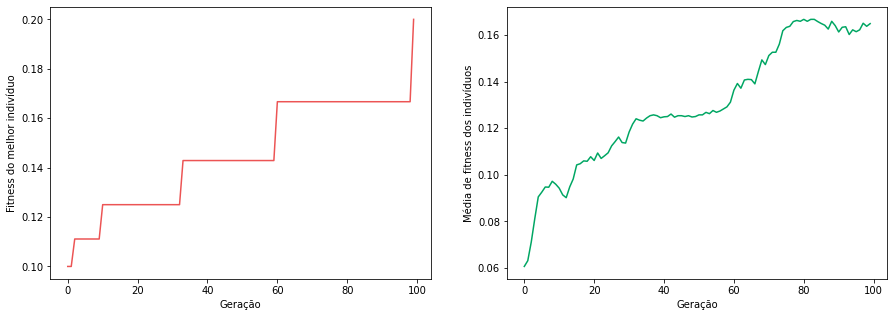

Melhor indivíduo da geração 100:  [5, 10, 15, 10, 12, 3, 9, 13, 4, 1, 14, 11, 6, 8, 13, 14]
Fitness desse indivíduo:   0.2


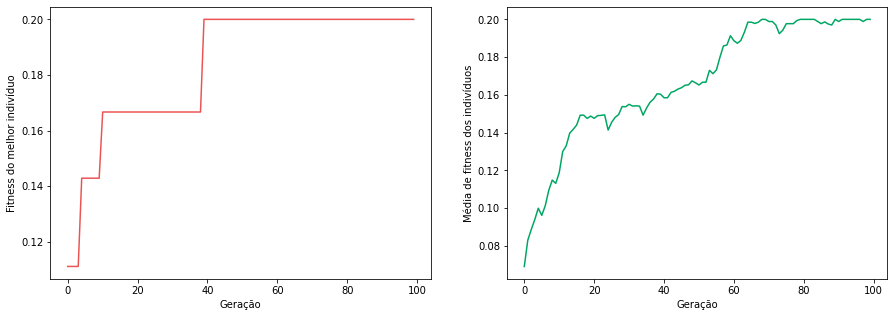

Melhor indivíduo da geração 100:  [1, 8, 6, 11, 0, 7, 4, 10, 5, 15, 9, 0, 12, 3, 6, 3]
Fitness desse indivíduo:   0.2


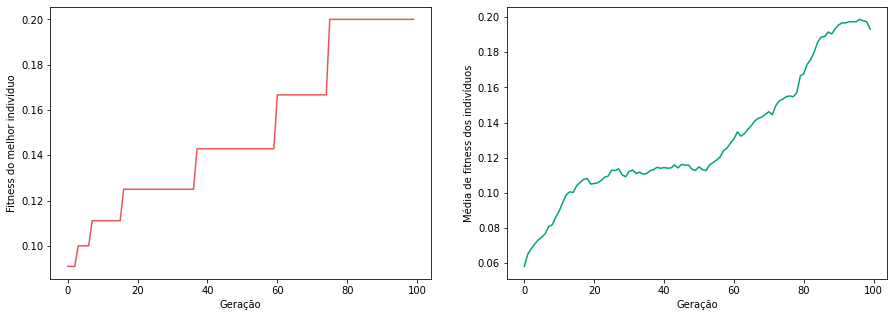

Melhor indivíduo da geração 100:  [6, 14, 1, 8, 12, 12, 7, 11, 2, 5, 2, 13, 9, 15, 0, 4]
Fitness desse indivíduo:   0.2


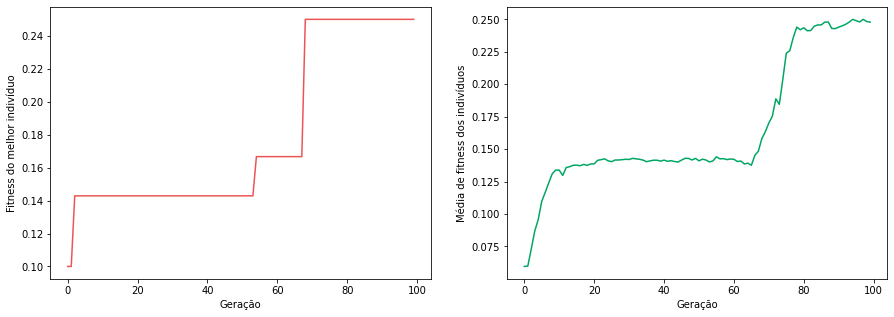

Melhor indivíduo da geração 100:  [5, 12, 10, 13, 2, 4, 1, 13, 15, 6, 11, 0, 14, 1, 8, 7]
Fitness desse indivíduo:   0.25


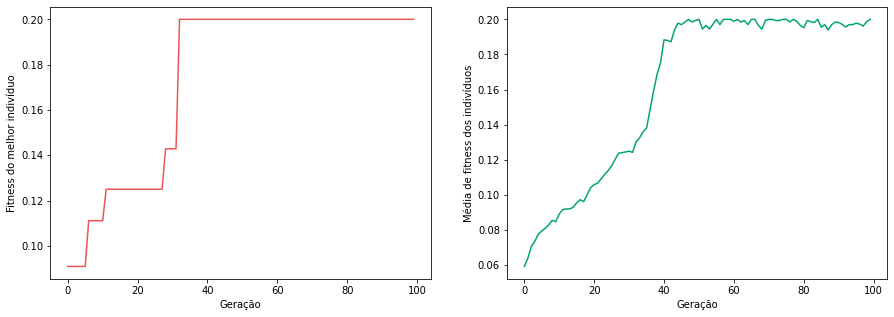

Melhor indivíduo da geração 100:  [5, 9, 11, 14, 8, 15, 2, 4, 7, 9, 13, 12, 3, 1, 12, 10]
Fitness desse indivíduo:   0.2


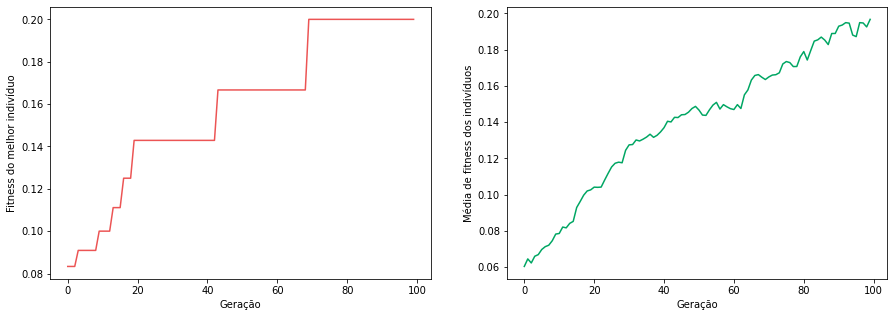

Melhor indivíduo da geração 100:  [12, 14, 3, 6, 10, 7, 5, 4, 13, 15, 0, 9, 1, 5, 2, 8]
Fitness desse indivíduo:   0.2


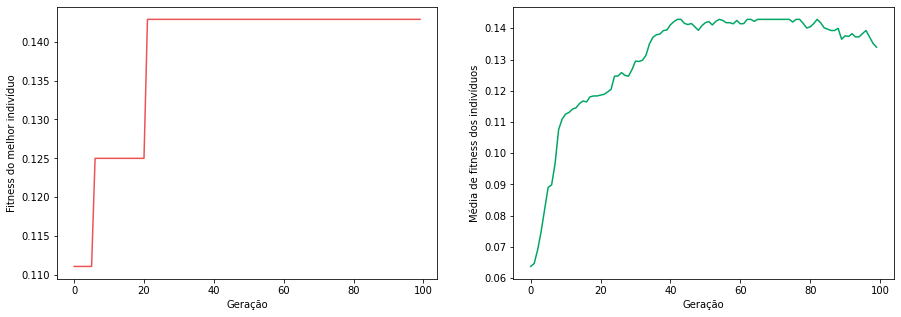

Melhor indivíduo da geração 100:  [11, 0, 6, 1, 14, 12, 9, 9, 2, 5, 11, 14, 8, 10, 13, 15]
Fitness desse indivíduo:   0.14285714285714285
-------------------------------------------------------------------------------------
-- Sem elitismo --


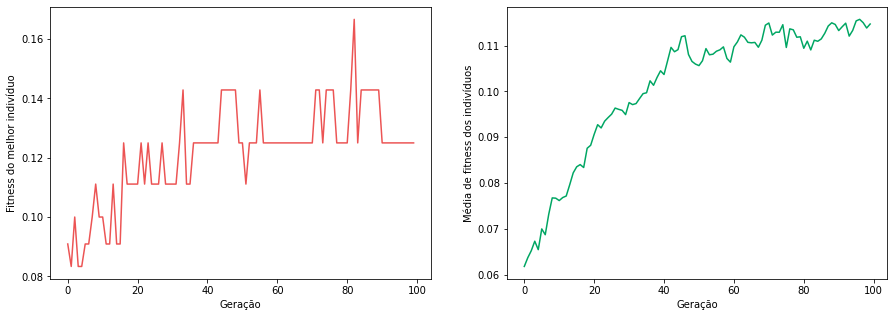

Melhor indivíduo da geração 100:  [8, 11, 14, 12, 3, 0, 7, 3, 6, 9, 15, 13, 7, 0, 15, 5]
Fitness desse indivíduo:   0.125


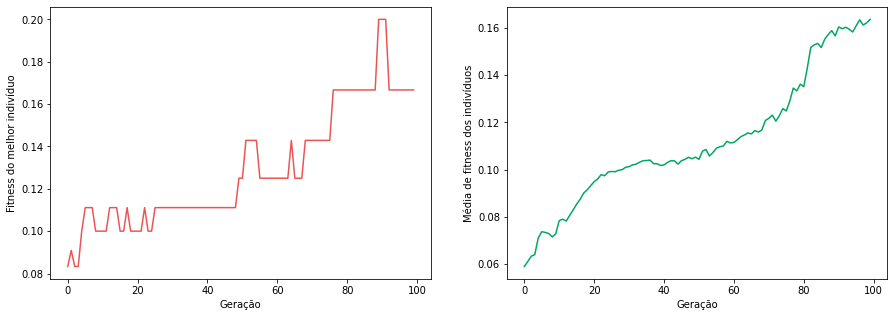

Melhor indivíduo da geração 100:  [14, 9, 5, 0, 13, 6, 10, 3, 0, 3, 12, 15, 7, 11, 4, 15]
Fitness desse indivíduo:   0.16666666666666666


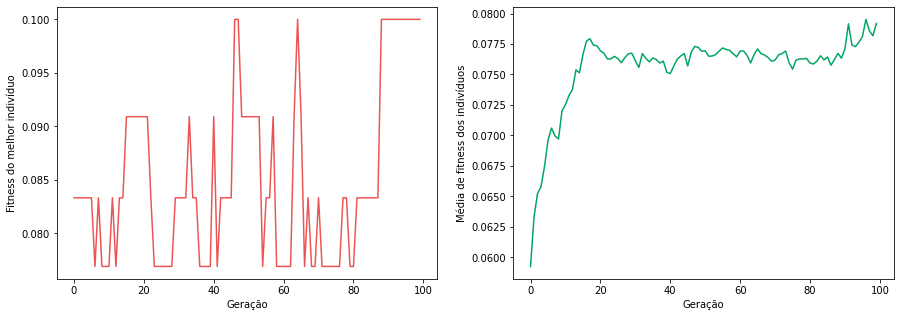

Melhor indivíduo da geração 100:  [8, 1, 9, 2, 10, 8, 15, 6, 4, 14, 1, 5, 13, 5, 12, 14]
Fitness desse indivíduo:   0.1


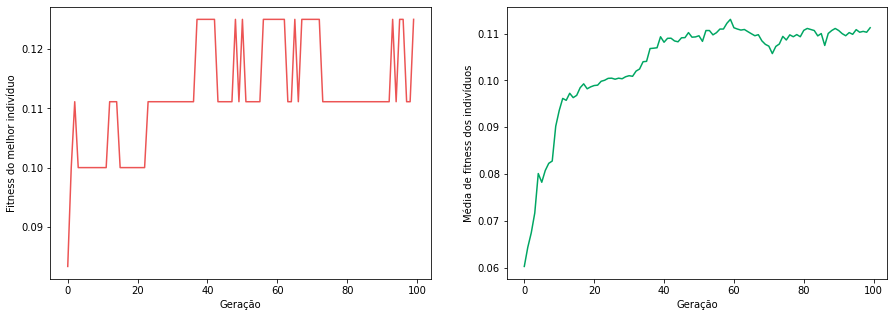

Melhor indivíduo da geração 100:  [6, 9, 13, 15, 5, 2, 11, 4, 0, 13, 3, 14, 2, 11, 6, 15]
Fitness desse indivíduo:   0.125


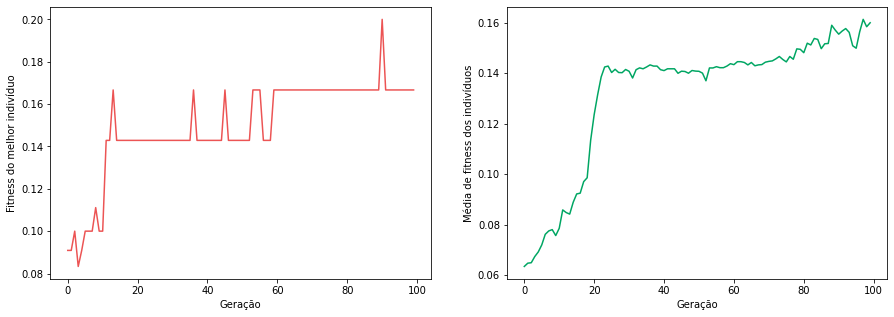

Melhor indivíduo da geração 100:  [1, 9, 0, 8, 15, 0, 12, 0, 5, 13, 13, 3, 14, 12, 10, 6]
Fitness desse indivíduo:   0.16666666666666666


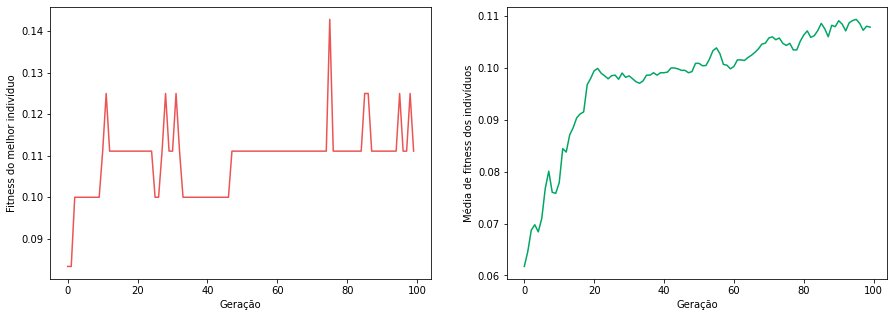

Melhor indivíduo da geração 100:  [9, 2, 4, 5, 1, 13, 11, 6, 14, 15, 6, 0, 10, 1, 5, 9]
Fitness desse indivíduo:   0.1111111111111111


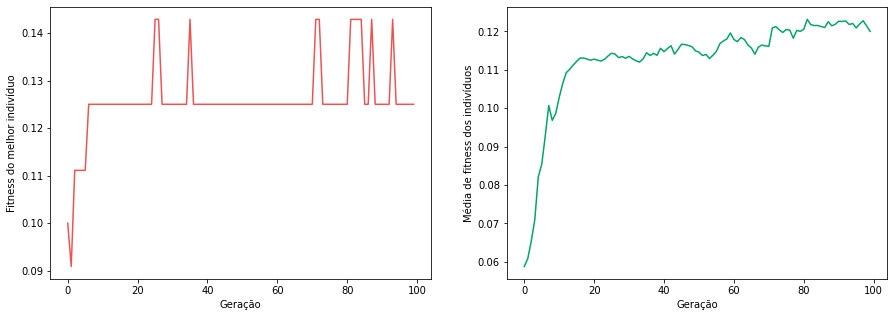

Melhor indivíduo da geração 100:  [15, 10, 14, 11, 6, 12, 3, 0, 0, 4, 13, 9, 2, 6, 12, 14]
Fitness desse indivíduo:   0.125


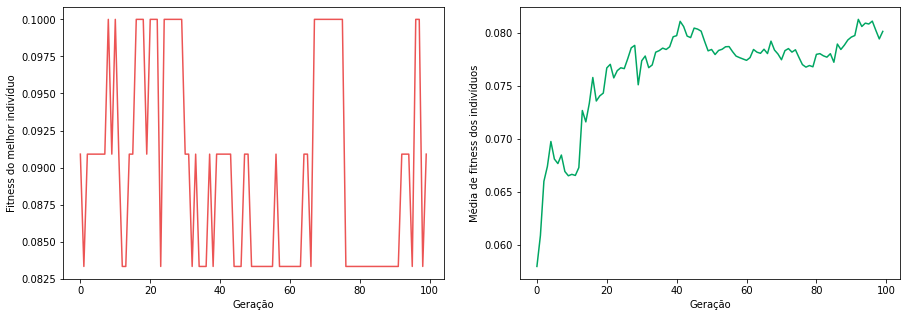

Melhor indivíduo da geração 100:  [8, 4, 13, 15, 6, 1, 3, 14, 7, 10, 0, 15, 4, 4, 14, 15]
Fitness desse indivíduo:   0.09090909090909091


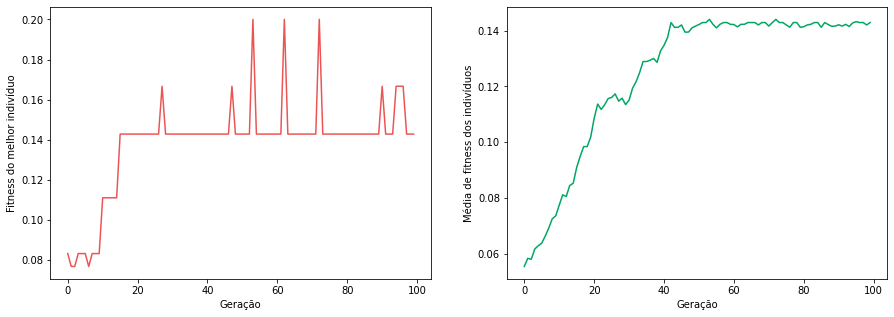

Melhor indivíduo da geração 100:  [6, 12, 5, 3, 1, 10, 15, 12, 1, 7, 4, 13, 0, 14, 2, 11]
Fitness desse indivíduo:   0.14285714285714285


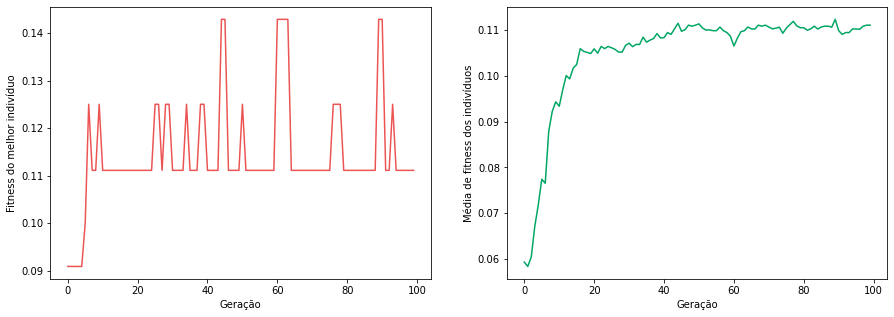

Melhor indivíduo da geração 100:  [8, 14, 11, 10, 1, 4, 0, 0, 12, 9, 13, 15, 11, 14, 2, 4]
Fitness desse indivíduo:   0.1111111111111111


In [ ]:
tamanhoIndividuo = 16
numeroRepeticoes = 10
tamanhoPopulacao = 50
numeroGeracoes = 100
probCrossover = 0.7
probMutacao = 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

- Mudando o valor do tamanho da população

-- Com elitismo --


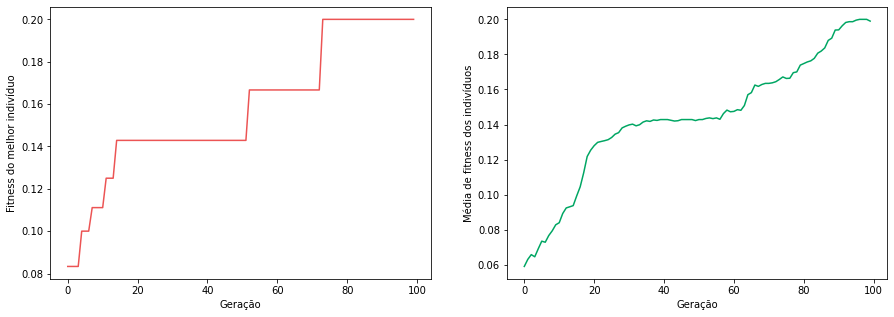

Melhor indivíduo da geração 100:  [12, 3, 6, 2, 15, 11, 9, 0, 5, 1, 6, 9, 13, 4, 14, 10]
Fitness desse indivíduo:   0.2


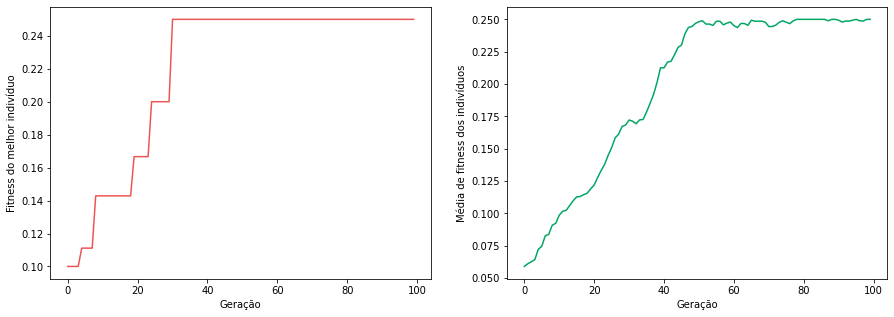

Melhor indivíduo da geração 100:  [12, 4, 2, 11, 9, 14, 5, 3, 15, 13, 8, 5, 9, 4, 6, 0]
Fitness desse indivíduo:   0.25


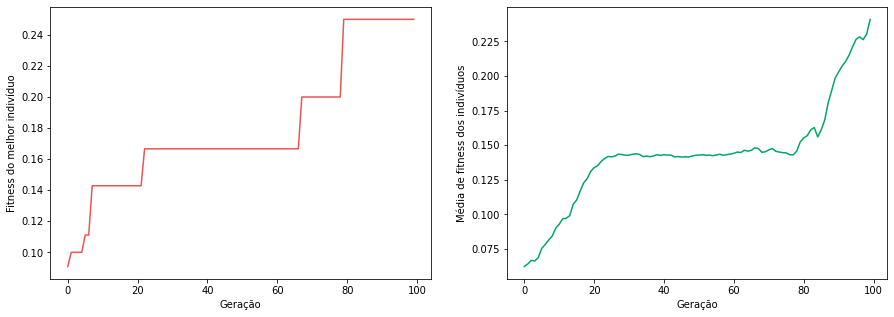

Melhor indivíduo da geração 100:  [3, 10, 15, 13, 0, 2, 7, 11, 2, 14, 5, 1, 14, 12, 8, 4]
Fitness desse indivíduo:   0.25


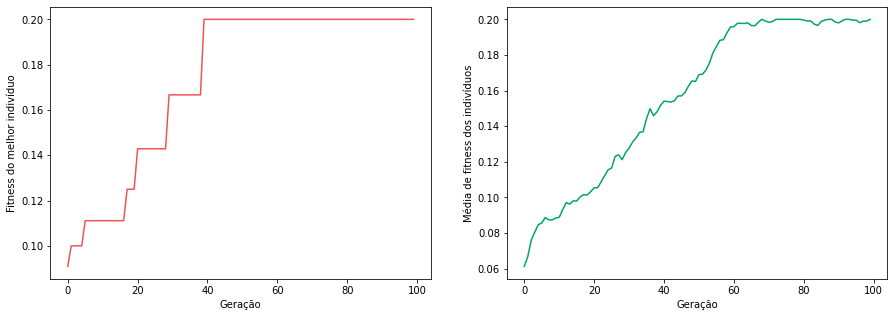

Melhor indivíduo da geração 100:  [3, 13, 8, 2, 9, 1, 13, 15, 0, 4, 10, 5, 14, 11, 12, 6]
Fitness desse indivíduo:   0.2


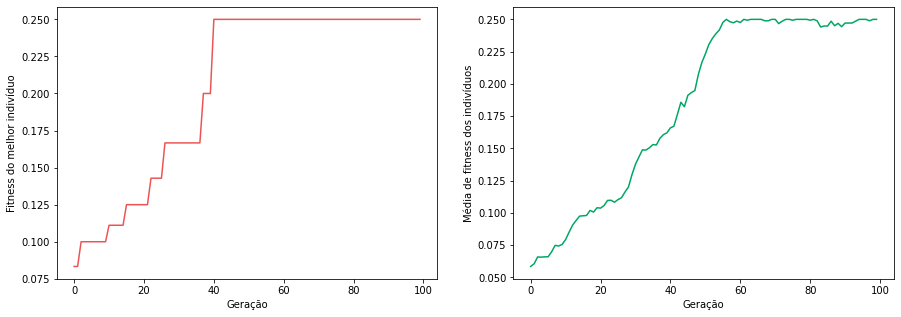

Melhor indivíduo da geração 100:  [0, 7, 11, 15, 5, 1, 13, 4, 6, 3, 1, 10, 14, 3, 9, 2]
Fitness desse indivíduo:   0.25


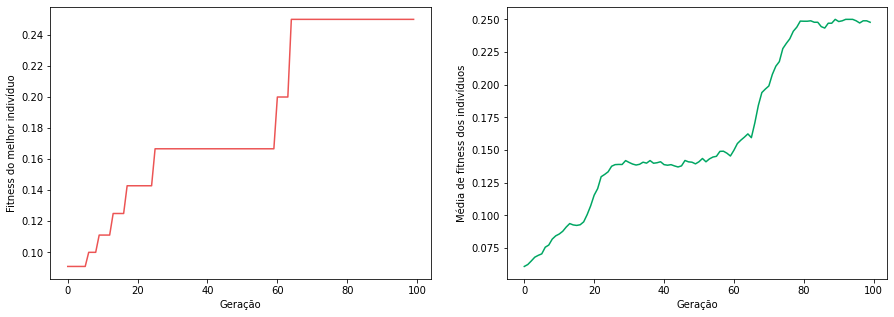

Melhor indivíduo da geração 100:  [10, 1, 5, 15, 13, 6, 0, 14, 12, 4, 5, 8, 11, 3, 12, 7]
Fitness desse indivíduo:   0.25


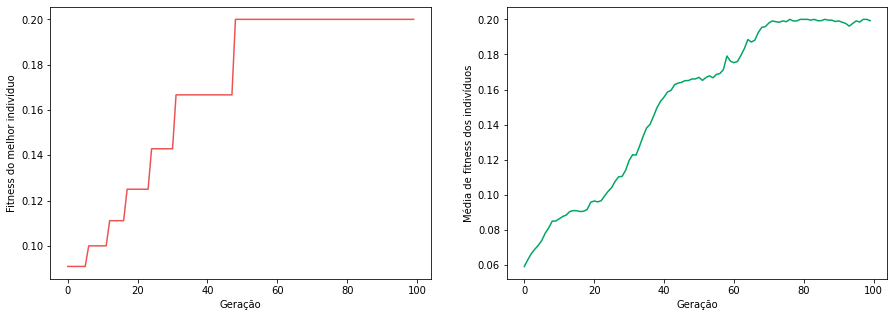

Melhor indivíduo da geração 100:  [7, 4, 13, 5, 2, 1, 15, 11, 8, 15, 0, 14, 0, 6, 9, 12]
Fitness desse indivíduo:   0.2


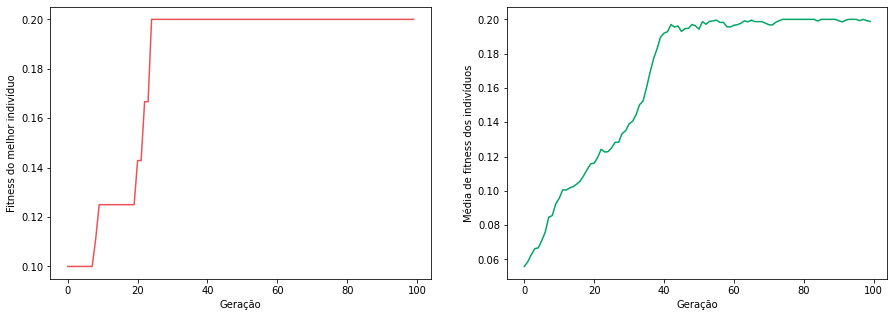

Melhor indivíduo da geração 100:  [4, 6, 2, 14, 11, 13, 8, 1, 5, 15, 9, 0, 15, 3, 15, 10]
Fitness desse indivíduo:   0.2


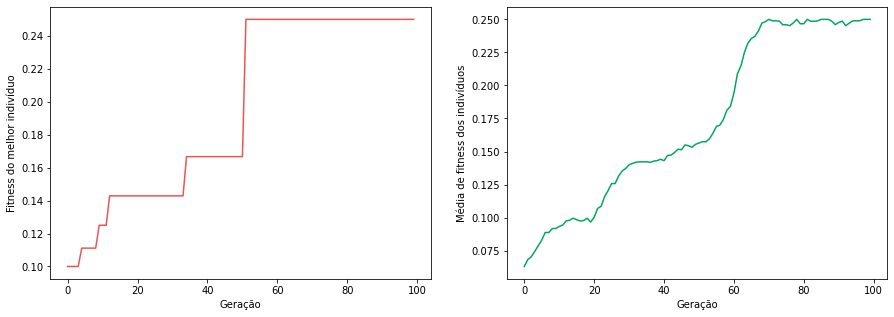

Melhor indivíduo da geração 100:  [7, 15, 8, 8, 4, 0, 15, 11, 9, 6, 2, 14, 1, 9, 12, 5]
Fitness desse indivíduo:   0.25


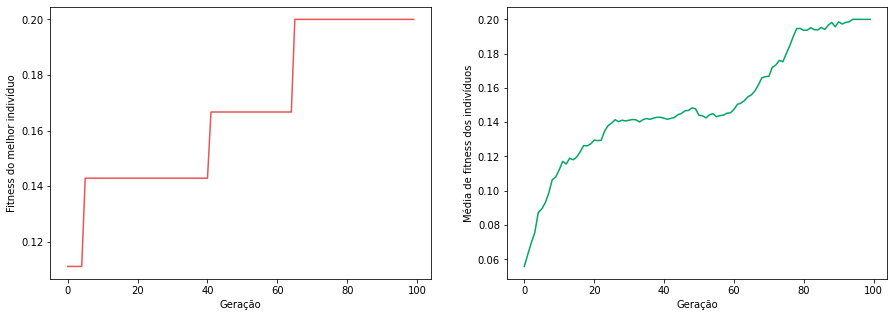

Melhor indivíduo da geração 100:  [9, 11, 3, 7, 12, 2, 13, 15, 0, 15, 4, 6, 8, 1, 14, 6]
Fitness desse indivíduo:   0.2
-------------------------------------------------------------------------------------
-- Sem elitismo --


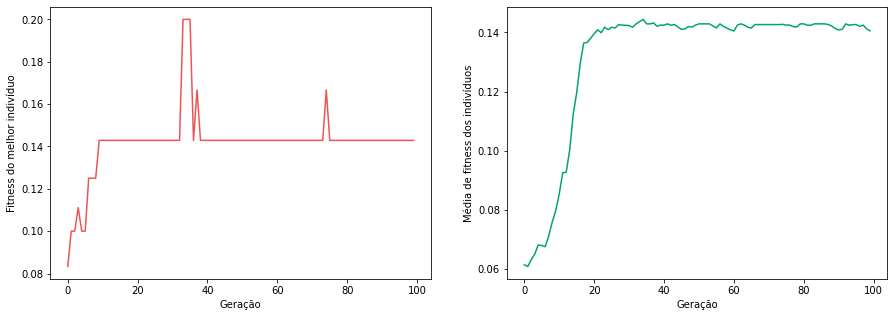

Melhor indivíduo da geração 100:  [4, 15, 14, 2, 7, 10, 12, 5, 13, 1, 3, 8, 2, 14, 9, 4]
Fitness desse indivíduo:   0.14285714285714285


In [ ]:
tamanhoIndividuo = 16
numeroRepeticoes = 10
tamanhoPopulacao = 75 # antigo valor era 50
numeroGeracoes = 100
probCrossover = 0.7
probMutacao = 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

numeroRepeticoes = 1
elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

- Mudando o valor do número de gerações

-- Com elitismo --


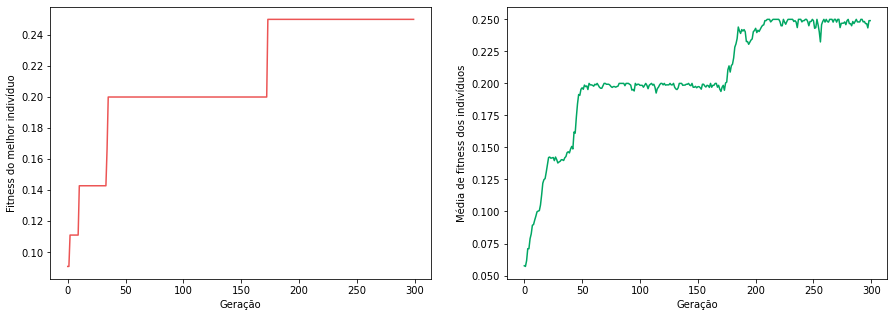

Melhor indivíduo da geração 300:  [2, 0, 10, 6, 13, 9, 4, 8, 14, 14, 1, 7, 5, 3, 6, 12]
Fitness desse indivíduo:   0.25


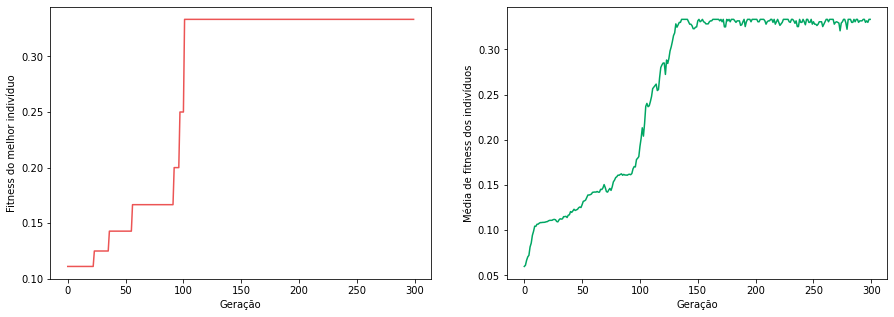

Melhor indivíduo da geração 300:  [4, 12, 3, 0, 2, 7, 14, 9, 1, 15, 13, 11, 6, 8, 5, 10]
Fitness desse indivíduo:   0.3333333333333333


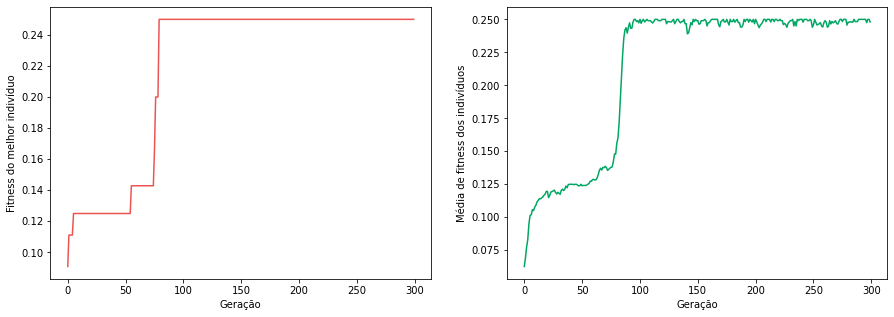

Melhor indivíduo da geração 300:  [7, 3, 11, 9, 14, 4, 1, 12, 12, 6, 13, 0, 2, 4, 8, 15]
Fitness desse indivíduo:   0.25


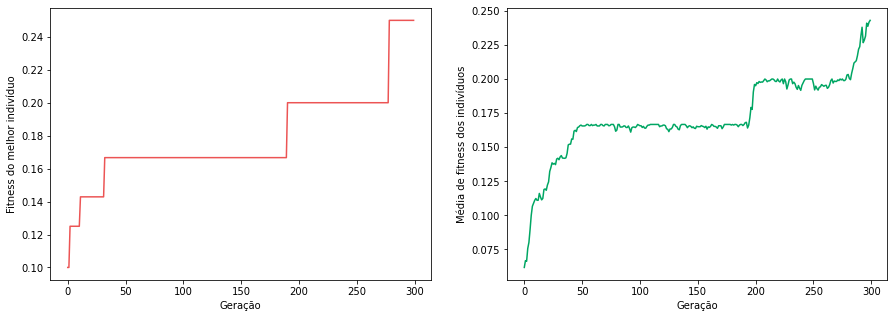

Melhor indivíduo da geração 300:  [9, 7, 15, 2, 12, 1, 11, 5, 3, 10, 14, 4, 14, 5, 0, 6]
Fitness desse indivíduo:   0.25


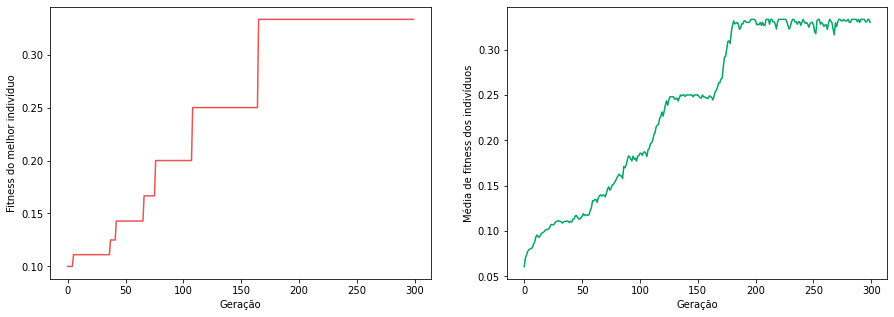

Melhor indivíduo da geração 300:  [10, 6, 4, 11, 7, 14, 12, 1, 15, 0, 14, 9, 5, 2, 13, 3]
Fitness desse indivíduo:   0.3333333333333333


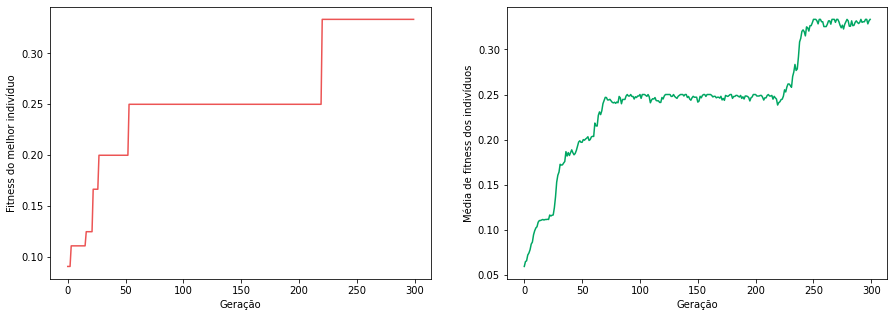

Melhor indivíduo da geração 300:  [15, 9, 7, 3, 8, 12, 2, 13, 5, 10, 12, 14, 6, 11, 7, 1]
Fitness desse indivíduo:   0.3333333333333333


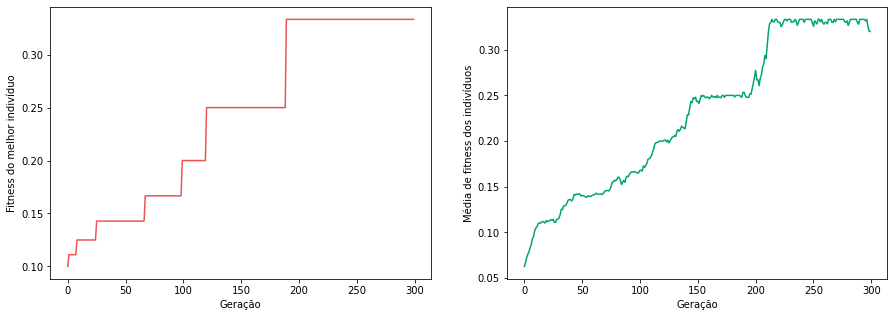

Melhor indivíduo da geração 300:  [5, 13, 2, 10, 12, 15, 0, 0, 3, 8, 14, 1, 3, 9, 11, 4]
Fitness desse indivíduo:   0.3333333333333333


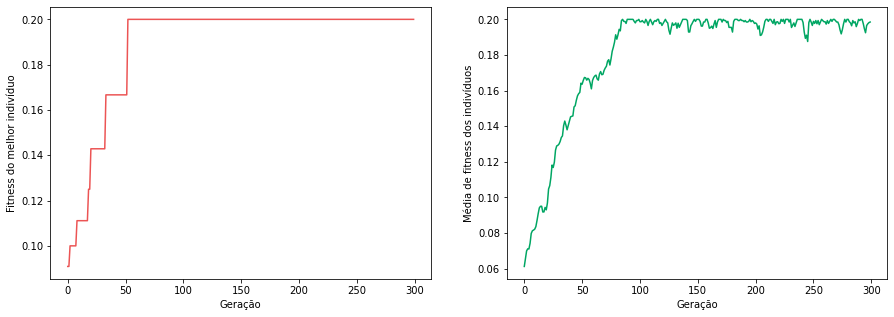

Melhor indivíduo da geração 300:  [14, 8, 11, 0, 3, 15, 0, 12, 9, 5, 1, 13, 4, 6, 1, 10]
Fitness desse indivíduo:   0.2


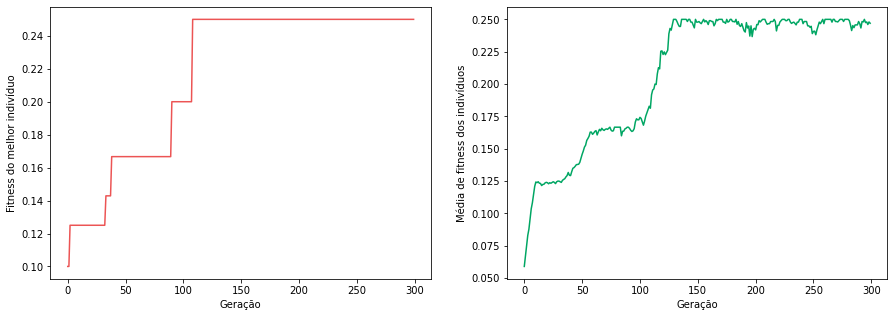

Melhor indivíduo da geração 300:  [11, 8, 5, 0, 2, 0, 7, 12, 14, 14, 10, 1, 4, 15, 13, 3]
Fitness desse indivíduo:   0.25


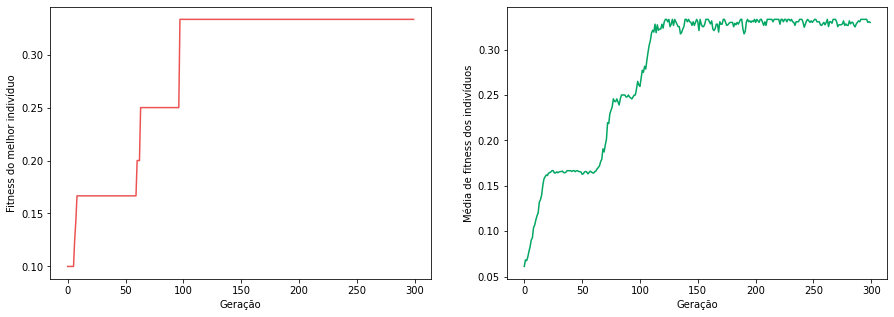

Melhor indivíduo da geração 300:  [2, 4, 2, 14, 12, 10, 5, 11, 0, 15, 0, 9, 7, 1, 8, 6]
Fitness desse indivíduo:   0.3333333333333333
-------------------------------------------------------------------------------------
-- Sem elitismo --


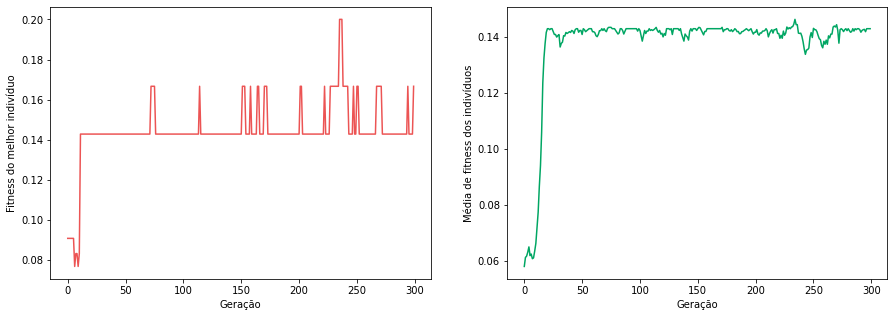

Melhor indivíduo da geração 300:  [4, 12, 9, 13, 8, 14, 7, 0, 2, 1, 15, 10, 12, 1, 3, 5]
Fitness desse indivíduo:   0.16666666666666666


In [ ]:
tamanhoIndividuo = 16
numeroRepeticoes = 10
tamanhoPopulacao = 50
numeroGeracoes = 300 # antigo valor era 100
probCrossover = 0.7
probMutacao = 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

numeroRepeticoes = 1
elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

- Mudando o valor da probabilidade de crossover

-- Com elitismo --


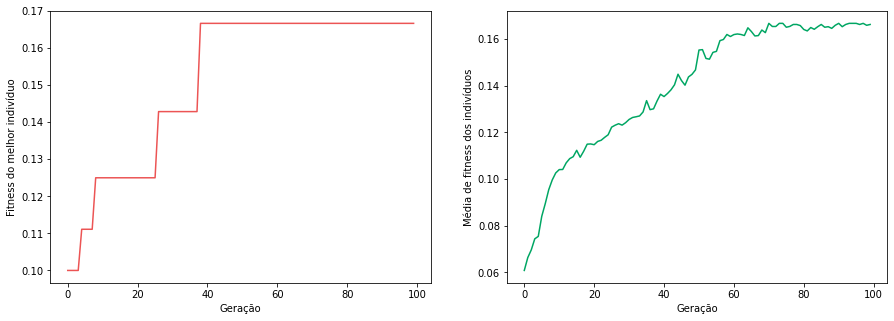

Melhor indivíduo da geração 100:  [9, 6, 0, 11, 1, 8, 10, 3, 7, 14, 2, 13, 2, 13, 15, 12]
Fitness desse indivíduo:   0.16666666666666666


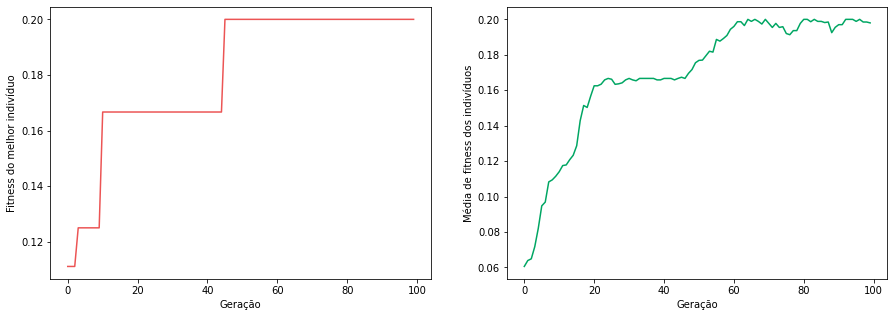

Melhor indivíduo da geração 100:  [4, 11, 9, 15, 12, 5, 13, 8, 0, 14, 3, 1, 10, 12, 10, 2]
Fitness desse indivíduo:   0.2


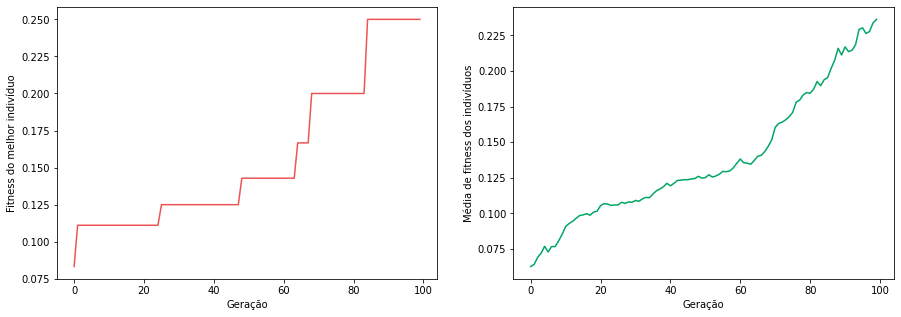

Melhor indivíduo da geração 100:  [5, 10, 4, 12, 0, 8, 3, 0, 6, 15, 11, 1, 4, 7, 14, 2]
Fitness desse indivíduo:   0.25


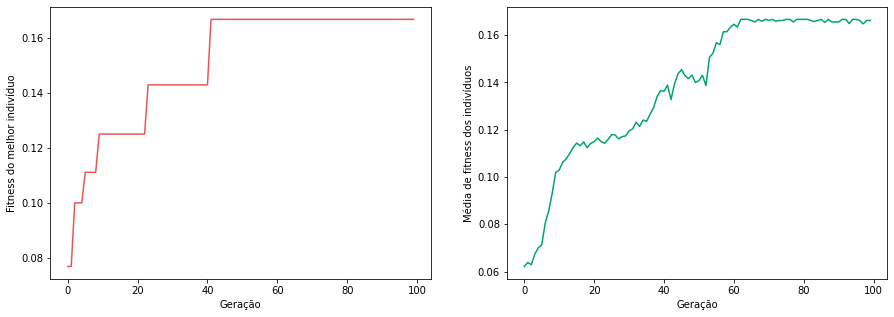

Melhor indivíduo da geração 100:  [6, 4, 0, 9, 4, 13, 8, 3, 1, 11, 7, 5, 11, 14, 15, 10]
Fitness desse indivíduo:   0.16666666666666666


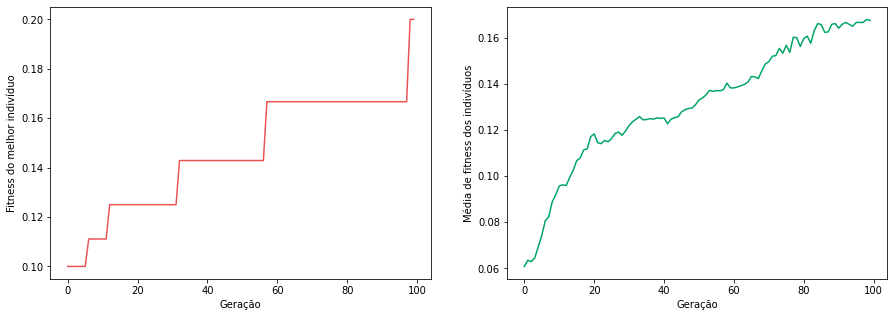

Melhor indivíduo da geração 100:  [1, 3, 11, 14, 8, 2, 5, 1, 7, 10, 6, 9, 15, 13, 0, 6]
Fitness desse indivíduo:   0.2


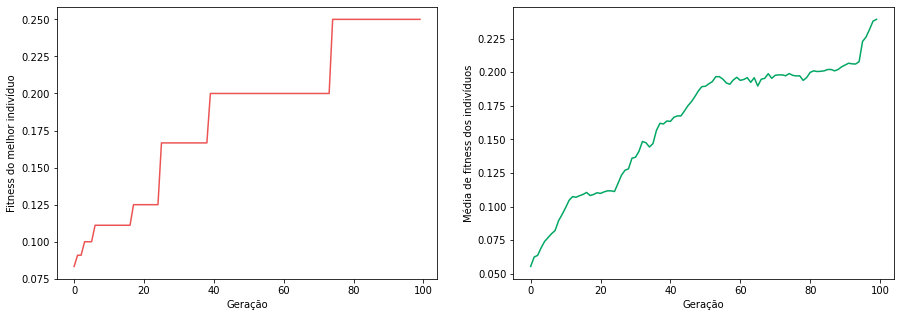

Melhor indivíduo da geração 100:  [13, 5, 10, 7, 14, 2, 2, 8, 3, 0, 12, 9, 15, 1, 6, 4]
Fitness desse indivíduo:   0.25


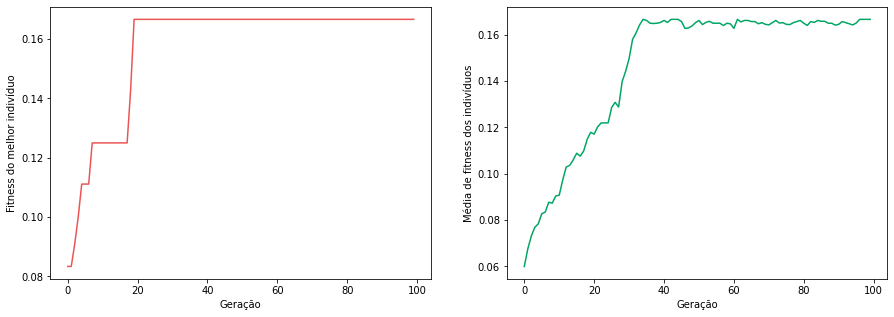

Melhor indivíduo da geração 100:  [1, 10, 5, 14, 2, 7, 10, 4, 13, 9, 0, 3, 12, 6, 1, 8]
Fitness desse indivíduo:   0.16666666666666666


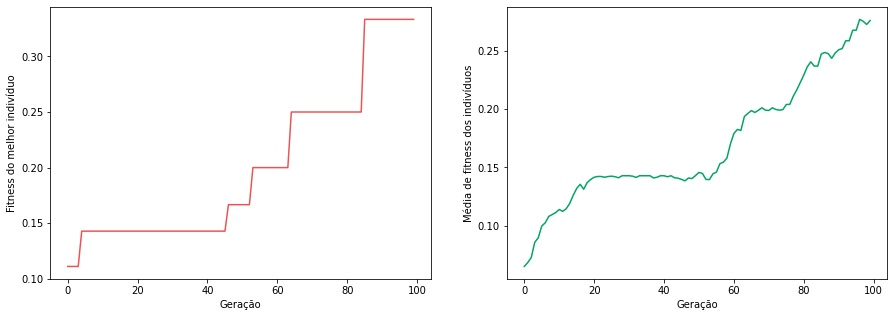

Melhor indivíduo da geração 100:  [11, 9, 0, 6, 10, 2, 12, 1, 8, 4, 15, 13, 11, 14, 3, 5]
Fitness desse indivíduo:   0.3333333333333333


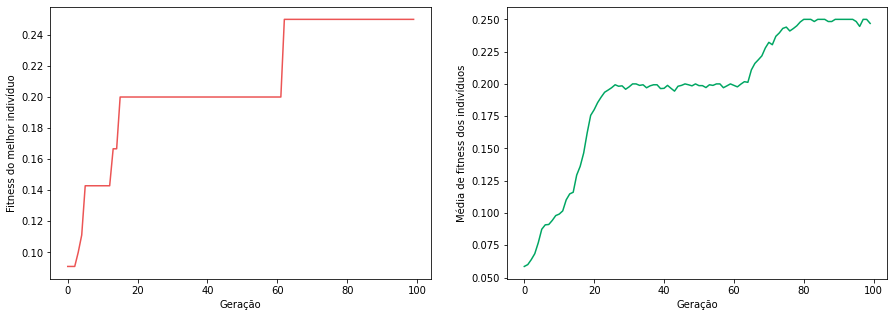

Melhor indivíduo da geração 100:  [4, 6, 12, 0, 5, 8, 15, 3, 10, 14, 10, 4, 7, 11, 13, 1]
Fitness desse indivíduo:   0.25


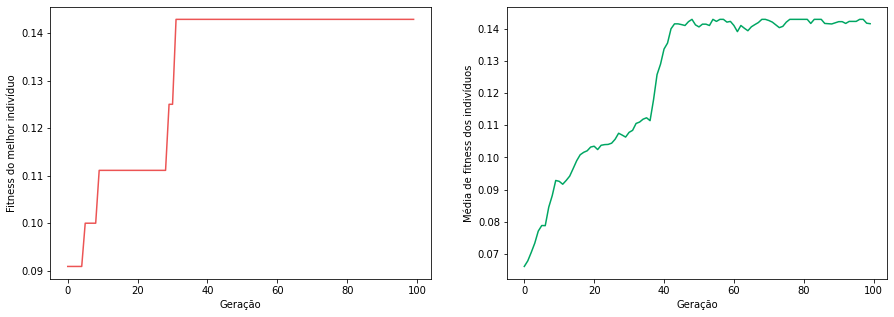

Melhor indivíduo da geração 100:  [13, 0, 10, 15, 5, 9, 6, 1, 11, 7, 1, 14, 8, 8, 7, 2]
Fitness desse indivíduo:   0.14285714285714285
-------------------------------------------------------------------------------------
-- Sem elitismo --


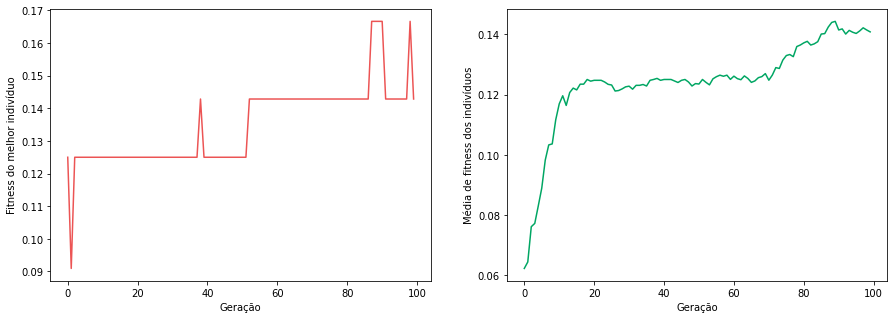

Melhor indivíduo da geração 100:  [6, 2, 14, 12, 15, 9, 1, 14, 2, 12, 10, 0, 5, 15, 4, 8]
Fitness desse indivíduo:   0.14285714285714285


In [ ]:
tamanhoIndividuo = 16
numeroRepeticoes = 10
tamanhoPopulacao = 50
numeroGeracoes = 100
probCrossover = 0.8 # antigo valor era 0.7
probMutacao = 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

numeroRepeticoes = 1
elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

- Mudando o valor da probabilidade de mutação

-- Com elitismo --


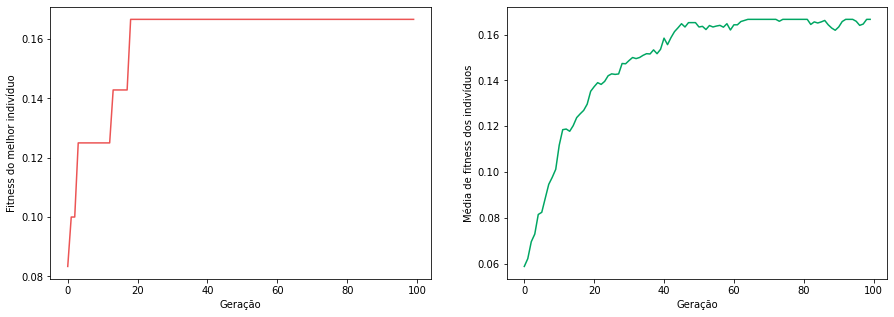

Melhor indivíduo da geração 100:  [15, 10, 0, 7, 14, 2, 0, 6, 3, 11, 4, 1, 5, 9, 15, 6]
Fitness desse indivíduo:   0.16666666666666666


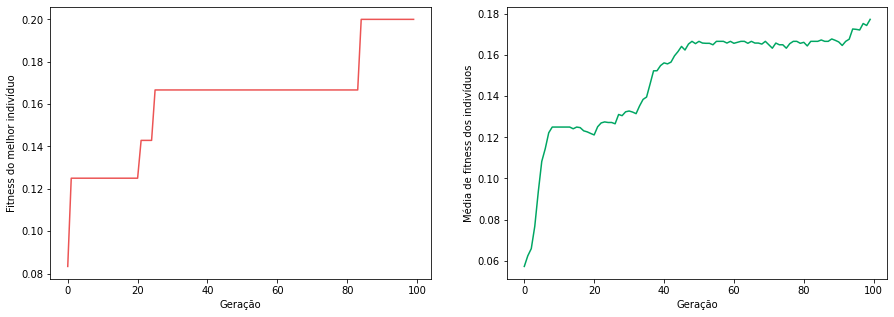

Melhor indivíduo da geração 100:  [3, 13, 9, 8, 15, 4, 2, 0, 14, 1, 10, 12, 14, 11, 7, 5]
Fitness desse indivíduo:   0.2


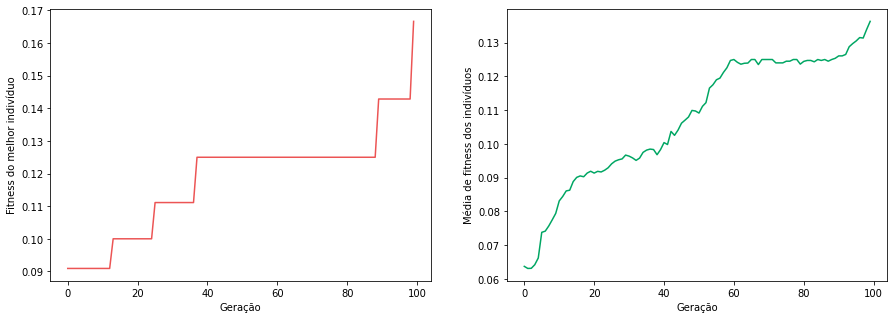

Melhor indivíduo da geração 100:  [6, 13, 13, 7, 14, 2, 3, 5, 11, 1, 11, 0, 12, 4, 15, 8]
Fitness desse indivíduo:   0.16666666666666666


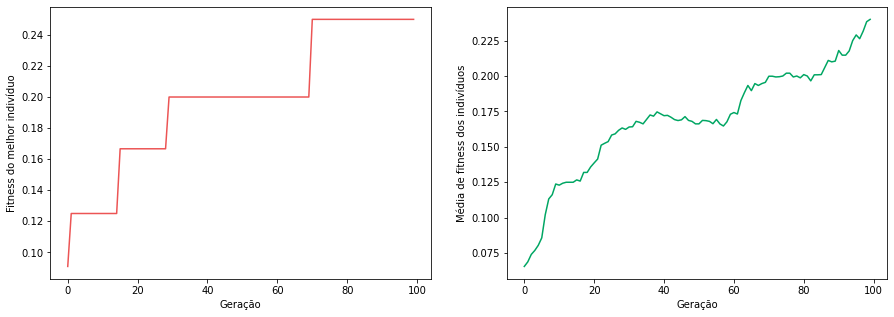

Melhor indivíduo da geração 100:  [2, 9, 1, 15, 11, 3, 0, 0, 4, 12, 14, 11, 7, 10, 6, 2]
Fitness desse indivíduo:   0.25


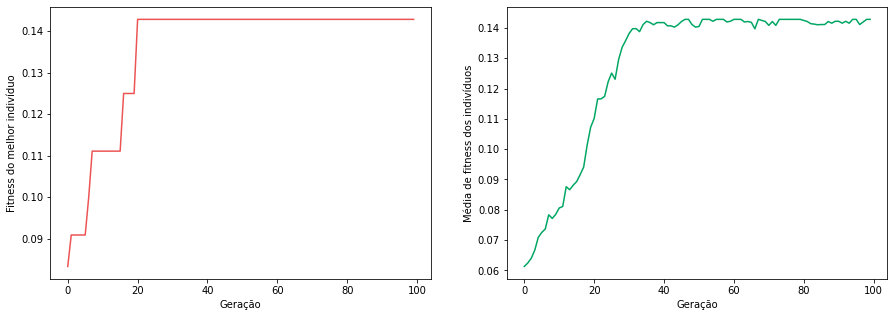

Melhor indivíduo da geração 100:  [3, 5, 9, 5, 0, 11, 6, 12, 0, 13, 4, 14, 1, 11, 15, 8]
Fitness desse indivíduo:   0.14285714285714285


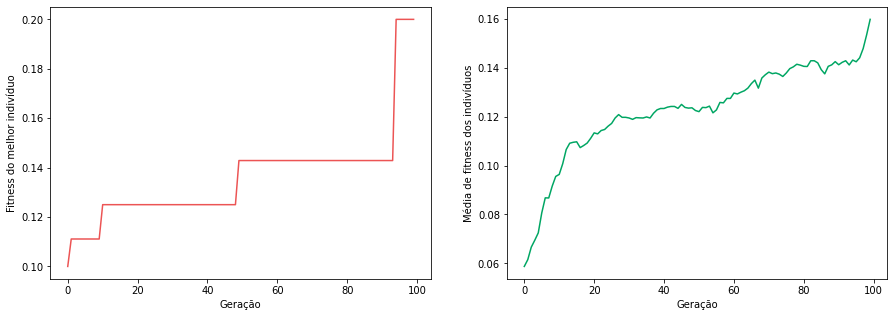

Melhor indivíduo da geração 100:  [10, 1, 13, 9, 3, 13, 2, 12, 14, 4, 7, 12, 5, 15, 0, 6]
Fitness desse indivíduo:   0.2


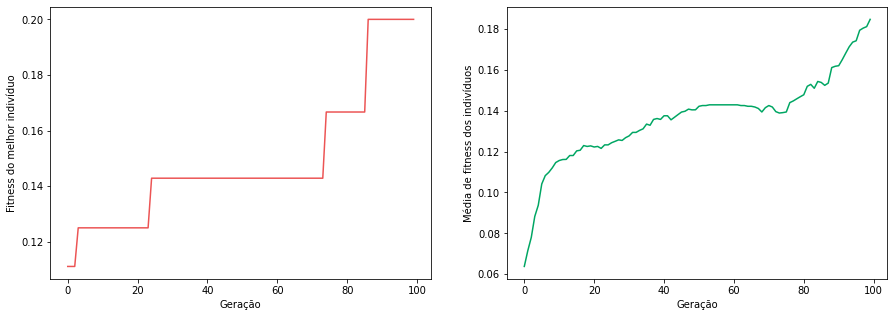

Melhor indivíduo da geração 100:  [5, 13, 6, 9, 14, 7, 15, 2, 3, 1, 4, 12, 8, 11, 14, 0]
Fitness desse indivíduo:   0.2


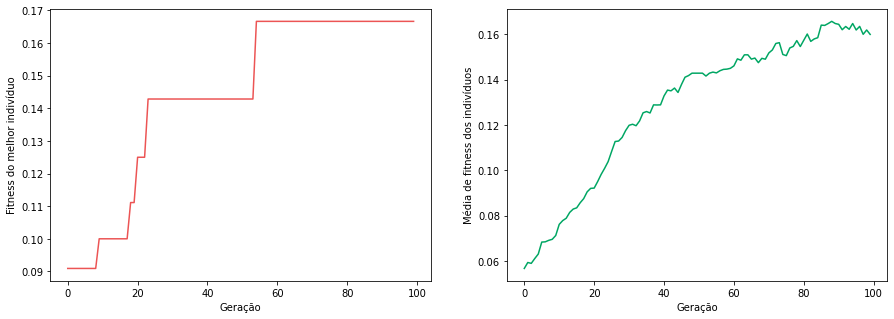

Melhor indivíduo da geração 100:  [14, 7, 2, 12, 3, 0, 3, 15, 2, 11, 1, 15, 5, 14, 4, 6]
Fitness desse indivíduo:   0.16666666666666666


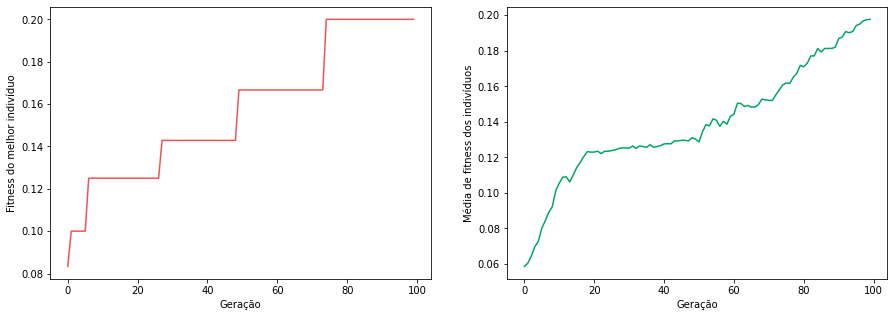

Melhor indivíduo da geração 100:  [9, 14, 8, 15, 12, 15, 1, 5, 11, 3, 7, 13, 13, 0, 4, 6]
Fitness desse indivíduo:   0.2


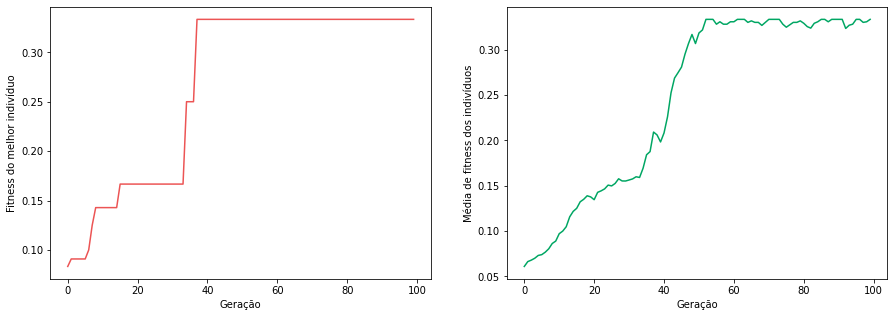

Melhor indivíduo da geração 100:  [5, 15, 10, 14, 0, 3, 13, 6, 1, 9, 4, 13, 8, 2, 11, 7]
Fitness desse indivíduo:   0.3333333333333333
-------------------------------------------------------------------------------------
-- Sem elitismo --


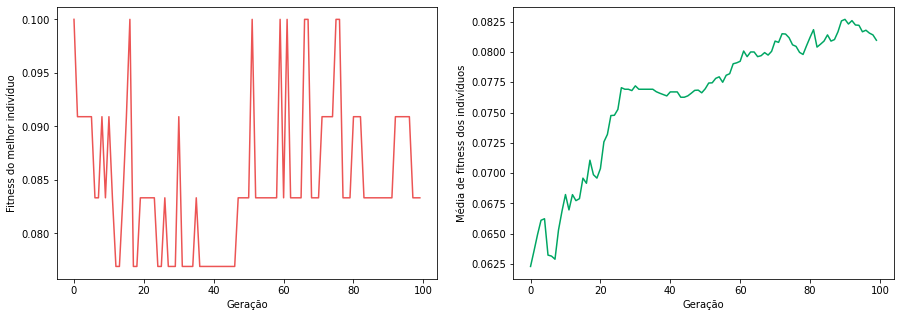

Melhor indivíduo da geração 100:  [4, 8, 13, 3, 7, 12, 14, 15, 3, 9, 6, 12, 7, 15, 10, 1]
Fitness desse indivíduo:   0.08333333333333333


In [ ]:
tamanhoIndividuo = 16
numeroRepeticoes = 10
tamanhoPopulacao = 50
numeroGeracoes = 100
probCrossover = 0.7
probMutacao = 0.04 # antigo valor era 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

numeroRepeticoes = 1
elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

##### **f.** 3) Problema das 32 rainhas:

- Definição de conjunto de valores inicial:

-- Com elitismo --


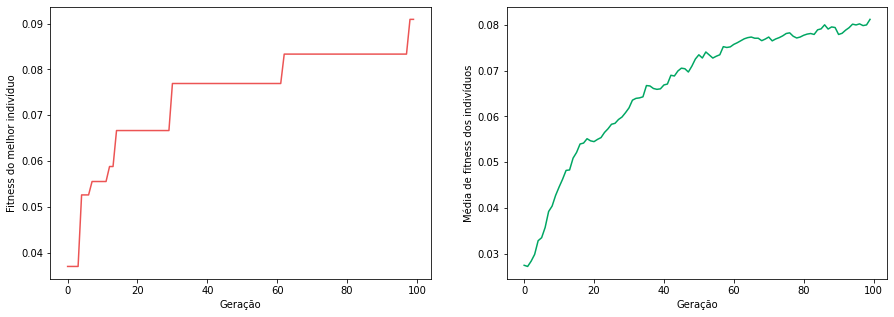

Melhor indivíduo da geração 100:  [10, 26, 0, 2, 5, 7, 31, 23, 17, 27, 10, 6, 3, 9, 8, 31, 22, 25, 0, 24, 1, 11, 30, 12, 16, 29, 29, 20, 13, 14, 4, 19]
Fitness desse indivíduo:   0.09090909090909091


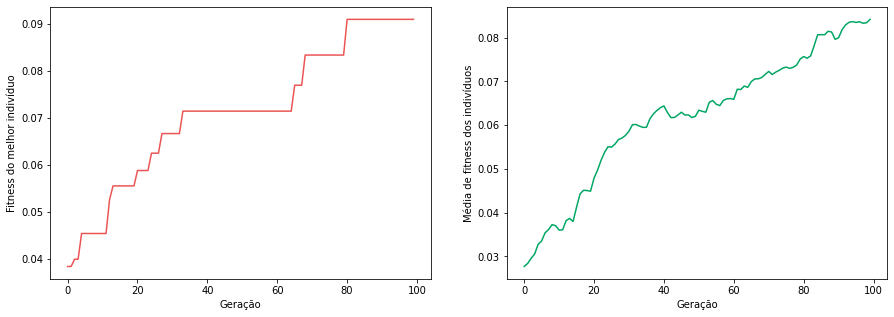

Melhor indivíduo da geração 100:  [6, 15, 29, 23, 28, 12, 1, 4, 20, 31, 17, 22, 3, 21, 4, 9, 29, 5, 22, 11, 3, 8, 25, 24, 13, 18, 0, 26, 30, 9, 16, 27]
Fitness desse indivíduo:   0.09090909090909091


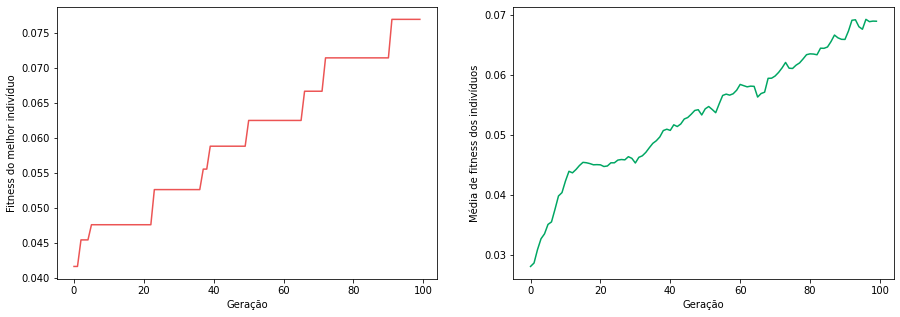

Melhor indivíduo da geração 100:  [10, 22, 9, 14, 27, 13, 26, 2, 17, 7, 29, 30, 15, 0, 6, 17, 3, 23, 18, 11, 4, 7, 12, 28, 20, 4, 19, 8, 9, 5, 21, 19]
Fitness desse indivíduo:   0.07692307692307693


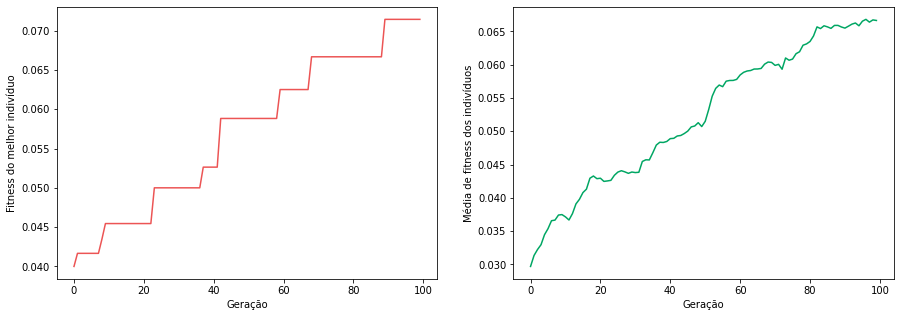

Melhor indivíduo da geração 100:  [12, 19, 16, 20, 28, 2, 21, 1, 8, 31, 26, 6, 3, 20, 10, 23, 25, 26, 31, 15, 6, 1, 27, 27, 11, 2, 18, 29, 7, 30, 12, 14]
Fitness desse indivíduo:   0.07142857142857142


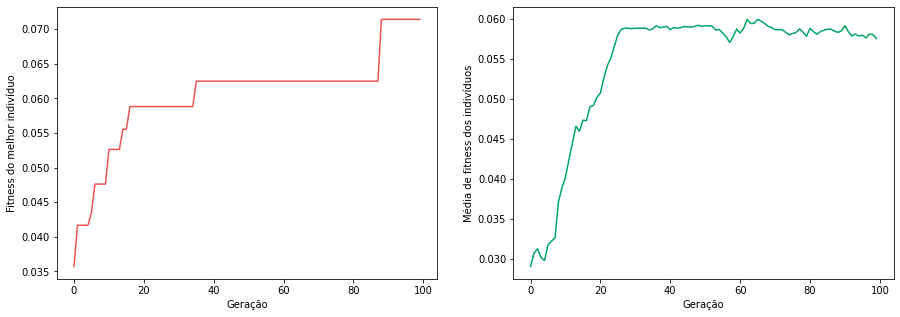

Melhor indivíduo da geração 100:  [13, 25, 24, 1, 6, 23, 9, 17, 0, 30, 27, 7, 2, 18, 31, 4, 7, 10, 30, 14, 9, 1, 3, 9, 11, 8, 8, 23, 28, 26, 29, 16]
Fitness desse indivíduo:   0.07142857142857142


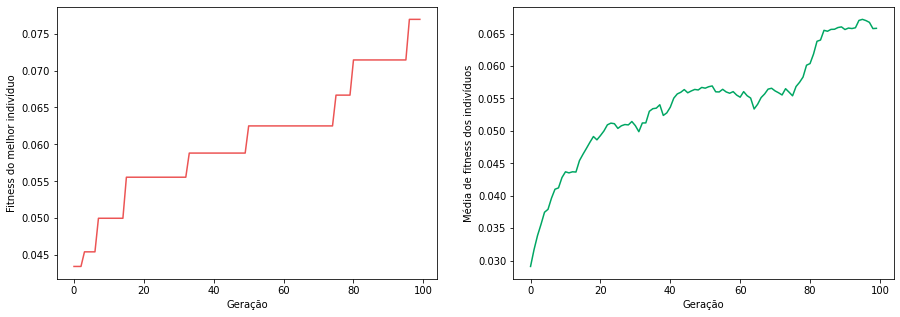

Melhor indivíduo da geração 100:  [0, 8, 11, 16, 23, 13, 30, 30, 3, 21, 31, 20, 0, 10, 24, 17, 6, 22, 14, 18, 31, 12, 26, 5, 3, 1, 19, 27, 15, 4, 25, 25]
Fitness desse indivíduo:   0.07692307692307693


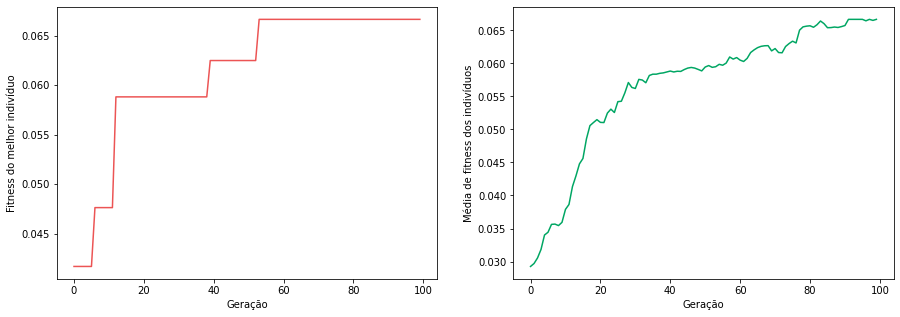

Melhor indivíduo da geração 100:  [10, 12, 22, 15, 8, 21, 3, 29, 30, 16, 13, 9, 17, 29, 9, 11, 24, 26, 19, 2, 7, 20, 27, 5, 11, 6, 30, 3, 22, 18, 14, 2]
Fitness desse indivíduo:   0.06666666666666667


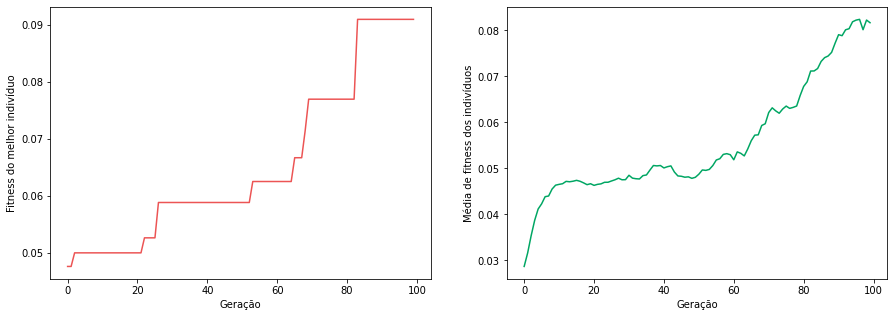

Melhor indivíduo da geração 100:  [23, 13, 28, 2, 28, 16, 10, 21, 3, 29, 31, 4, 1, 18, 21, 5, 25, 9, 11, 15, 26, 6, 20, 27, 24, 0, 28, 30, 8, 7, 25, 14]
Fitness desse indivíduo:   0.09090909090909091


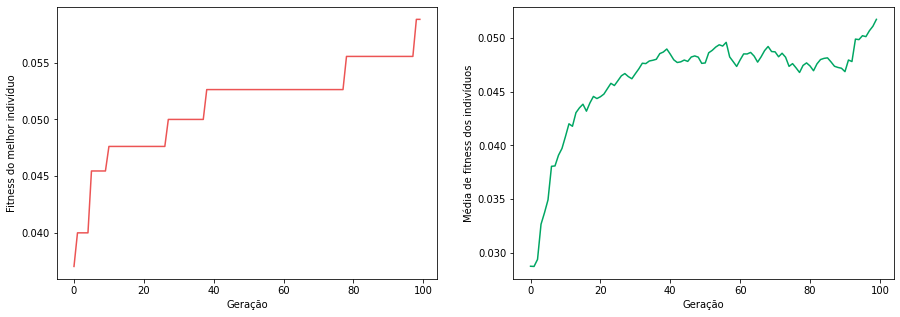

Melhor indivíduo da geração 100:  [20, 24, 25, 2, 17, 21, 31, 29, 16, 9, 12, 8, 15, 19, 9, 1, 8, 11, 5, 31, 18, 14, 17, 26, 28, 6, 7, 13, 12, 3, 0, 11]
Fitness desse indivíduo:   0.058823529411764705


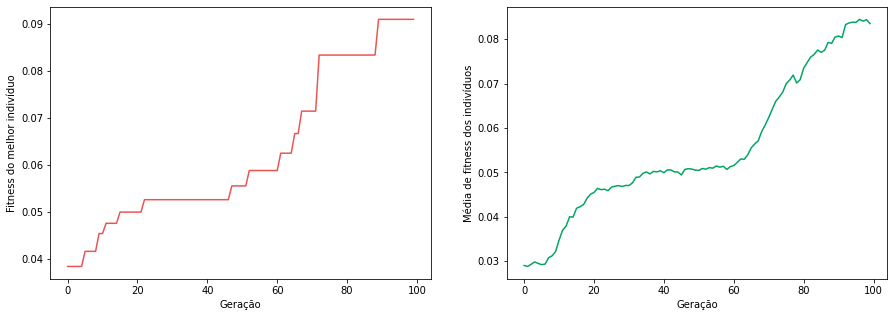

Melhor indivíduo da geração 100:  [30, 2, 7, 22, 8, 12, 31, 4, 20, 15, 28, 21, 23, 5, 26, 24, 0, 25, 1, 9, 23, 10, 21, 25, 6, 13, 19, 27, 19, 7, 11, 3]
Fitness desse indivíduo:   0.09090909090909091
-------------------------------------------------------------------------------------
-- Sem elitismo --


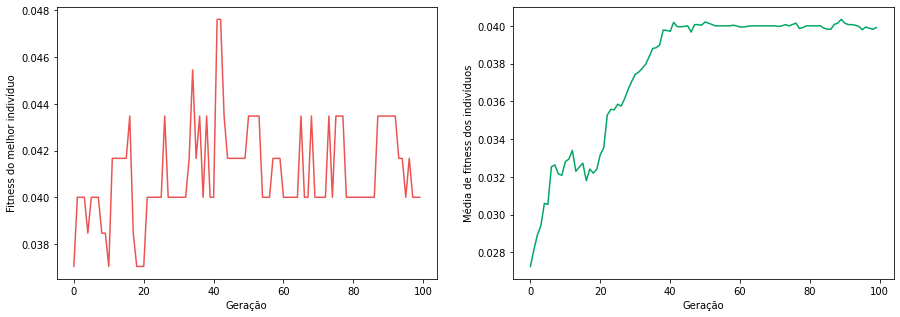

Melhor indivíduo da geração 100:  [9, 23, 10, 27, 0, 25, 21, 1, 31, 28, 7, 3, 4, 19, 30, 18, 2, 26, 27, 18, 20, 20, 0, 2, 30, 9, 0, 9, 12, 18, 15, 24]
Fitness desse indivíduo:   0.04


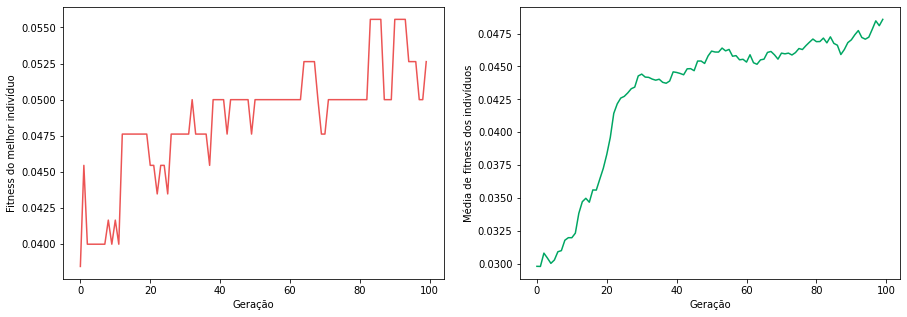

Melhor indivíduo da geração 100:  [3, 21, 13, 20, 14, 3, 6, 29, 20, 2, 19, 17, 8, 28, 0, 24, 5, 16, 6, 1, 18, 31, 17, 11, 31, 12, 1, 13, 15, 19, 10, 4]
Fitness desse indivíduo:   0.05263157894736842


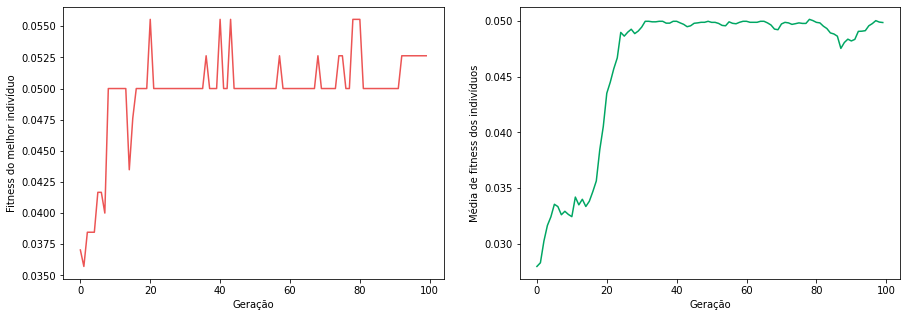

Melhor indivíduo da geração 100:  [27, 29, 8, 21, 26, 14, 11, 26, 19, 3, 10, 24, 4, 16, 2, 3, 0, 30, 5, 21, 19, 20, 1, 9, 31, 22, 11, 9, 6, 4, 13, 7]
Fitness desse indivíduo:   0.05263157894736842


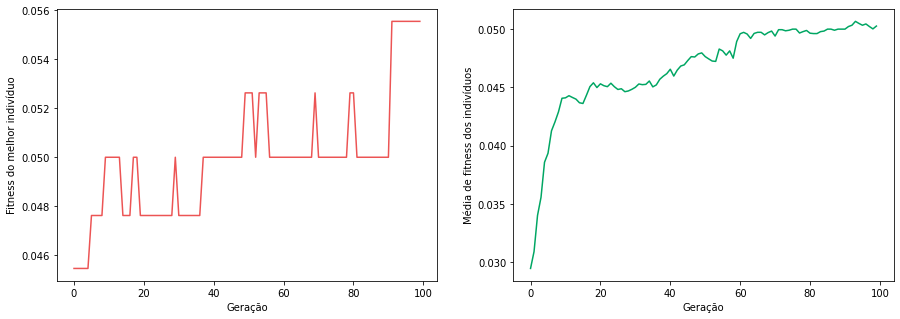

Melhor indivíduo da geração 100:  [26, 15, 12, 10, 2, 0, 4, 4, 7, 23, 23, 28, 17, 21, 18, 7, 28, 20, 13, 10, 29, 24, 5, 31, 9, 11, 27, 19, 8, 18, 14, 25]
Fitness desse indivíduo:   0.05555555555555555


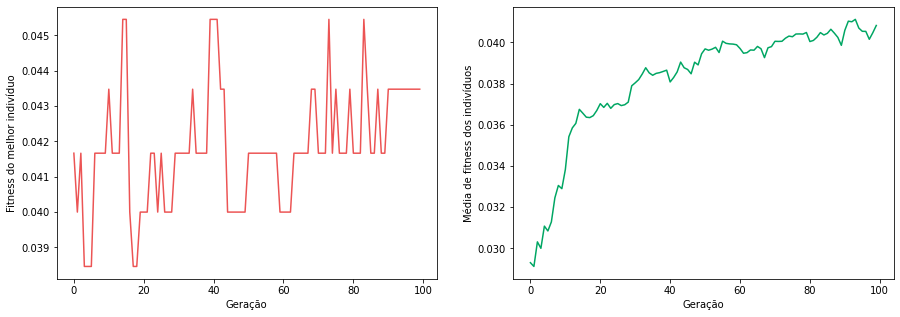

Melhor indivíduo da geração 100:  [13, 7, 23, 6, 8, 15, 5, 28, 18, 22, 26, 29, 20, 1, 25, 17, 8, 25, 1, 9, 6, 16, 11, 17, 2, 21, 11, 29, 2, 30, 11, 0]
Fitness desse indivíduo:   0.043478260869565216


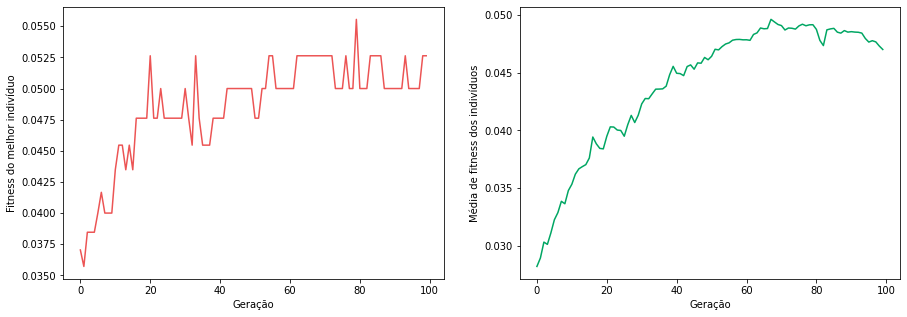

Melhor indivíduo da geração 100:  [26, 15, 8, 21, 31, 30, 16, 22, 0, 4, 9, 11, 6, 21, 20, 6, 2, 25, 18, 1, 29, 10, 7, 28, 17, 27, 29, 24, 24, 30, 26, 9]
Fitness desse indivíduo:   0.05263157894736842


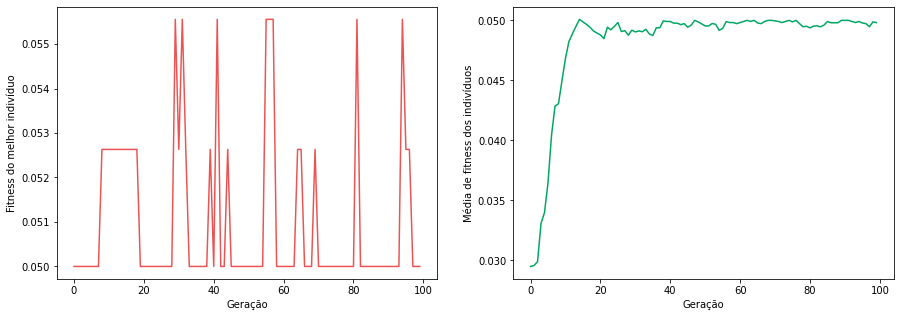

Melhor indivíduo da geração 100:  [16, 22, 6, 0, 24, 20, 12, 17, 26, 8, 27, 20, 30, 3, 16, 28, 10, 12, 3, 7, 4, 28, 23, 4, 29, 17, 26, 7, 7, 11, 8, 27]
Fitness desse indivíduo:   0.05


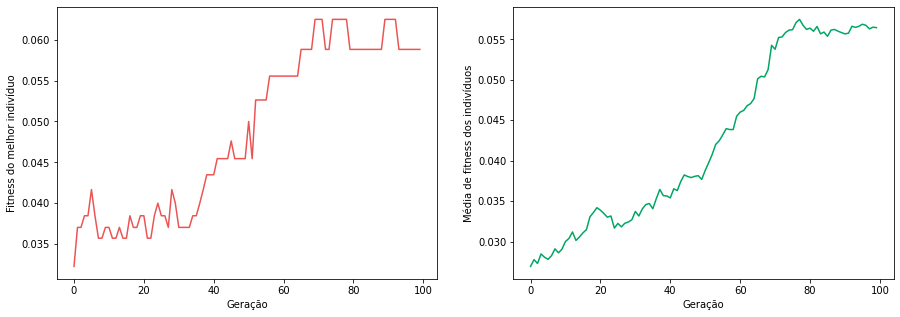

Melhor indivíduo da geração 100:  [0, 1, 25, 27, 11, 14, 16, 4, 0, 29, 31, 16, 24, 30, 2, 13, 3, 6, 29, 12, 7, 4, 26, 5, 19, 28, 23, 13, 9, 20, 26, 21]
Fitness desse indivíduo:   0.058823529411764705


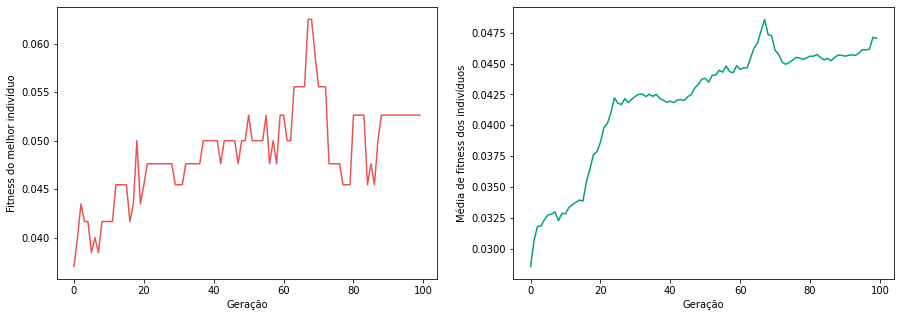

Melhor indivíduo da geração 100:  [15, 20, 9, 4, 1, 26, 8, 25, 6, 31, 10, 12, 16, 3, 21, 4, 11, 3, 18, 21, 6, 9, 16, 2, 27, 12, 7, 19, 2, 0, 13, 29]
Fitness desse indivíduo:   0.05263157894736842


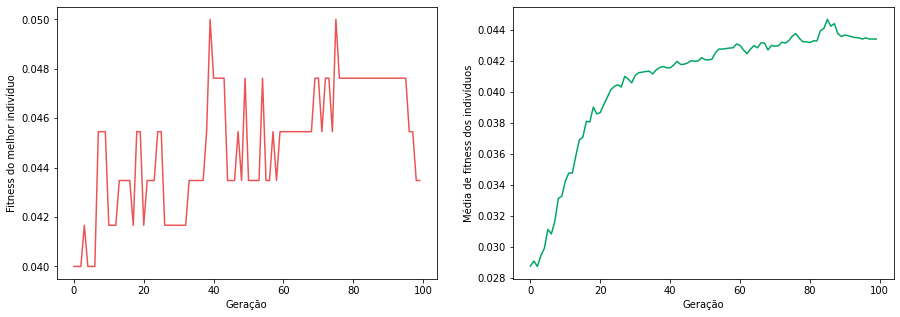

Melhor indivíduo da geração 100:  [25, 14, 23, 12, 28, 6, 24, 5, 5, 7, 22, 30, 23, 6, 8, 11, 7, 31, 25, 2, 30, 4, 12, 17, 27, 2, 0, 3, 31, 29, 15, 17]
Fitness desse indivíduo:   0.043478260869565216


In [ ]:
tamanhoIndividuo = 32
numeroRepeticoes = 10
tamanhoPopulacao = 50
numeroGeracoes = 100
probCrossover = 0.7
probMutacao = 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

- Mudando o valor do tamanho da população

-- Com elitismo --


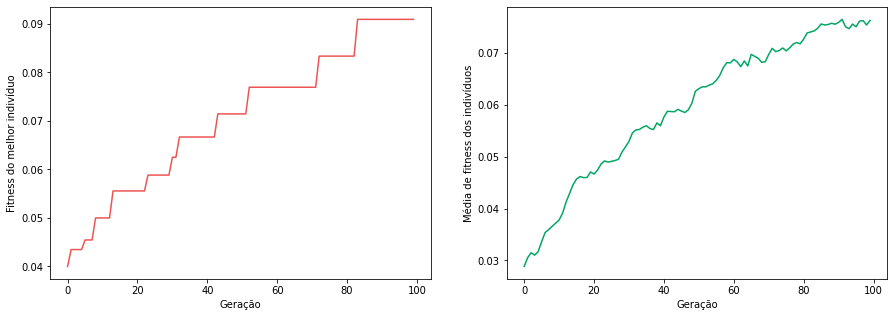

Melhor indivíduo da geração 100:  [4, 18, 9, 24, 9, 31, 11, 7, 0, 3, 16, 13, 10, 24, 13, 0, 28, 14, 27, 1, 3, 8, 30, 12, 26, 15, 29, 5, 19, 6, 26, 2]
Fitness desse indivíduo:   0.09090909090909091


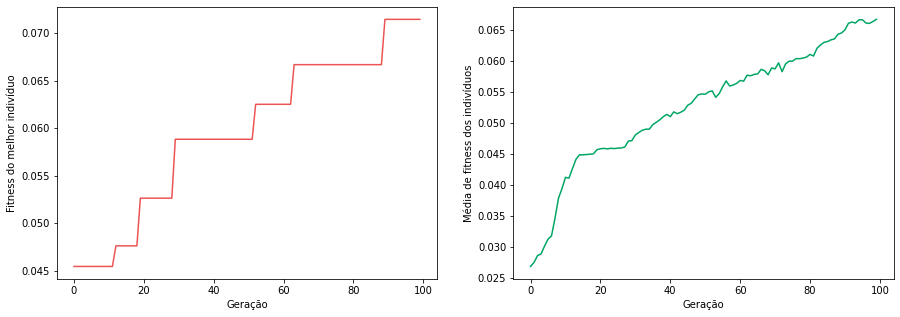

Melhor indivíduo da geração 100:  [3, 21, 16, 20, 29, 6, 15, 2, 20, 5, 10, 4, 17, 31, 0, 30, 24, 21, 12, 7, 7, 28, 12, 2, 9, 14, 22, 18, 1, 27, 23, 12]
Fitness desse indivíduo:   0.07142857142857142


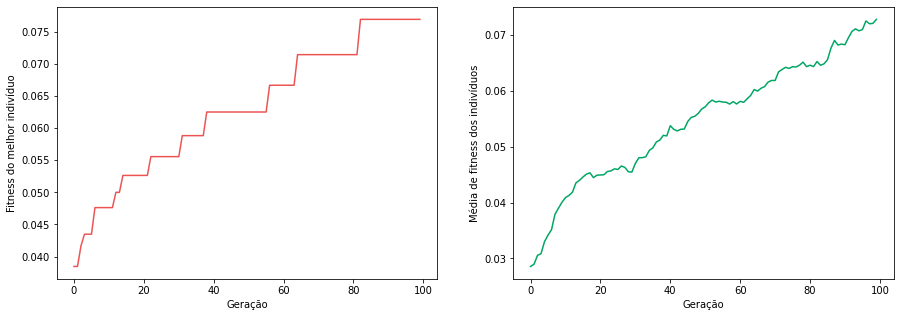

Melhor indivíduo da geração 100:  [3, 21, 12, 9, 19, 4, 25, 25, 5, 30, 27, 2, 8, 13, 7, 31, 11, 0, 6, 26, 28, 23, 20, 17, 11, 14, 31, 1, 18, 23, 13, 30]
Fitness desse indivíduo:   0.07692307692307693


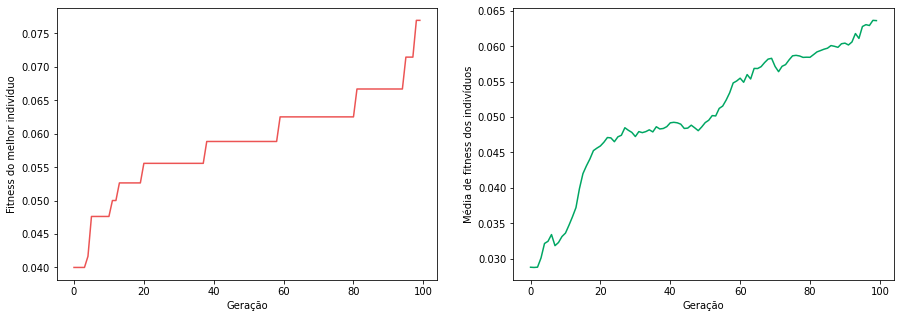

Melhor indivíduo da geração 100:  [16, 31, 24, 20, 15, 5, 30, 0, 27, 18, 2, 19, 6, 4, 29, 19, 10, 14, 3, 1, 8, 17, 29, 22, 7, 29, 13, 25, 1, 18, 23, 28]
Fitness desse indivíduo:   0.07692307692307693


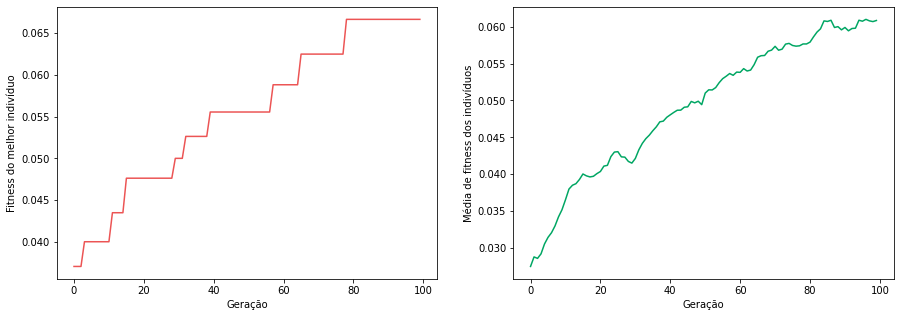

Melhor indivíduo da geração 100:  [20, 6, 4, 30, 8, 17, 7, 11, 31, 0, 29, 3, 21, 24, 21, 23, 7, 13, 18, 5, 8, 0, 14, 22, 10, 12, 15, 25, 23, 2, 24, 9]
Fitness desse indivíduo:   0.06666666666666667


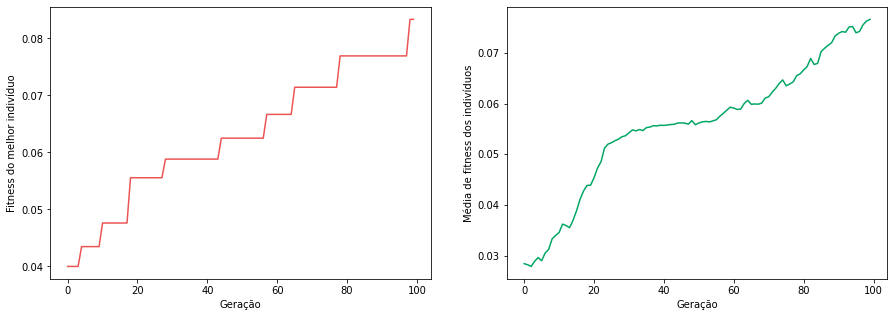

Melhor indivíduo da geração 100:  [16, 23, 12, 26, 23, 7, 20, 6, 17, 14, 21, 4, 25, 13, 29, 19, 22, 18, 5, 11, 28, 12, 0, 13, 16, 19, 8, 22, 30, 3, 9, 15]
Fitness desse indivíduo:   0.08333333333333333


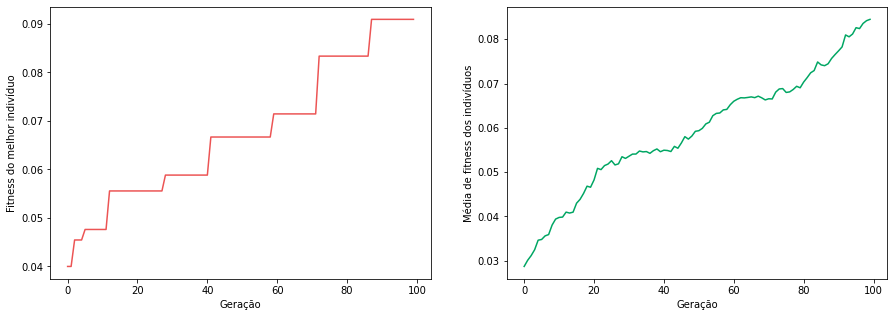

Melhor indivíduo da geração 100:  [16, 0, 9, 22, 5, 10, 27, 7, 12, 3, 19, 6, 18, 26, 23, 11, 31, 25, 2, 9, 30, 1, 24, 20, 11, 4, 15, 4, 19, 14, 23, 17]
Fitness desse indivíduo:   0.09090909090909091


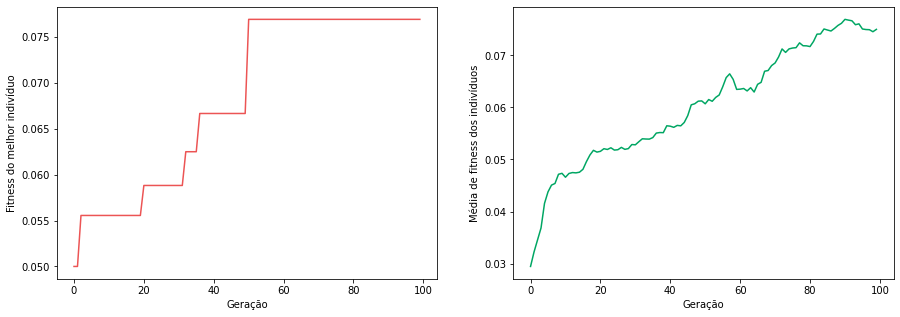

Melhor indivíduo da geração 100:  [13, 26, 3, 5, 21, 4, 4, 30, 24, 27, 10, 19, 17, 28, 23, 0, 24, 18, 15, 12, 25, 13, 6, 1, 23, 29, 8, 30, 14, 20, 22, 7]
Fitness desse indivíduo:   0.07692307692307693


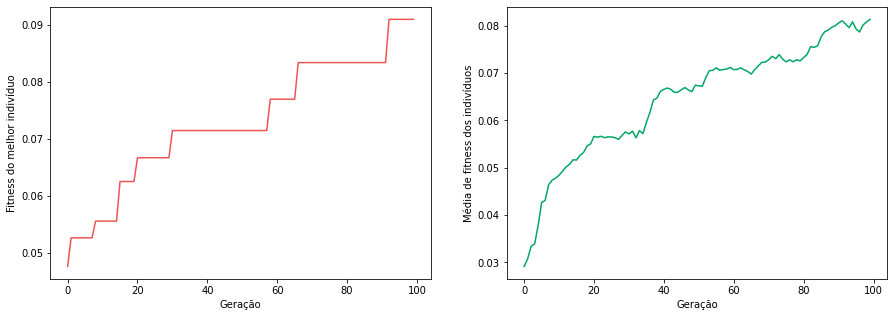

Melhor indivíduo da geração 100:  [13, 7, 25, 23, 6, 15, 24, 28, 11, 5, 12, 4, 26, 21, 30, 2, 27, 29, 22, 9, 5, 20, 23, 16, 31, 8, 26, 17, 3, 3, 0, 25]
Fitness desse indivíduo:   0.09090909090909091


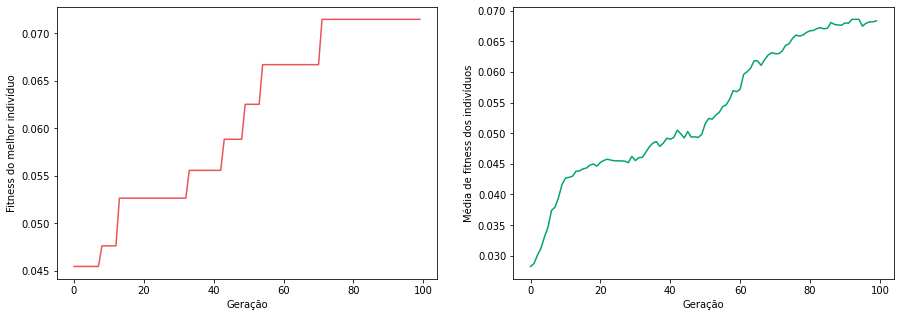

Melhor indivíduo da geração 100:  [21, 29, 22, 19, 2, 12, 4, 20, 8, 19, 16, 7, 0, 14, 17, 23, 6, 1, 18, 10, 0, 4, 26, 28, 21, 24, 14, 31, 27, 3, 11, 25]
Fitness desse indivíduo:   0.07142857142857142
-------------------------------------------------------------------------------------
-- Sem elitismo --


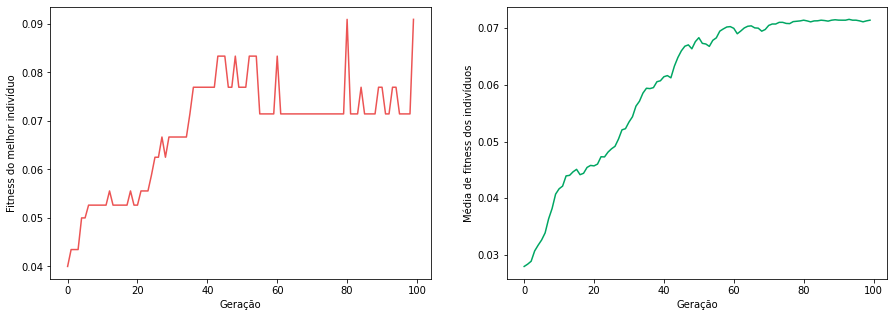

Melhor indivíduo da geração 100:  [19, 13, 19, 10, 28, 7, 4, 17, 8, 2, 5, 20, 6, 27, 11, 18, 14, 3, 23, 15, 28, 21, 0, 27, 4, 1, 9, 11, 29, 10, 15, 24]
Fitness desse indivíduo:   0.09090909090909091


In [ ]:
tamanhoIndividuo = 32
numeroRepeticoes = 10
tamanhoPopulacao = 75 # antigo valor era 50
numeroGeracoes = 100
probCrossover = 0.7
probMutacao = 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

numeroRepeticoes = 1
elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

- Mudando o valor do número de gerações

-- Com elitismo --


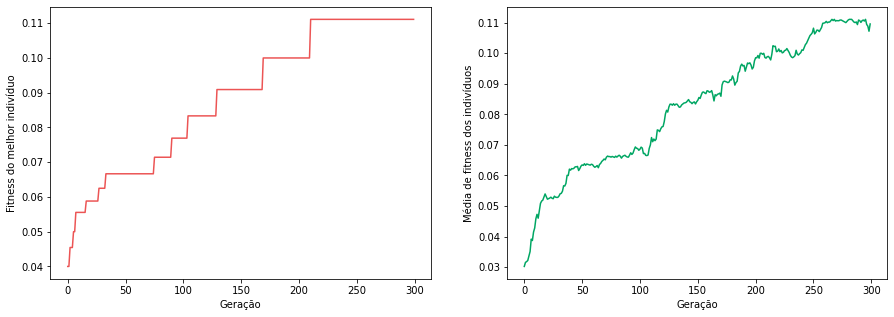

Melhor indivíduo da geração 300:  [17, 11, 0, 16, 26, 29, 8, 15, 12, 9, 25, 5, 21, 14, 30, 6, 23, 28, 10, 18, 3, 26, 4, 10, 27, 7, 5, 13, 13, 31, 20, 22]
Fitness desse indivíduo:   0.1111111111111111


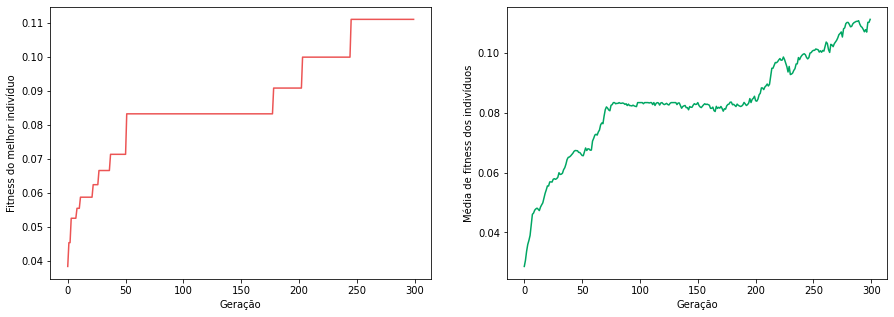

Melhor indivíduo da geração 300:  [1, 20, 17, 28, 24, 5, 2, 13, 8, 18, 16, 24, 3, 27, 31, 26, 6, 6, 11, 14, 30, 15, 29, 21, 23, 28, 22, 29, 9, 0, 12, 7]
Fitness desse indivíduo:   0.1111111111111111


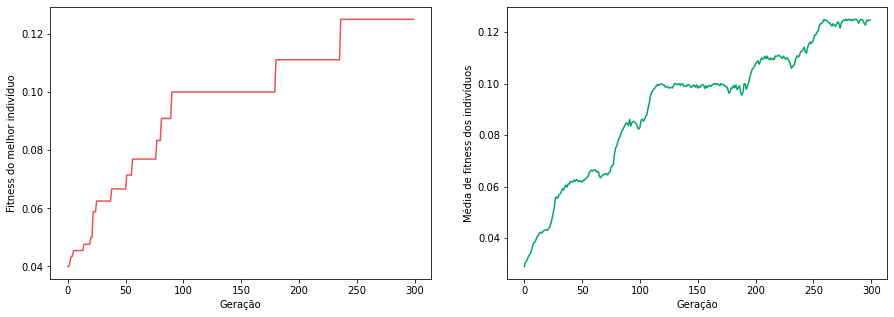

Melhor indivíduo da geração 300:  [20, 28, 14, 29, 21, 5, 8, 11, 3, 18, 7, 27, 26, 6, 20, 16, 23, 2, 10, 29, 1, 22, 4, 31, 0, 24, 13, 30, 17, 12, 7, 9]
Fitness desse indivíduo:   0.125


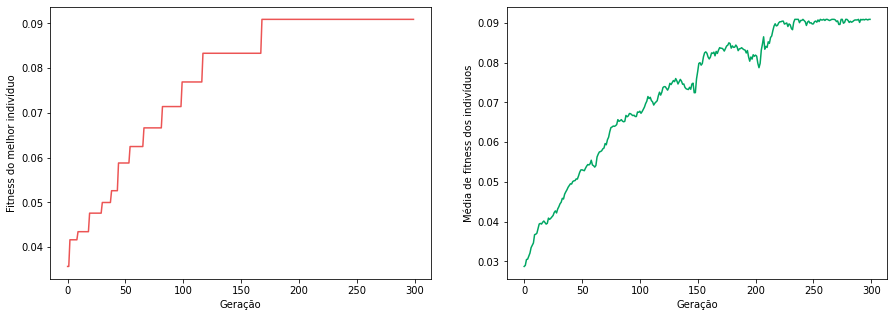

Melhor indivíduo da geração 300:  [26, 9, 22, 24, 13, 2, 8, 23, 10, 20, 2, 28, 13, 25, 14, 5, 0, 30, 17, 26, 16, 27, 15, 19, 4, 30, 24, 22, 6, 11, 18, 12]
Fitness desse indivíduo:   0.09090909090909091


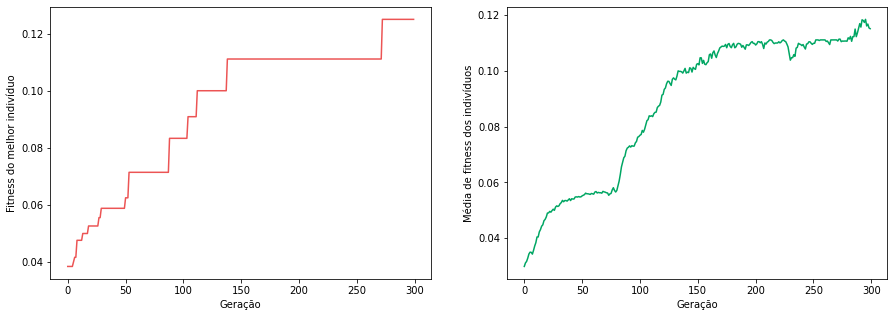

Melhor indivíduo da geração 300:  [10, 20, 15, 21, 2, 31, 1, 4, 20, 29, 25, 16, 18, 9, 31, 3, 24, 8, 5, 23, 27, 5, 15, 22, 6, 26, 28, 7, 11, 17, 19, 0]
Fitness desse indivíduo:   0.125


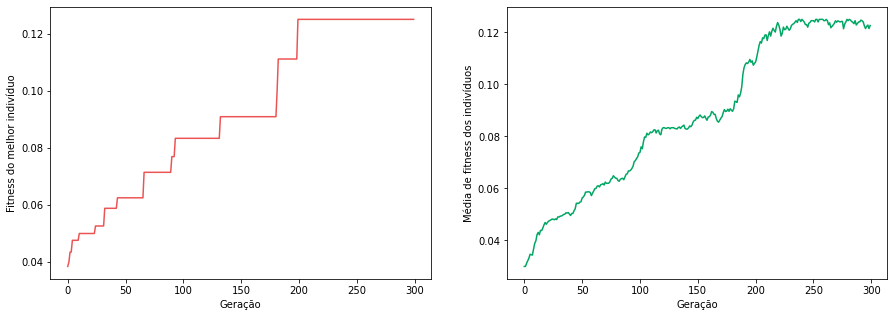

Melhor indivíduo da geração 300:  [1, 17, 0, 18, 30, 15, 27, 16, 5, 6, 21, 7, 31, 25, 28, 19, 10, 20, 11, 9, 2, 4, 3, 22, 8, 14, 26, 29, 2, 24, 21, 13]
Fitness desse indivíduo:   0.125


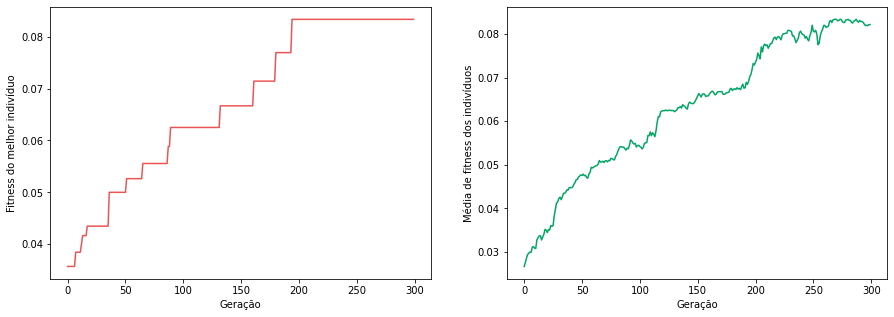

Melhor indivíduo da geração 300:  [31, 21, 6, 31, 19, 28, 29, 15, 13, 7, 19, 2, 2, 30, 3, 17, 11, 1, 24, 18, 25, 22, 4, 26, 12, 0, 22, 12, 10, 27, 16, 9]
Fitness desse indivíduo:   0.08333333333333333


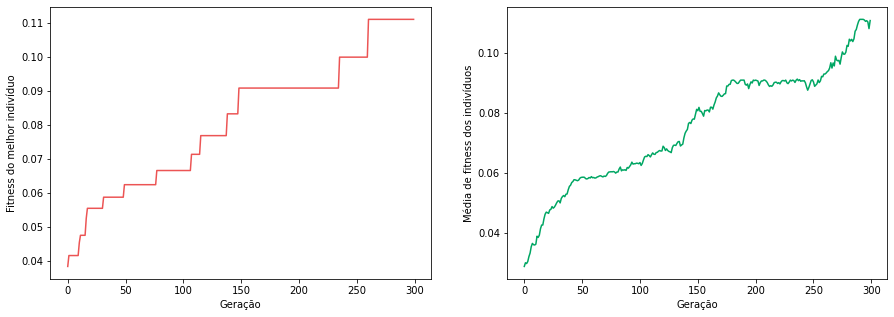

Melhor indivíduo da geração 300:  [28, 26, 10, 17, 14, 25, 4, 15, 23, 0, 9, 27, 21, 8, 11, 1, 7, 6, 29, 24, 22, 19, 12, 16, 0, 12, 20, 2, 31, 30, 18, 1]
Fitness desse indivíduo:   0.1111111111111111


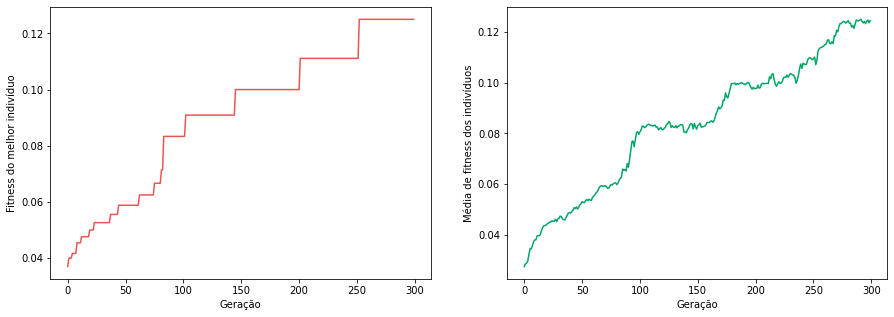

Melhor indivíduo da geração 300:  [7, 2, 21, 9, 20, 23, 29, 10, 13, 1, 12, 4, 29, 24, 5, 24, 16, 30, 0, 17, 6, 25, 3, 31, 21, 28, 15, 2, 27, 22, 8, 19]
Fitness desse indivíduo:   0.125


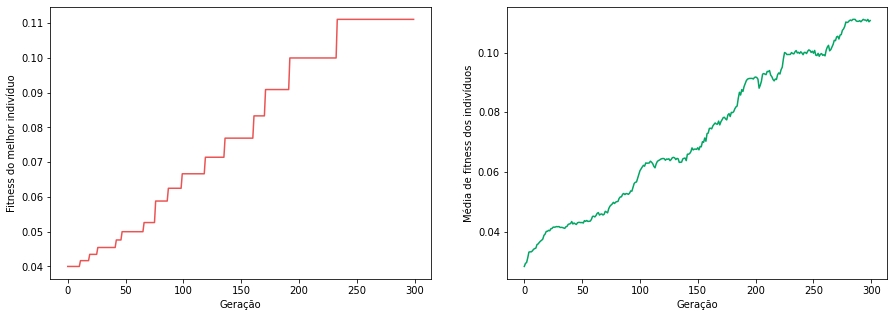

Melhor indivíduo da geração 300:  [31, 20, 15, 13, 18, 5, 22, 27, 16, 2, 25, 9, 3, 24, 19, 17, 23, 26, 8, 31, 26, 6, 29, 7, 12, 10, 22, 14, 17, 0, 24, 30]
Fitness desse indivíduo:   0.1111111111111111
-------------------------------------------------------------------------------------
-- Sem elitismo --


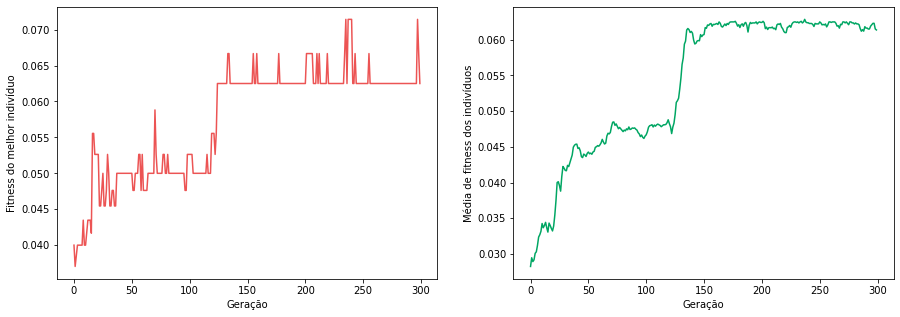

Melhor indivíduo da geração 300:  [5, 22, 17, 1, 12, 28, 23, 10, 21, 11, 26, 20, 0, 8, 25, 30, 18, 9, 15, 5, 30, 27, 23, 2, 4, 24, 8, 20, 24, 7, 1, 31]
Fitness desse indivíduo:   0.0625


In [ ]:
tamanhoIndividuo = 32
numeroRepeticoes = 10
tamanhoPopulacao = 50
numeroGeracoes = 300 # antigo valor era 100
probCrossover = 0.7
probMutacao = 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

numeroRepeticoes = 1
elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

- Mudando o valor da probabilidade de crossover

-- Com elitismo --


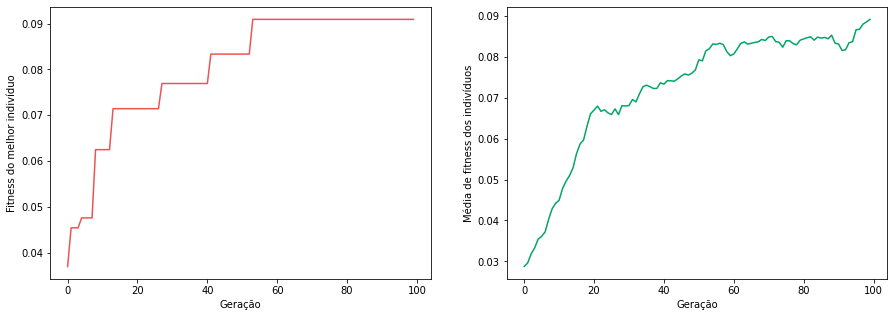

Melhor indivíduo da geração 100:  [6, 3, 18, 11, 26, 29, 16, 8, 13, 27, 7, 1, 20, 5, 29, 24, 9, 11, 17, 14, 30, 10, 1, 31, 2, 12, 22, 15, 31, 27, 21, 7]
Fitness desse indivíduo:   0.09090909090909091


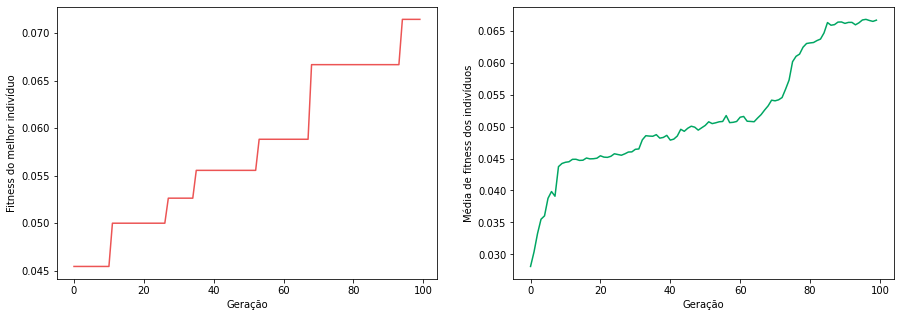

Melhor indivíduo da geração 100:  [0, 8, 27, 1, 19, 7, 18, 11, 3, 14, 16, 9, 28, 23, 31, 2, 26, 16, 4, 11, 29, 12, 31, 17, 6, 10, 15, 1, 10, 5, 20, 24]
Fitness desse indivíduo:   0.07142857142857142


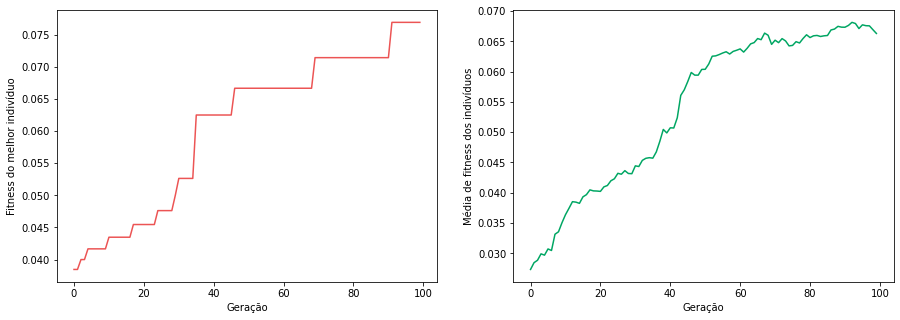

Melhor indivíduo da geração 100:  [16, 20, 20, 30, 28, 10, 8, 24, 29, 22, 1, 19, 13, 25, 12, 0, 27, 3, 21, 29, 26, 17, 11, 4, 31, 17, 14, 18, 23, 2, 27, 3]
Fitness desse indivíduo:   0.07692307692307693


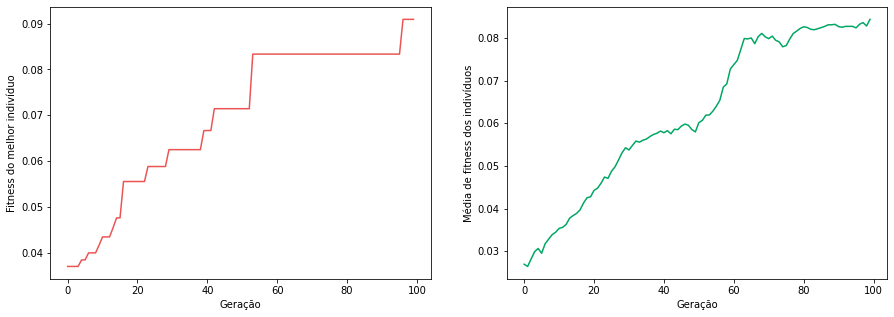

Melhor indivíduo da geração 100:  [21, 1, 0, 7, 16, 31, 29, 24, 18, 5, 18, 19, 13, 22, 27, 17, 8, 23, 4, 30, 3, 6, 29, 11, 15, 4, 28, 26, 21, 9, 17, 25]
Fitness desse indivíduo:   0.09090909090909091


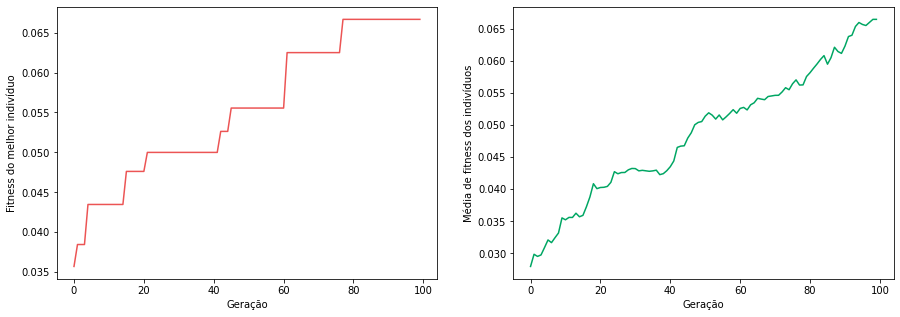

Melhor indivíduo da geração 100:  [24, 10, 6, 16, 31, 19, 25, 0, 18, 27, 7, 2, 23, 2, 15, 29, 17, 3, 30, 4, 28, 21, 29, 7, 26, 12, 2, 20, 13, 3, 1, 8]
Fitness desse indivíduo:   0.06666666666666667


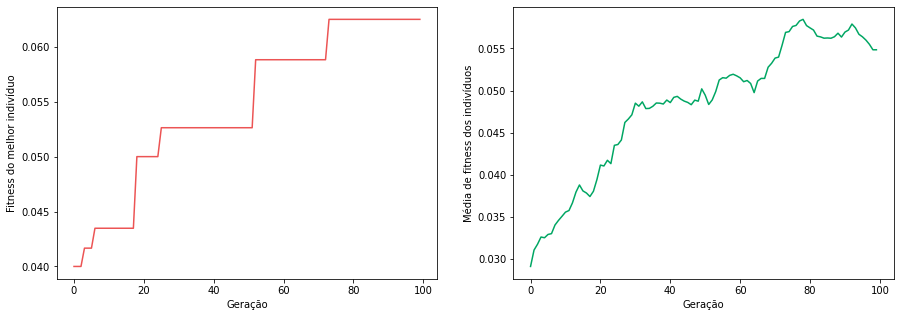

Melhor indivíduo da geração 100:  [30, 25, 29, 18, 14, 6, 22, 20, 21, 13, 9, 1, 31, 16, 8, 5, 0, 7, 15, 28, 26, 4, 10, 12, 17, 14, 18, 24, 28, 8, 3, 30]
Fitness desse indivíduo:   0.0625


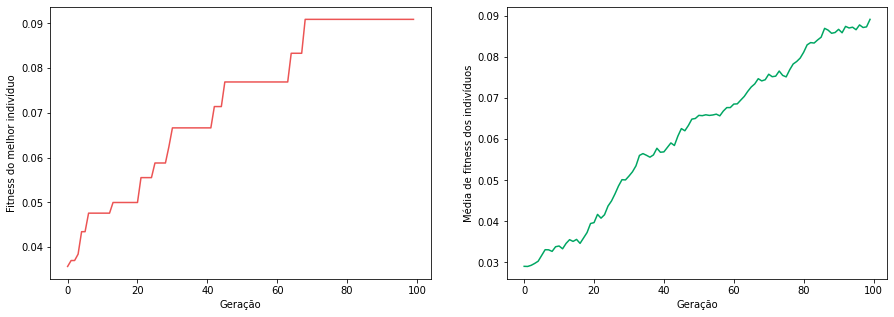

Melhor indivíduo da geração 100:  [9, 31, 3, 30, 0, 26, 17, 10, 5, 19, 17, 29, 24, 29, 4, 28, 10, 8, 2, 23, 1, 27, 22, 12, 22, 7, 28, 11, 6, 16, 25, 4]
Fitness desse indivíduo:   0.09090909090909091


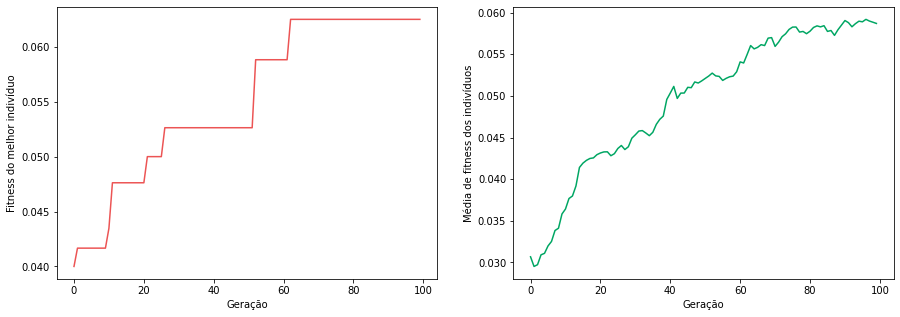

Melhor indivíduo da geração 100:  [18, 3, 15, 19, 9, 14, 31, 22, 27, 30, 1, 0, 23, 6, 10, 19, 22, 24, 5, 7, 12, 24, 21, 10, 26, 11, 7, 28, 28, 20, 2, 21]
Fitness desse indivíduo:   0.0625


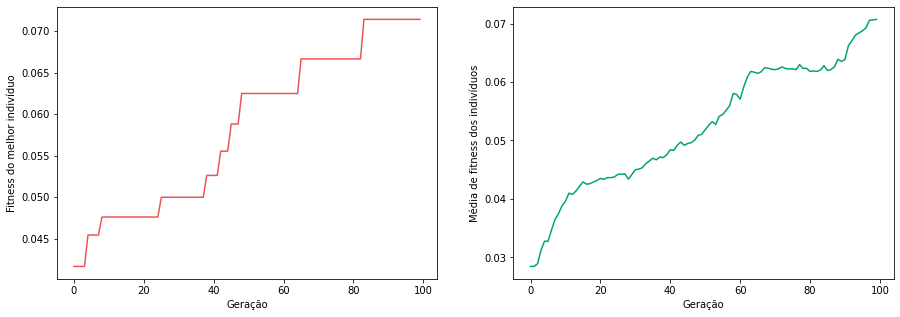

Melhor indivíduo da geração 100:  [2, 9, 6, 30, 20, 26, 1, 4, 22, 25, 27, 3, 27, 31, 5, 12, 0, 13, 8, 10, 5, 26, 29, 18, 11, 24, 20, 28, 0, 11, 19, 21]
Fitness desse indivíduo:   0.07142857142857142


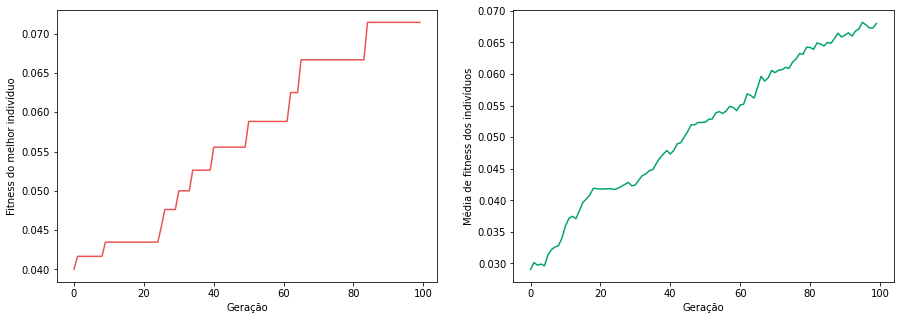

Melhor indivíduo da geração 100:  [21, 28, 1, 16, 27, 18, 0, 5, 14, 27, 8, 2, 20, 31, 23, 17, 26, 11, 13, 8, 29, 13, 3, 10, 0, 15, 12, 31, 19, 22, 9, 4]
Fitness desse indivíduo:   0.07142857142857142
-------------------------------------------------------------------------------------
-- Sem elitismo --


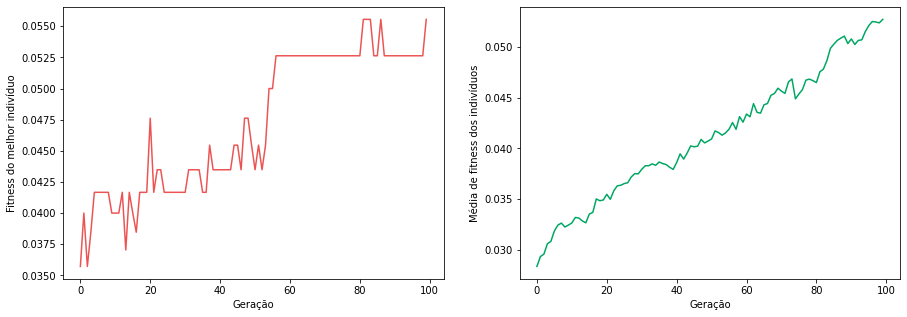

Melhor indivíduo da geração 100:  [11, 25, 28, 12, 17, 26, 8, 10, 26, 29, 7, 13, 10, 0, 14, 21, 3, 5, 17, 9, 6, 16, 23, 31, 28, 2, 6, 12, 24, 13, 3, 12]
Fitness desse indivíduo:   0.05555555555555555


In [ ]:
tamanhoIndividuo = 32
numeroRepeticoes = 10
tamanhoPopulacao = 50
numeroGeracoes = 100
probCrossover = 0.8 # antigo valor era 0.7
probMutacao = 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

numeroRepeticoes = 1
elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

- Mudando o valor da probabilidade de mutação

-- Com elitismo --


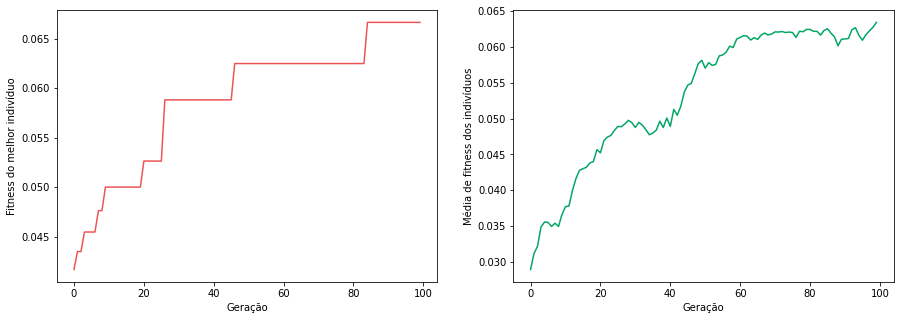

Melhor indivíduo da geração 100:  [27, 19, 7, 11, 0, 3, 23, 8, 13, 18, 12, 8, 22, 30, 17, 22, 28, 31, 2, 9, 2, 15, 20, 29, 1, 6, 13, 14, 21, 28, 5, 24]
Fitness desse indivíduo:   0.06666666666666667


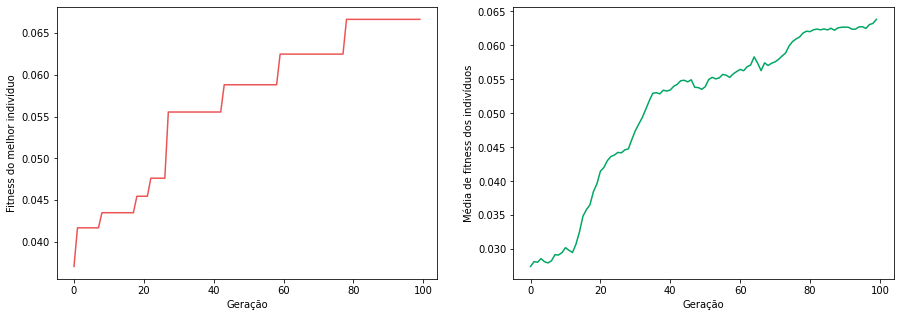

Melhor indivíduo da geração 100:  [27, 20, 4, 0, 16, 19, 24, 14, 25, 19, 22, 7, 5, 0, 20, 11, 23, 9, 18, 18, 24, 1, 30, 26, 29, 4, 21, 8, 28, 2, 8, 13]
Fitness desse indivíduo:   0.06666666666666667


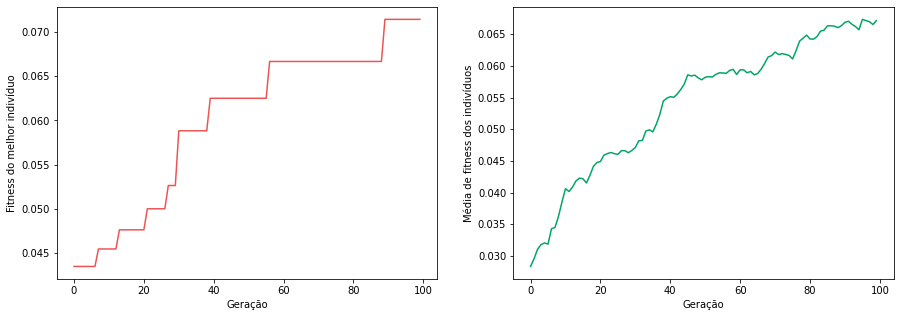

Melhor indivíduo da geração 100:  [25, 3, 28, 19, 4, 14, 11, 21, 27, 12, 2, 0, 29, 0, 12, 28, 31, 9, 1, 14, 8, 17, 7, 30, 13, 26, 25, 18, 16, 26, 24, 15]
Fitness desse indivíduo:   0.07142857142857142


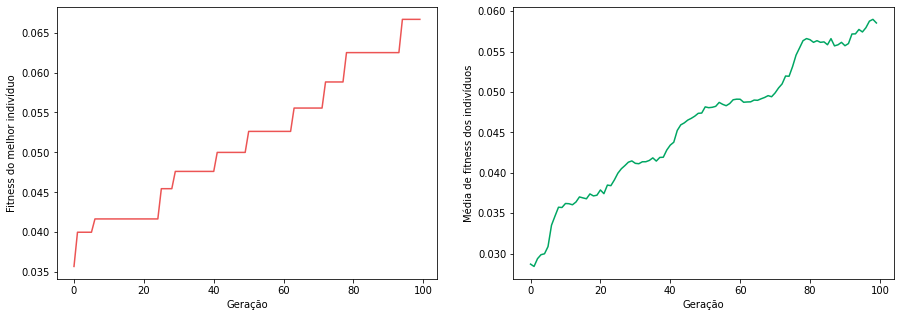

Melhor indivíduo da geração 100:  [26, 1, 3, 24, 17, 15, 31, 22, 25, 7, 7, 3, 23, 25, 20, 4, 30, 13, 23, 4, 24, 30, 20, 5, 12, 28, 28, 19, 11, 29, 29, 9]
Fitness desse indivíduo:   0.06666666666666667


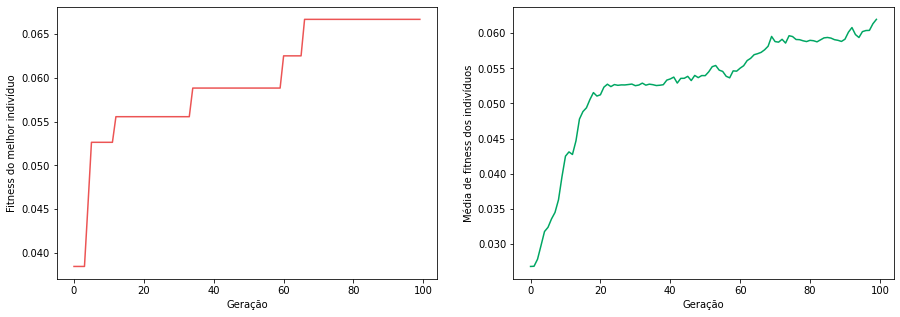

Melhor indivíduo da geração 100:  [31, 13, 5, 19, 2, 23, 11, 28, 17, 15, 1, 8, 0, 12, 10, 29, 2, 6, 29, 14, 1, 21, 30, 25, 16, 9, 21, 16, 10, 19, 7, 22]
Fitness desse indivíduo:   0.06666666666666667


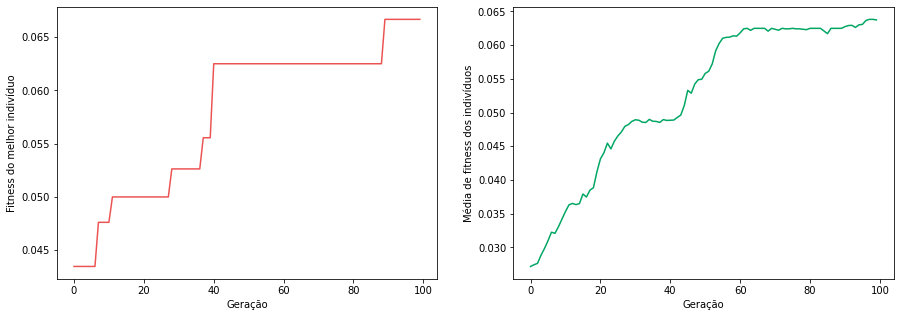

Melhor indivíduo da geração 100:  [15, 20, 7, 31, 7, 18, 30, 16, 19, 1, 0, 13, 23, 9, 5, 10, 22, 3, 11, 29, 18, 3, 10, 19, 15, 12, 2, 24, 27, 4, 24, 14]
Fitness desse indivíduo:   0.06666666666666667


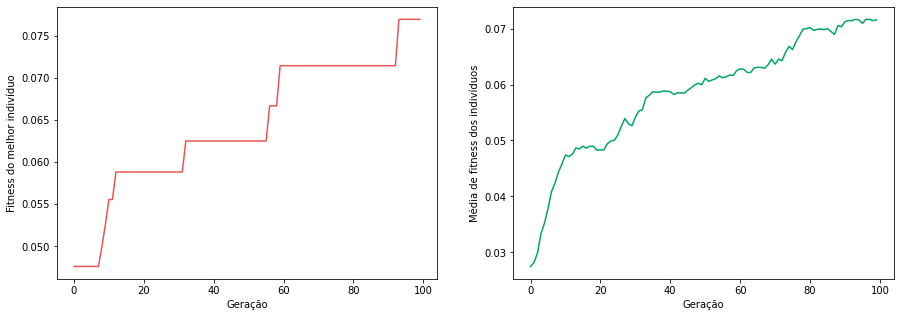

Melhor indivíduo da geração 100:  [9, 6, 13, 20, 1, 31, 18, 26, 3, 30, 16, 19, 25, 7, 7, 3, 30, 24, 22, 0, 28, 6, 25, 12, 0, 4, 19, 5, 8, 21, 4, 29]
Fitness desse indivíduo:   0.07692307692307693


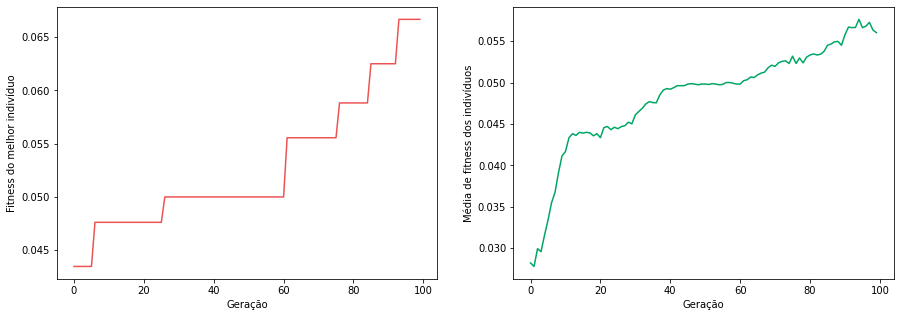

Melhor indivíduo da geração 100:  [10, 20, 15, 1, 7, 14, 30, 9, 25, 8, 0, 19, 0, 28, 8, 11, 22, 12, 5, 10, 3, 29, 26, 2, 28, 17, 27, 21, 12, 22, 4, 13]
Fitness desse indivíduo:   0.06666666666666667


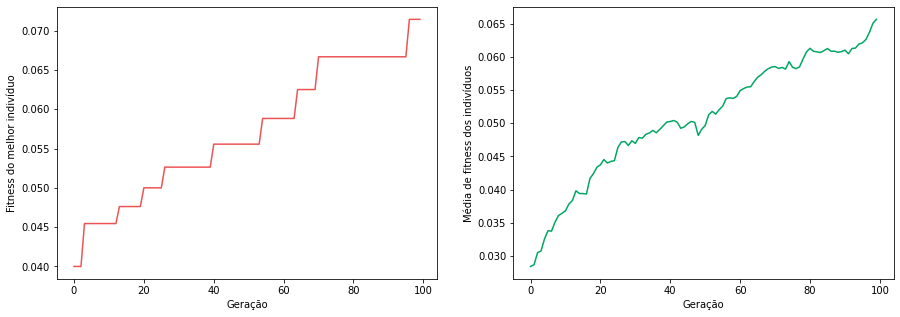

Melhor indivíduo da geração 100:  [17, 26, 29, 25, 12, 1, 9, 6, 27, 10, 28, 25, 0, 16, 23, 7, 2, 14, 3, 30, 11, 23, 18, 0, 17, 7, 4, 16, 20, 24, 31, 21]
Fitness desse indivíduo:   0.07142857142857142


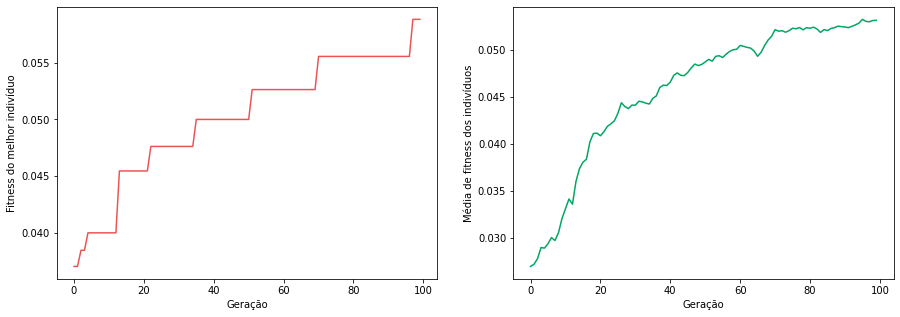

Melhor indivíduo da geração 100:  [16, 22, 30, 8, 11, 19, 24, 12, 10, 1, 4, 1, 15, 30, 29, 2, 18, 27, 31, 26, 20, 14, 0, 3, 9, 4, 12, 27, 5, 8, 12, 15]
Fitness desse indivíduo:   0.058823529411764705
-------------------------------------------------------------------------------------
-- Sem elitismo --


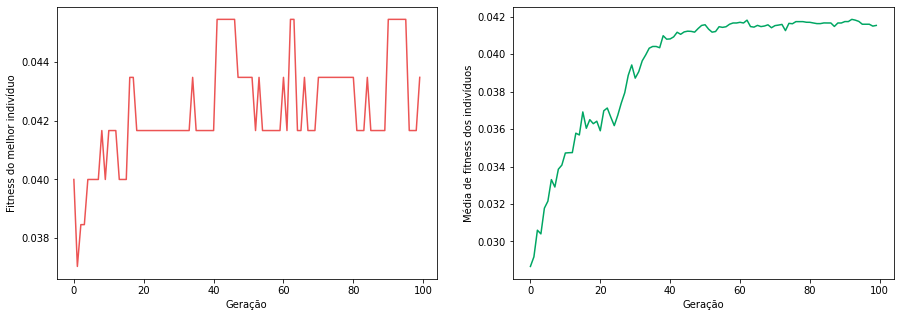

Melhor indivíduo da geração 100:  [24, 31, 18, 30, 19, 13, 8, 12, 22, 7, 0, 27, 4, 17, 11, 26, 24, 5, 29, 8, 19, 0, 29, 28, 30, 10, 3, 7, 2, 25, 3, 23]
Fitness desse indivíduo:   0.043478260869565216


In [ ]:
tamanhoIndividuo = 32
numeroRepeticoes = 10
tamanhoPopulacao = 50
numeroGeracoes = 100
probCrossover = 0.7
probMutacao = 0.04 # antigo valor era 0.1
elitismo = True

print("-- Com elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)

print("-------------------------------------------------------------------------------------")

numeroRepeticoes = 1
elitismo = False
print("-- Sem elitismo --")
testaParametros(numeroRepeticoes, tamanhoPopulacao, numeroGeracoes, probCrossover, probMutacao, elitismo)